# U.S. Census data - Clustering Project


#Project Introduction

##U.S. Census data
We have performed a clustering analysis and searched patterns and
connections for the U.S. Census demographic data set, defined by the census
bureau for 2017.

The data set contains information like total population, ethnic demographic information, employment and commuting characteristics and more.

The goal here is to organize data into meaningful structures and do an
exploratory analysis (e.g. child poverty rates in the U.S. and how they vary by
location and other factors).

The data set contains the following 35 attributes:

CensusTract

State

County

TotalPop

Men

Women

Hispanic

Native

Asian

Pacific

VotingAgeCitizen

Income

IncomeErr

IncomePerCap

IncomePerCapErr

Poverty

ChildPoverty

Professional

Service

Office

Construction

Production

Drive

Carpool

Transit

Walk

OtherTransp

WorkAtHome

MeanCommute

Employed

PrivateWork

PublicWork

SelfEmployed

FamilyWork

Unemployment


##Tasks


###Task 1

• Pre-process the attribute values, so that they are in the appropriate form to be given as an input for an algorithm.

• Handle missing values.

• Detect anomalies/outliers.

• Find useful correlations among attributes.

• Visualize the data with different techniques, 2D and 3D, use PCA to reduce the dimensions.

###Task 2

• Perform clustering with various clustering algorithms to find useful patterns and compare their results.

• Compare the results with and without dimensionality reduction techniques.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PRE-PROCESSING

We start an initial exploratory analysis including the following steps:

1) Import the dataset and libraries and do an analysis of the dataset shape and size.

2) Quality of data analysis (how many null values or other incorrect values are present)

3) Initial statistical analysis of the dataset describing some common metrics such as mean, standard deviation and percentiles...

4) Data distribution analysis

###Importing the required libraries

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram,cut_tree)
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

###Importing the dataset

In [ ]:

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/acs2017_census_tract_data.csv', index_col='TractId')

X = dataset.iloc[:, :].values

###Exploring the dataset

In [ ]:
#print the dataset
print(X)

[['Alabama' 'Autauga County' 1845 ... 4.5 0.0 4.6]
 ['Alabama' 'Autauga County' 2172 ... 9.0 0.0 3.4]
 ['Alabama' 'Autauga County' 3385 ... 4.8 0.7 4.7]
 ...
 ['Puerto Rico' 'Yauco Municipio' 2218 ... 8.0 0.0 23.0]
 ['Puerto Rico' 'Yauco Municipio' 4380 ... 1.9 0.0 29.5]
 ['Puerto Rico' 'Yauco Municipio' 3001 ... 5.0 0.0 17.9]]


In [ ]:
#shape and size od the dataset
dataset.shape

(74001, 34)

In [ ]:
#Analyze null values
dataset.isnull()

State  County  TotalPop    Men  Women  Hispanic  Native  Asian  \
TractId                                                                       
1001020100   False   False     False  False  False     False   False  False   
1001020200   False   False     False  False  False     False   False  False   
1001020300   False   False     False  False  False     False   False  False   
1001020400   False   False     False  False  False     False   False  False   
1001020500   False   False     False  False  False     False   False  False   
...            ...     ...       ...    ...    ...       ...     ...    ...   
72153750501  False   False     False  False  False     False   False  False   
72153750502  False   False     False  False  False     False   False  False   
72153750503  False   False     False  False  False     False   False  False   
72153750601  False   False     False  False  False     False   False  False   
72153750602  False   False     False  False  False     False   False  False   

             Pacific  VotingAgeCitizen  ...   Walk  OtherTransp  WorkAtHome  \
TractId                                 ...                                   
1001020100     False             False  ...  False        False       False   
1001020200     False             False  ...  False        False       False   
1001020300     False             False  ...  False        False       False   
1001020400     False             False  ...  False        False       False   
1001020500     False             False  ...  False        False       False   
...              ...               ...  ...    ...          ...         ...   
72153750501    False             False  ...  False        False       False   
72153750502    False             False  ...  False        False       False   
72153750503    False             False  ...  False        False       False   
72153750601    False             False  ...  False        False       False   
72153750602    False             False  ...  False        False       False   

             MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
TractId                                                                     
1001020100         False     False        False       False         False   
1001020200         False     False        False       False         False   
1001020300         False     False        False       False         False   
1001020400         False     False        False       False         False   
1001020500         False     False        False       False         False   
...                  ...       ...          ...         ...           ...   
72153750501        False     False        False       False         False   
72153750502        False     False        False       False         False   
72153750503        False     False        False       False         False   
72153750601        False     False        False       False         False   
72153750602        False     False        False       False         False   

             FamilyWork  Unemployment  
TractId                                
1001020100        False         False  
1001020200        False         False  
1001020300        False         False  
1001020400        False         False  
1001020500        False         False  
...                 ...           ...  
72153750501       False         False  
72153750502       False         False  
72153750503       False         False  
72153750601       False         False  
72153750602       False         False  

[74001 rows x 34 columns]

In [ ]:
#distribution of null values
dataset.isnull().sum()

State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

In [ ]:
#sum of null values
dataset.isnull().sum().sum()

22319

In [ ]:
#output a sample of the dataset
dataset.head()

State          County  TotalPop   Men  Women  Hispanic  Native  \
TractId                                                                        
1001020100  Alabama  Autauga County      1845   899    946       2.4     0.0   
1001020200  Alabama  Autauga County      2172  1167   1005       1.1     0.0   
1001020300  Alabama  Autauga County      3385  1533   1852       8.0     0.6   
1001020400  Alabama  Autauga County      4267  2001   2266       9.6     0.5   
1001020500  Alabama  Autauga County      9965  5054   4911       0.9     0.0   

            Asian  Pacific  VotingAgeCitizen  ...  Walk  OtherTransp  \
TractId                                       ...                      
1001020100    1.2      0.0              1407  ...   0.5          0.0   
1001020200    1.0      0.0              1652  ...   0.0          0.5   
1001020300    0.7      0.4              2480  ...   1.0          0.8   
1001020400    0.2      0.0              3257  ...   1.5          2.9   
1001020500    3.1      0.0              7229  ...   0.8          0.3   

            WorkAtHome  MeanCommute  Employed  PrivateWork  PublicWork  \
TractId                                                                  
1001020100         2.1         24.5       881         74.2        21.2   
1001020200         0.0         22.2       852         75.9        15.0   
1001020300         1.5         23.1      1482         73.3        21.1   
1001020400         2.1         25.9      1849         75.8        19.7   
1001020500         0.7         21.0      4787         71.4        24.1   

            SelfEmployed  FamilyWork  Unemployment  
TractId                                             
1001020100           4.5         0.0           4.6  
1001020200           9.0         0.0           3.4  
1001020300           4.8         0.7           4.7  
1001020400           4.5         0.0           6.1  
1001020500           4.5         0.0           2.3  

[5 rows x 34 columns]

In [ ]:
#mean values by fields
dataset.mean()

<ipython-input-169-e55bc0ed4499>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.mean()


TotalPop             4384.716017
Men                  2157.710707
Women                2227.005311
Hispanic               17.265444
Native                  0.734047
Asian                   4.753691
Pacific                 0.147341
VotingAgeCitizen     3102.885961
Income              61086.829265
IncomeErr            9697.465747
IncomePerCap        30651.804194
IncomePerCapErr      4270.174225
Poverty                16.118186
ChildPoverty           21.155872
Professional           35.559478
Service                18.874446
Office                 23.427724
Construction            9.239350
Production             12.899281
Drive                  75.698005
Carpool                 9.308369
Transit                 5.395186
Walk                    3.042825
OtherTransp             1.894605
WorkAtHome              4.661466
MeanCommute            26.056594
Employed             2049.152052
PrivateWork            79.494222
PublicWork             14.163342
SelfEmployed            6.171484
FamilyWork

In [ ]:
#initial statistical analysis describing count, mean, standard deviation, min,max and percentile values
dataset.describe()

TotalPop           Men         Women      Hispanic        Native  \
count  74001.000000  74001.000000  74001.000000  73305.000000  73305.000000   
mean    4384.716017   2157.710707   2227.005311     17.265444      0.734047   
std     2228.936729   1120.560504   1146.240218     23.073811      4.554247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     2903.000000   1416.000000   1465.000000      2.600000      0.000000   
50%     4105.000000   2007.000000   2082.000000      7.400000      0.000000   
75%     5506.000000   2707.000000   2803.000000     21.100000      0.400000   
max    65528.000000  32266.000000  33262.000000    100.000000    100.000000   

              Asian       Pacific  VotingAgeCitizen         Income  \
count  73305.000000  73305.000000      74001.000000   72885.000000   
mean       4.753691      0.147341       3102.885961   61086.829265   
std        8.999888      1.029250       1542.245024   30516.098180   
min        0.000000      0.000000          0.000000    2692.000000   
25%        0.200000      0.000000       2061.000000   40357.000000   
50%        1.500000      0.000000       2905.000000   54375.000000   
75%        5.000000      0.000000       3906.000000   74659.000000   
max      100.000000     71.900000      39389.000000  249750.000000   

           IncomeErr  ...          Walk   OtherTransp    WorkAtHome  \
count   72885.000000  ...  73200.000000  73200.000000  73200.000000   
mean     9697.465747  ...      3.042825      1.894605      4.661466   
std      6154.669518  ...      5.805753      2.549374      4.014940   
min       728.000000  ...      0.000000      0.000000      0.000000   
25%      5735.000000  ...      0.400000      0.400000      2.000000   
50%      8267.000000  ...      1.400000      1.200000      3.800000   
75%     11913.000000  ...      3.300000      2.500000      6.300000   
max    153365.000000  ...    100.000000    100.000000    100.000000   

        MeanCommute      Employed   PrivateWork    PublicWork  SelfEmployed  \
count  73055.000000  74001.000000  73190.000000  73190.000000  73190.000000   
mean      26.056594   2049.152052     79.494222     14.163342      6.171484   
std        7.124524   1138.865457      8.126383      7.328680      3.932364   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       21.100000   1276.000000     75.200000      9.300000      3.500000   
50%       25.400000   1895.000000     80.600000     13.000000      5.500000   
75%       30.300000   2635.000000     85.000000     17.600000      8.000000   
max       73.900000  28945.000000    100.000000    100.000000    100.000000   

         FamilyWork  Unemployment  
count  73190.000000  73191.000000  
mean       0.171164      7.246738  
std        0.456580      5.227624  
min        0.000000      0.000000  
25%        0.000000      3.900000  
50%        0.000000      6.000000  
75%        0.000000      9.000000  
max       22.300000    100.000000  

[8 rows x 32 columns]

In [ ]:
#dataset fields info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             74001 non-null  object 
 1   County            74001 non-null  object 
 2   TotalPop          74001 non-null  int64  
 3   Men               74001 non-null  int64  
 4   Women             74001 non-null  int64  
 5   Hispanic          73305 non-null  float64
 6   Native            73305 non-null  float64
 7   Asian             73305 non-null  float64
 8   Pacific           73305 non-null  float64
 9   VotingAgeCitizen  74001 non-null  int64  
 10  Income            72885 non-null  float64
 11  IncomeErr         72885 non-null  float64
 12  IncomePerCap      73256 non-null  float64
 13  IncomePerCapErr   73256 non-null  float64
 14  Poverty           73159 non-null  float64
 15  ChildPoverty      72891 non-null  float64
 16  Professional      73190 n

In [ ]:
#labels analysis by column
for col in dataset.columns:
  print(col, ': ', len(dataset[col].unique()), 'labels')

State :  52 labels
County :  1955 labels
TotalPop :  9881 labels
Men :  5721 labels
Women :  5849 labels
Hispanic :  1002 labels
Native :  483 labels
Asian :  776 labels
Pacific :  176 labels
VotingAgeCitizen :  7452 labels
Income :  41833 labels
IncomeErr :  19735 labels
IncomePerCap :  37194 labels
IncomePerCapErr :  11291 labels
Poverty :  830 labels
ChildPoverty :  957 labels
Professional :  870 labels
Service :  595 labels
Office :  506 labels
Construction :  492 labels
Production :  519 labels
Drive :  982 labels
Carpool :  418 labels
Transit :  835 labels
Walk :  597 labels
OtherTransp :  290 labels
WorkAtHome :  373 labels
MeanCommute :  535 labels
Employed :  5766 labels
PrivateWork :  684 labels
PublicWork :  634 labels
SelfEmployed :  334 labels
FamilyWork :  76 labels
Unemployment :  469 labels


In [ ]:
#State value counting
dataset['State'] .value_counts().sort_values(ascending=False).head(20)

California        8057
Texas             5265
New York          4918
Florida           4245
Pennsylvania      3218
Illinois          3123
Ohio              2952
Michigan          2813
North Carolina    2195
New Jersey        2010
Georgia           1969
Virginia          1907
Arizona           1526
Indiana           1511
Tennessee         1497
Massachusetts     1478
Washington        1458
Wisconsin         1409
Maryland          1406
Missouri          1393
Name: State, dtype: int64

In [ ]:
#County value counting
dataset['County'] .value_counts().sort_values(ascending=False).head(20)

Los Angeles County    2346
Cook County           1326
Orange County          939
Maricopa County        916
Montgomery County      833
Jefferson County       800
Harris County          791
Kings County           788
Wayne County           768
Clark County           694
Queens County          669
San Diego County       628
Dallas County          565
Washington County      551
Middlesex County       535
Suffolk County         527
Miami-Dade County      519
Franklin County        491
Marion County          457
Riverside County       453
Name: County, dtype: int64

###Data Distribution


In [ ]:
#dataset distributions analysis with visualizations
for col in dataset.columns:
    unique_values = dataset[col].nunique()

    if unique_values == 0:
        continue
    fig_width = min(50, max(10, unique_values / 2))
    plt.figure(figsize=(fig_width, 6))

    sns.histplot(dataset[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## HANDLE MISSING VALUES


Here we address one of the most common data preprocessing tasks - handling missing values.

Most real-world datasets contain some amount of missing data due to human error, equipment malfunctions, or respondents skipping questions.

If not addressed properly, missing data can reduce model accuracy and lead to misleading analytical insights.

Some strategies for handling missing values are:

Deletion - Removing rows or columns containing missing values

Imputation - Replacing missing values with the mean, median, or mode

Modeling - Using machine learning to predict missing values based on other columns


###Handling the missing values in the feature using the MEAN

In [ ]:
encoded_data_mean = dataset.copy()
numeric_columns = encoded_data_mean.select_dtypes(include=[np.number]).columns
group_means = encoded_data_mean.groupby('County')[numeric_columns].transform('mean')
encoded_data_mean[numeric_columns] = encoded_data_mean[numeric_columns].fillna(group_means)
numeric_columns = encoded_data_mean.select_dtypes(include=[np.number]).columns
group_means = encoded_data_mean.groupby('State')[numeric_columns].transform('mean')
encoded_data_mean[numeric_columns] = encoded_data_mean[numeric_columns].fillna(group_means)

###Handling the missing values in the feature by dropping them

In [ ]:
encoded_data_without_null = dataset.copy()

In [ ]:
encoded_data_without_null.dropna(inplace=True)

In [ ]:
encoded_data_without_null.isna().sum().sum()

0

In [ ]:
encoded_data_without_null.isna().sum()

State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [ ]:
encoded_data_mean.isna().sum().sum()

0

In [ ]:
encoded_data_mean.isna().sum()

State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [ ]:
encoded_data_mean

State           County  TotalPop   Men  Women  Hispanic  \
TractId                                                                      
1001020100       Alabama   Autauga County      1845   899    946       2.4   
1001020200       Alabama   Autauga County      2172  1167   1005       1.1   
1001020300       Alabama   Autauga County      3385  1533   1852       8.0   
1001020400       Alabama   Autauga County      4267  2001   2266       9.6   
1001020500       Alabama   Autauga County      9965  5054   4911       0.9   
...                  ...              ...       ...   ...    ...       ...   
72153750501  Puerto Rico  Yauco Municipio      6011  3035   2976      99.7   
72153750502  Puerto Rico  Yauco Municipio      2342   959   1383      99.1   
72153750503  Puerto Rico  Yauco Municipio      2218  1001   1217      99.5   
72153750601  Puerto Rico  Yauco Municipio      4380  1964   2416     100.0   
72153750602  Puerto Rico  Yauco Municipio      3001  1343   1658      99.2   

             Native  Asian  Pacific  VotingAgeCitizen  ...  Walk  OtherTransp  \
TractId                                                ...                      
1001020100      0.0    1.2      0.0              1407  ...   0.5          0.0   
1001020200      0.0    1.0      0.0              1652  ...   0.0          0.5   
1001020300      0.6    0.7      0.4              2480  ...   1.0          0.8   
1001020400      0.5    0.2      0.0              3257  ...   1.5          2.9   
1001020500      0.0    3.1      0.0              7229  ...   0.8          0.3   
...             ...    ...      ...               ...  ...   ...          ...   
72153750501     0.0    0.0      0.0              4329  ...   0.5          0.0   
72153750502     0.0    0.0      0.0              1716  ...   0.0          0.0   
72153750503     0.0    0.2      0.0              1616  ...   3.4          0.0   
72153750601     0.0    0.0      0.0              3346  ...   0.0          0.0   
72153750602     0.0    0.0      0.0              2641  ...   4.9          0.0   

             WorkAtHome  MeanCommute  Employed  PrivateWork  PublicWork  \
TractId                                                                   
1001020100          2.1         24.5       881         74.2        21.2   
1001020200          0.0         22.2       852         75.9        15.0   
1001020300          1.5         23.1      1482         73.3        21.1   
1001020400          2.1         25.9      1849         75.8        19.7   
1001020500          0.7         21.0      4787         71.4        24.1   
...                 ...          ...       ...          ...         ...   
72153750501         3.6         26.9      1576         59.2        33.8   
72153750502         1.3         25.3       666         58.4        35.4   
72153750503         3.4         23.5       560         57.5        34.5   
72153750601         0.0         24.1      1062         67.7        30.4   
72153750602         8.9         21.6       759         75.9        19.1   

             SelfEmployed  FamilyWork  Unemployment  
TractId                                              
1001020100            4.5         0.0           4.6  
1001020200            9.0         0.0           3.4  
1001020300            4.8         0.7           4.7  
1001020400            4.5         0.0           6.1  
1001020500            4.5         0.0           2.3  
...                   ...         ...           ...  
72153750501           7.0         0.0          20.8  
72153750502           6.2         0.0          26.3  
72153750503           8.0         0.0          23.0  
72153750601           1.9         0.0          29.5  
72153750602           5.0         0.0          17.9  

[74001 rows x 34 columns]

In [ ]:
encoded_data_without_null

State           County  TotalPop   Men  Women  Hispanic  \
TractId                                                                      
1001020100       Alabama   Autauga County      1845   899    946       2.4   
1001020200       Alabama   Autauga County      2172  1167   1005       1.1   
1001020300       Alabama   Autauga County      3385  1533   1852       8.0   
1001020400       Alabama   Autauga County      4267  2001   2266       9.6   
1001020500       Alabama   Autauga County      9965  5054   4911       0.9   
...                  ...              ...       ...   ...    ...       ...   
72153750501  Puerto Rico  Yauco Municipio      6011  3035   2976      99.7   
72153750502  Puerto Rico  Yauco Municipio      2342   959   1383      99.1   
72153750503  Puerto Rico  Yauco Municipio      2218  1001   1217      99.5   
72153750601  Puerto Rico  Yauco Municipio      4380  1964   2416     100.0   
72153750602  Puerto Rico  Yauco Municipio      3001  1343   1658      99.2   

             Native  Asian  Pacific  VotingAgeCitizen  ...  Walk  OtherTransp  \
TractId                                                ...                      
1001020100      0.0    1.2      0.0              1407  ...   0.5          0.0   
1001020200      0.0    1.0      0.0              1652  ...   0.0          0.5   
1001020300      0.6    0.7      0.4              2480  ...   1.0          0.8   
1001020400      0.5    0.2      0.0              3257  ...   1.5          2.9   
1001020500      0.0    3.1      0.0              7229  ...   0.8          0.3   
...             ...    ...      ...               ...  ...   ...          ...   
72153750501     0.0    0.0      0.0              4329  ...   0.5          0.0   
72153750502     0.0    0.0      0.0              1716  ...   0.0          0.0   
72153750503     0.0    0.2      0.0              1616  ...   3.4          0.0   
72153750601     0.0    0.0      0.0              3346  ...   0.0          0.0   
72153750602     0.0    0.0      0.0              2641  ...   4.9          0.0   

             WorkAtHome  MeanCommute  Employed  PrivateWork  PublicWork  \
TractId                                                                   
1001020100          2.1         24.5       881         74.2        21.2   
1001020200          0.0         22.2       852         75.9        15.0   
1001020300          1.5         23.1      1482         73.3        21.1   
1001020400          2.1         25.9      1849         75.8        19.7   
1001020500          0.7         21.0      4787         71.4        24.1   
...                 ...          ...       ...          ...         ...   
72153750501         3.6         26.9      1576         59.2        33.8   
72153750502         1.3         25.3       666         58.4        35.4   
72153750503         3.4         23.5       560         57.5        34.5   
72153750601         0.0         24.1      1062         67.7        30.4   
72153750602         8.9         21.6       759         75.9        19.1   

             SelfEmployed  FamilyWork  Unemployment  
TractId                                              
1001020100            4.5         0.0           4.6  
1001020200            9.0         0.0           3.4  
1001020300            4.8         0.7           4.7  
1001020400            4.5         0.0           6.1  
1001020500            4.5         0.0           2.3  
...                   ...         ...           ...  
72153750501           7.0         0.0          20.8  
72153750502           6.2         0.0          26.3  
72153750503           8.0         0.0          23.0  
72153750601           1.9         0.0          29.5  
72153750602           5.0         0.0          17.9  

[72718 rows x 34 columns]

###Data Distribution after handling the missing values

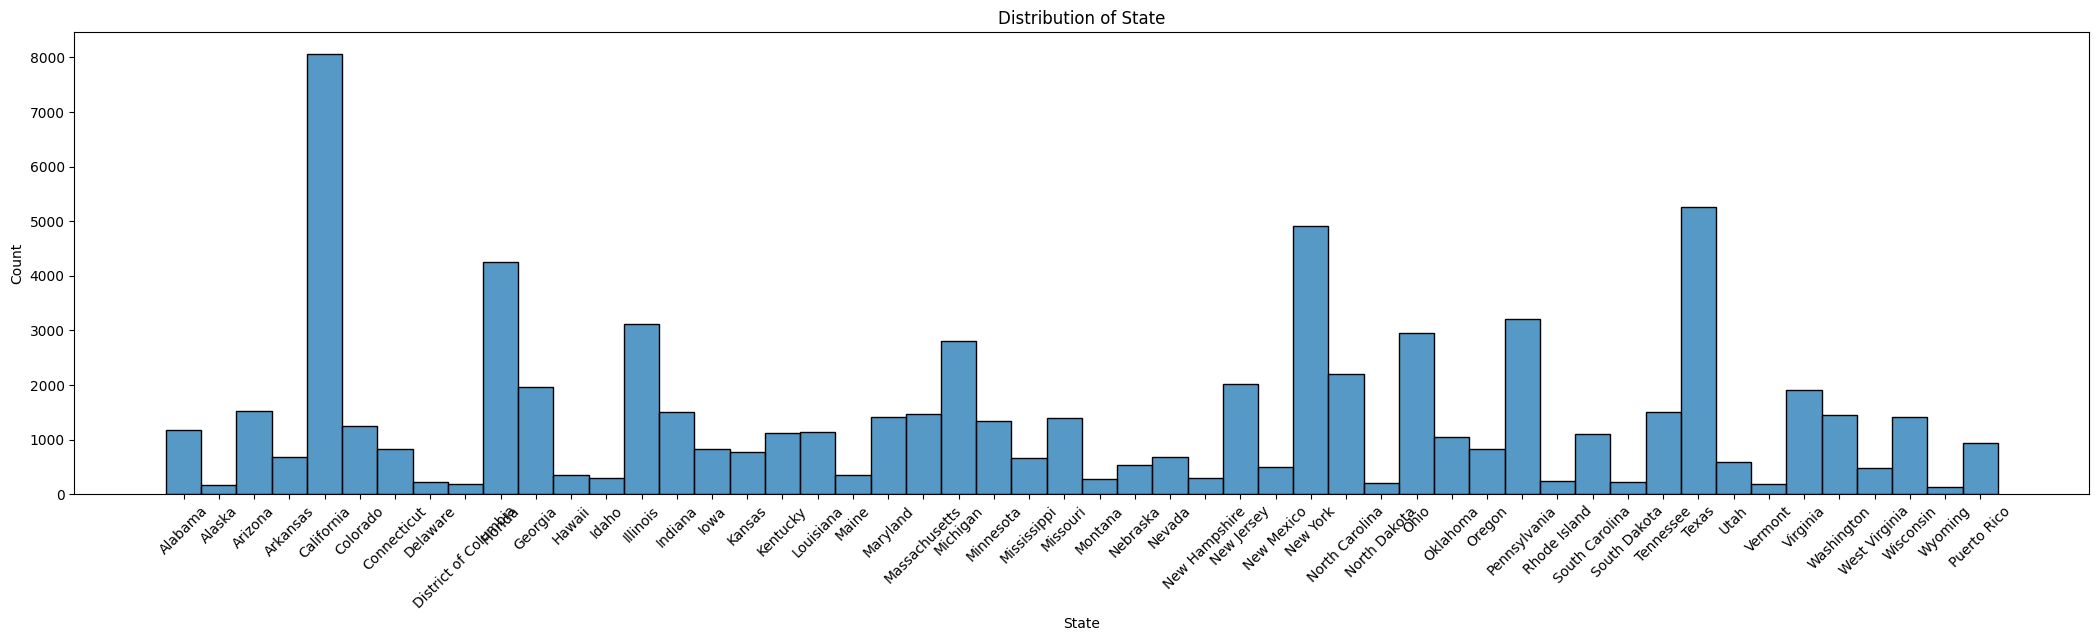

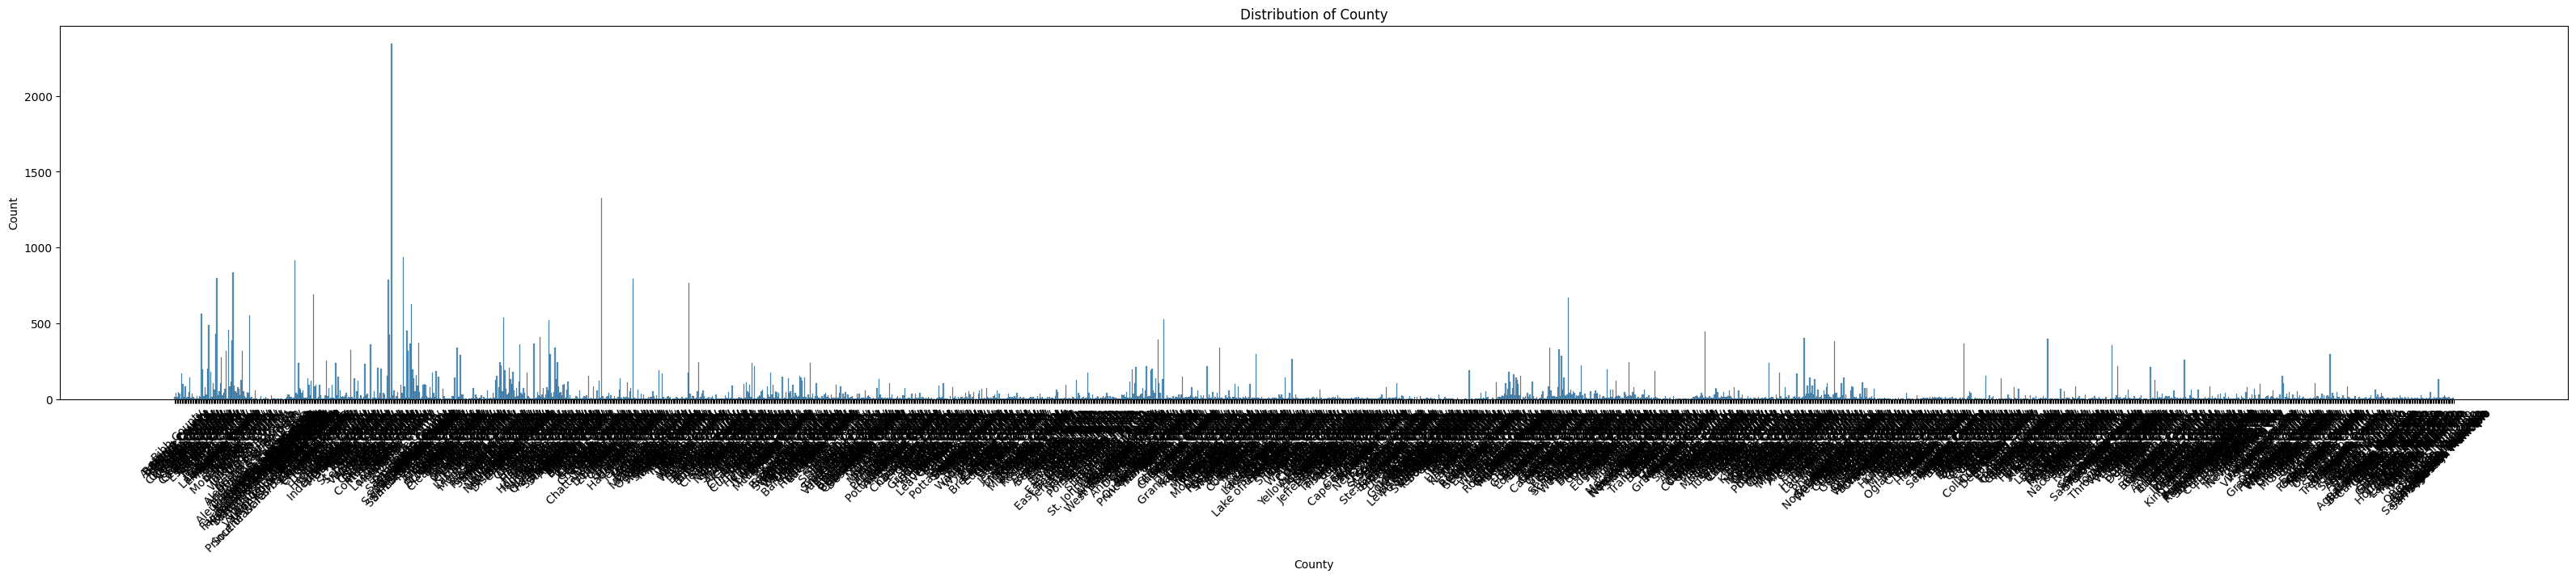

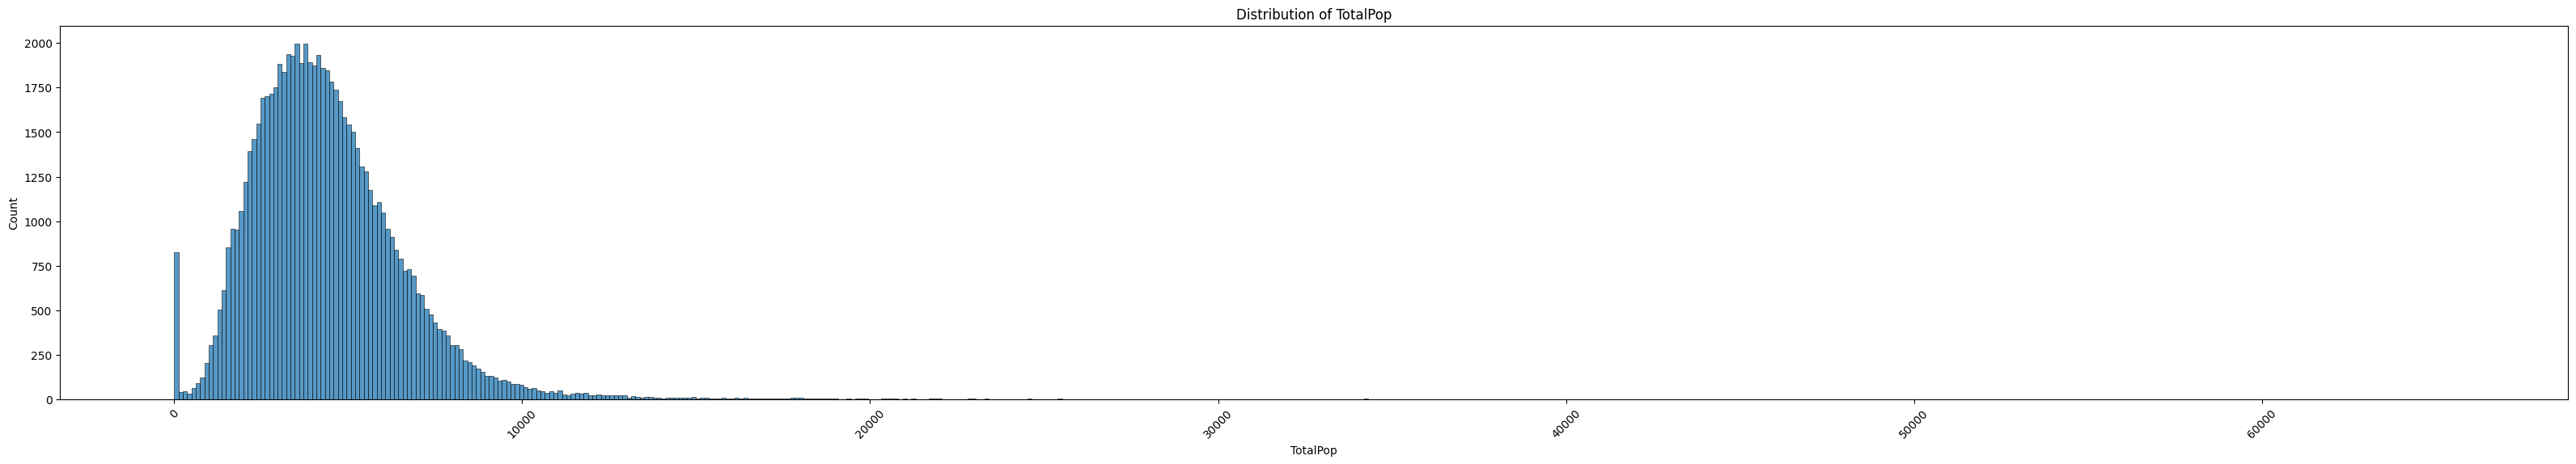

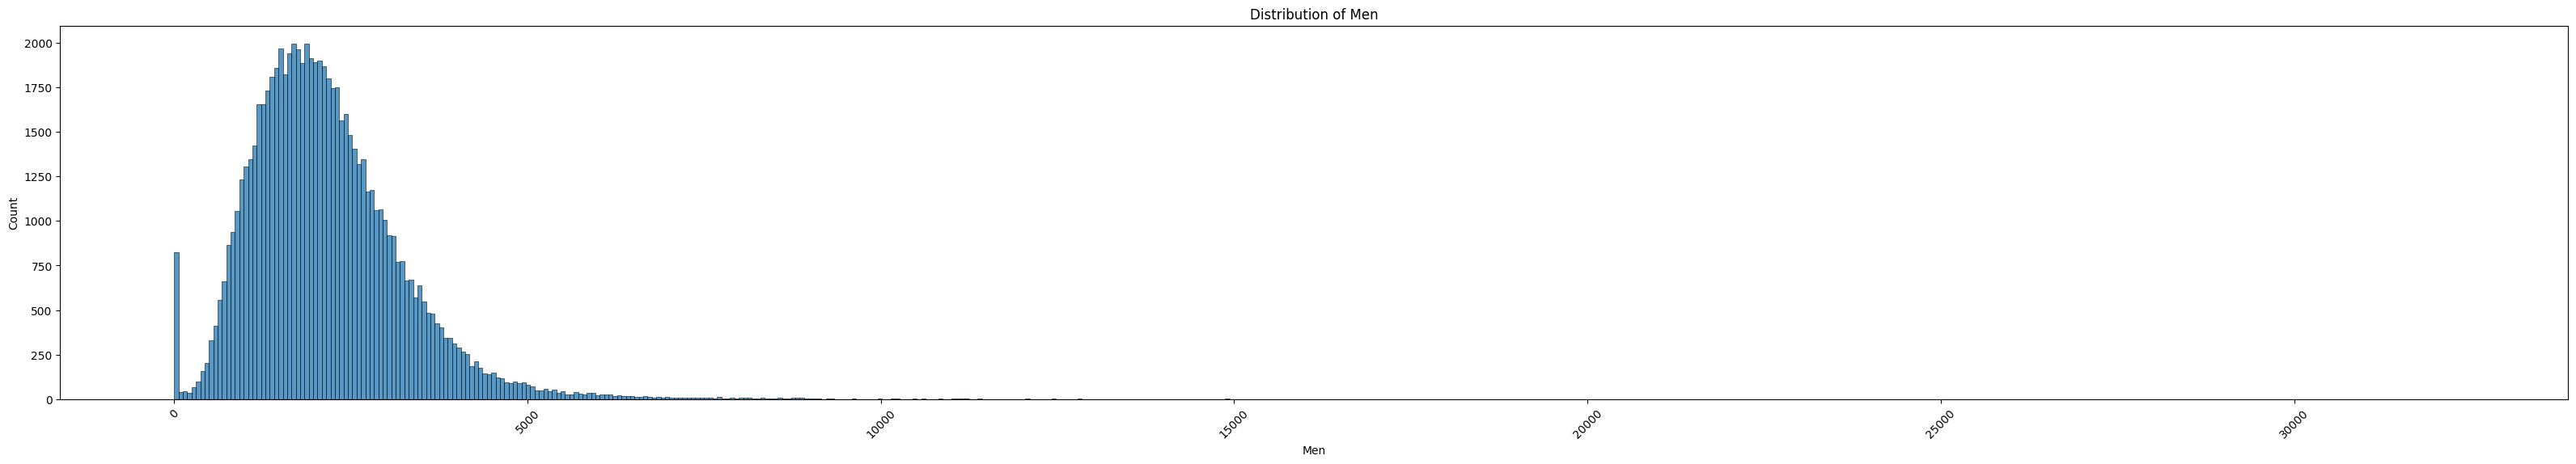

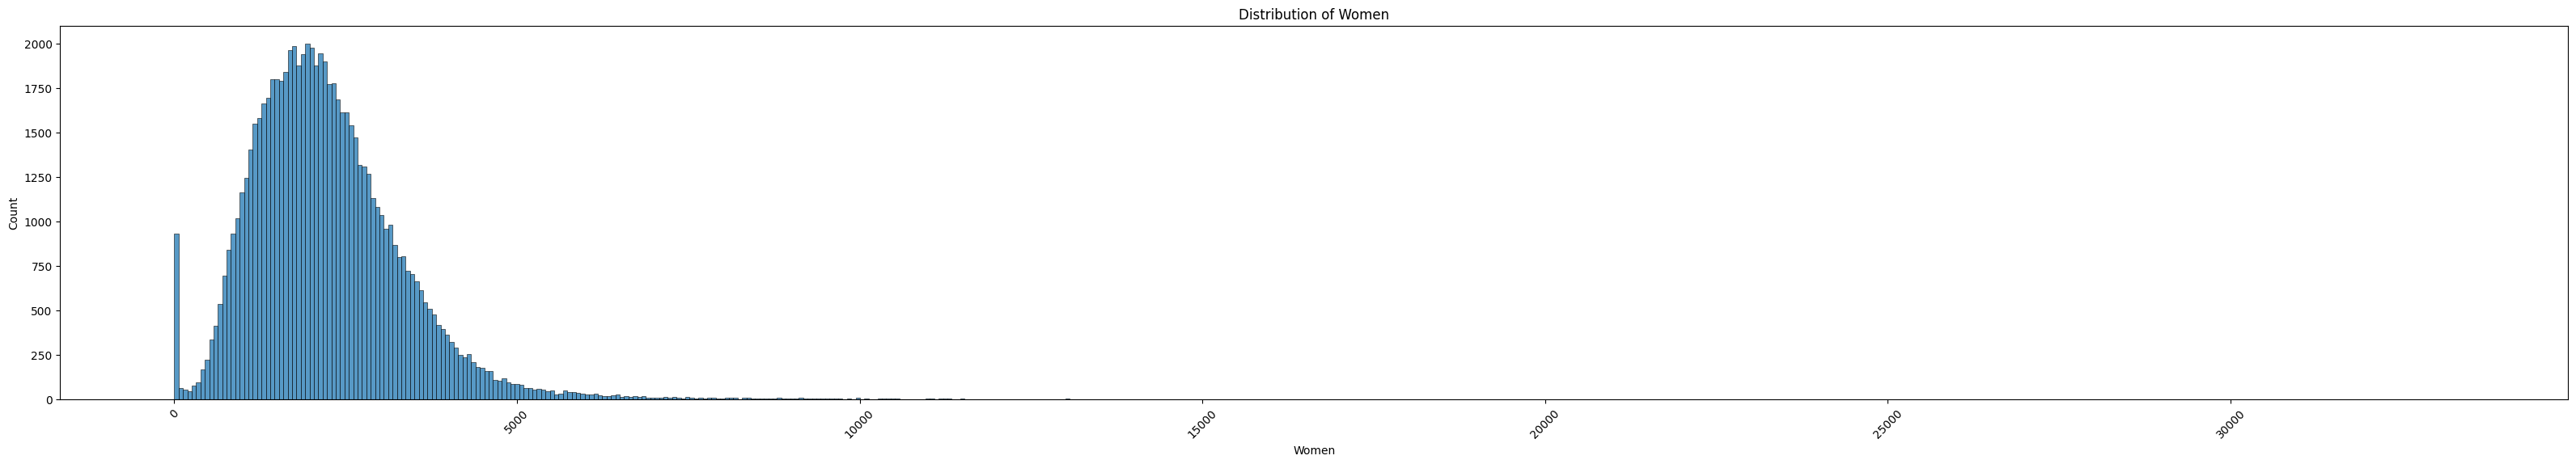

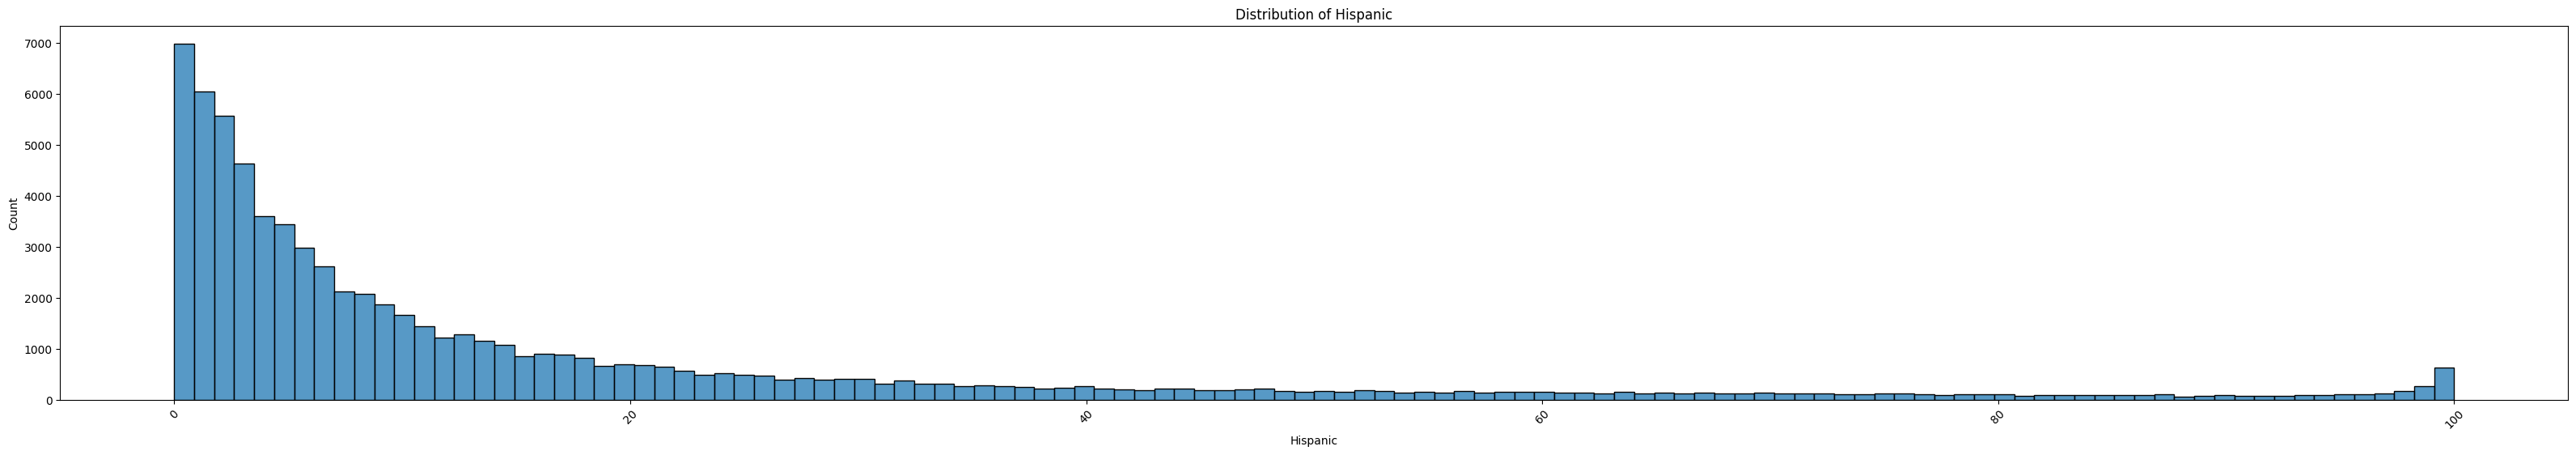

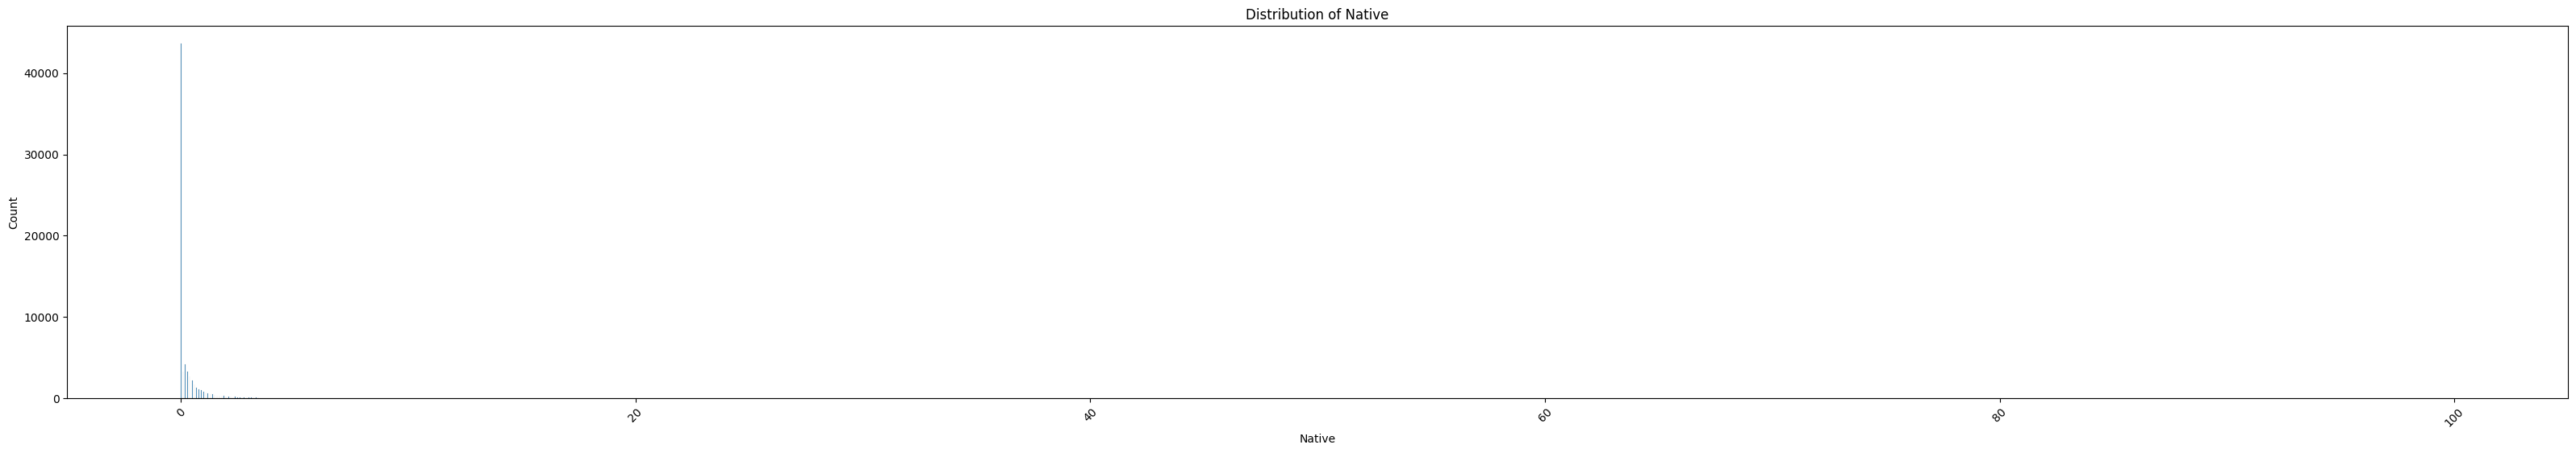

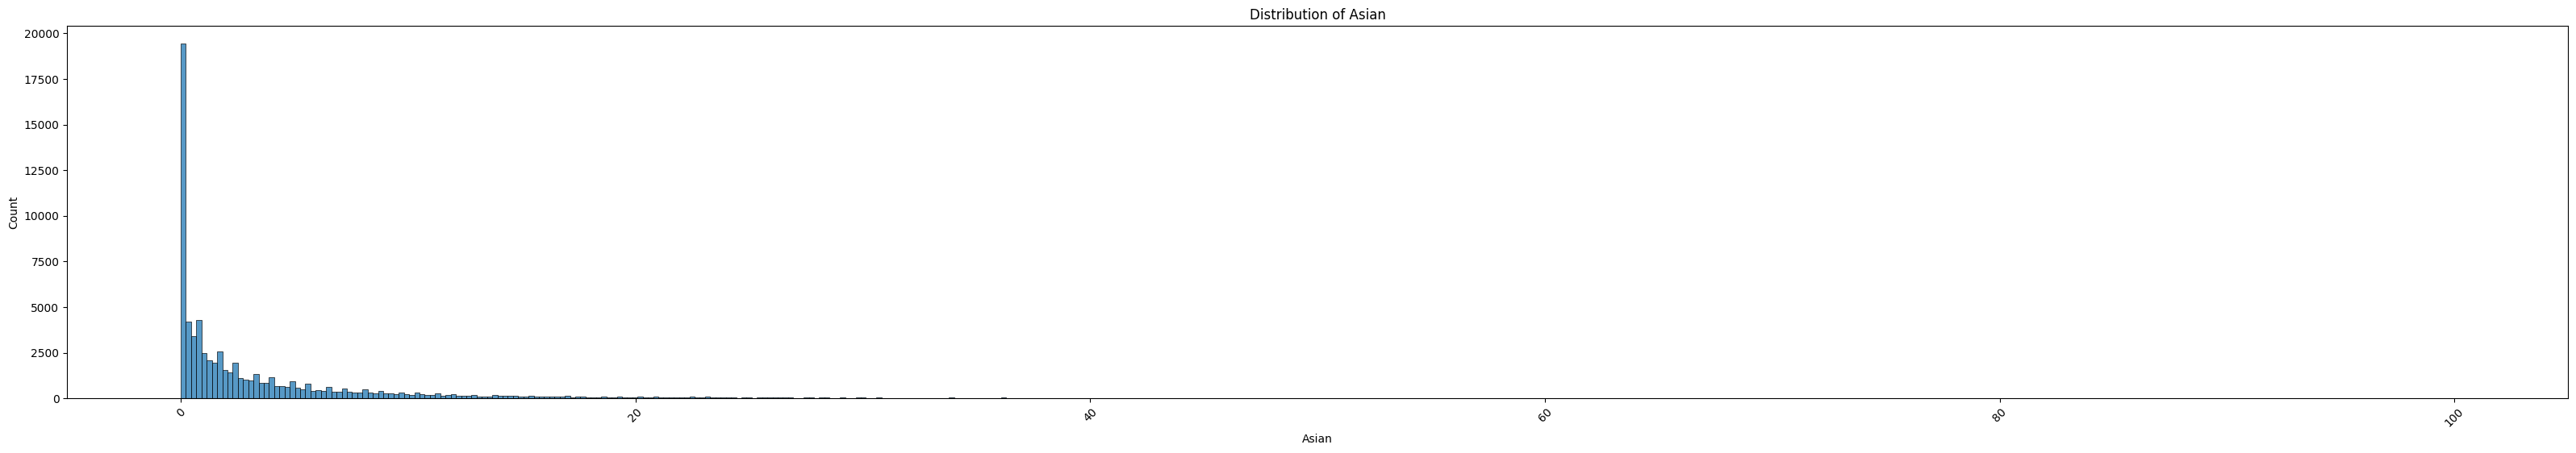

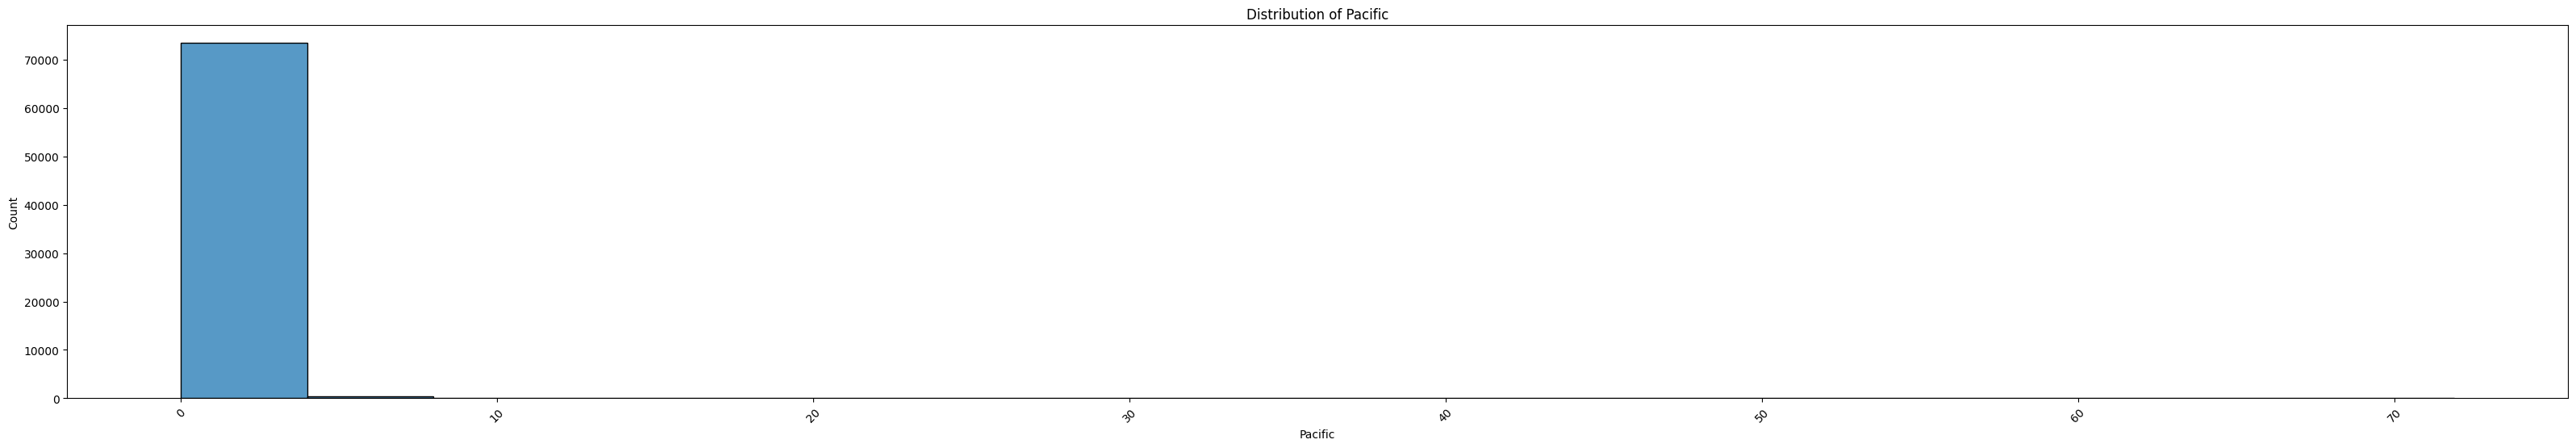

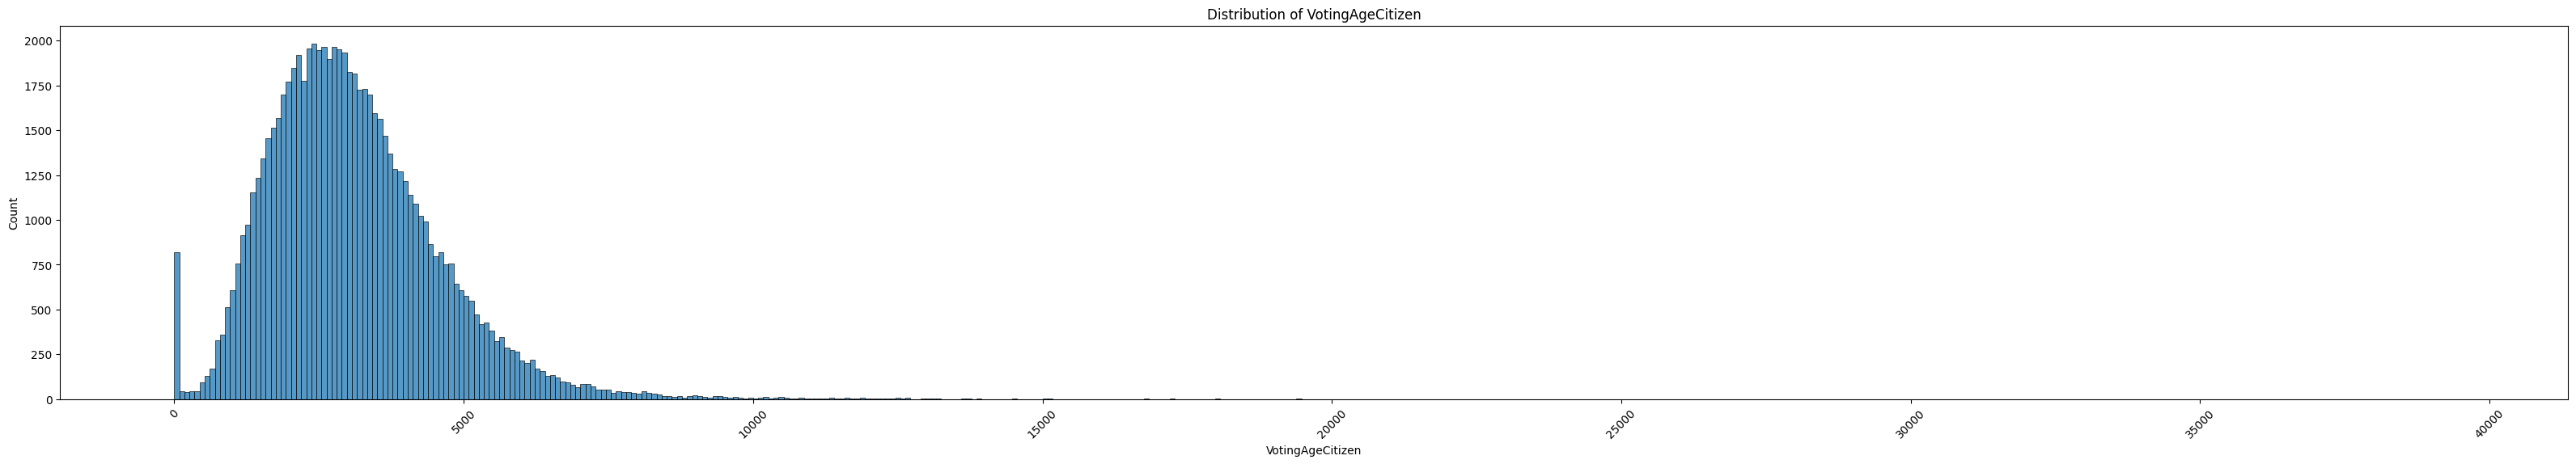

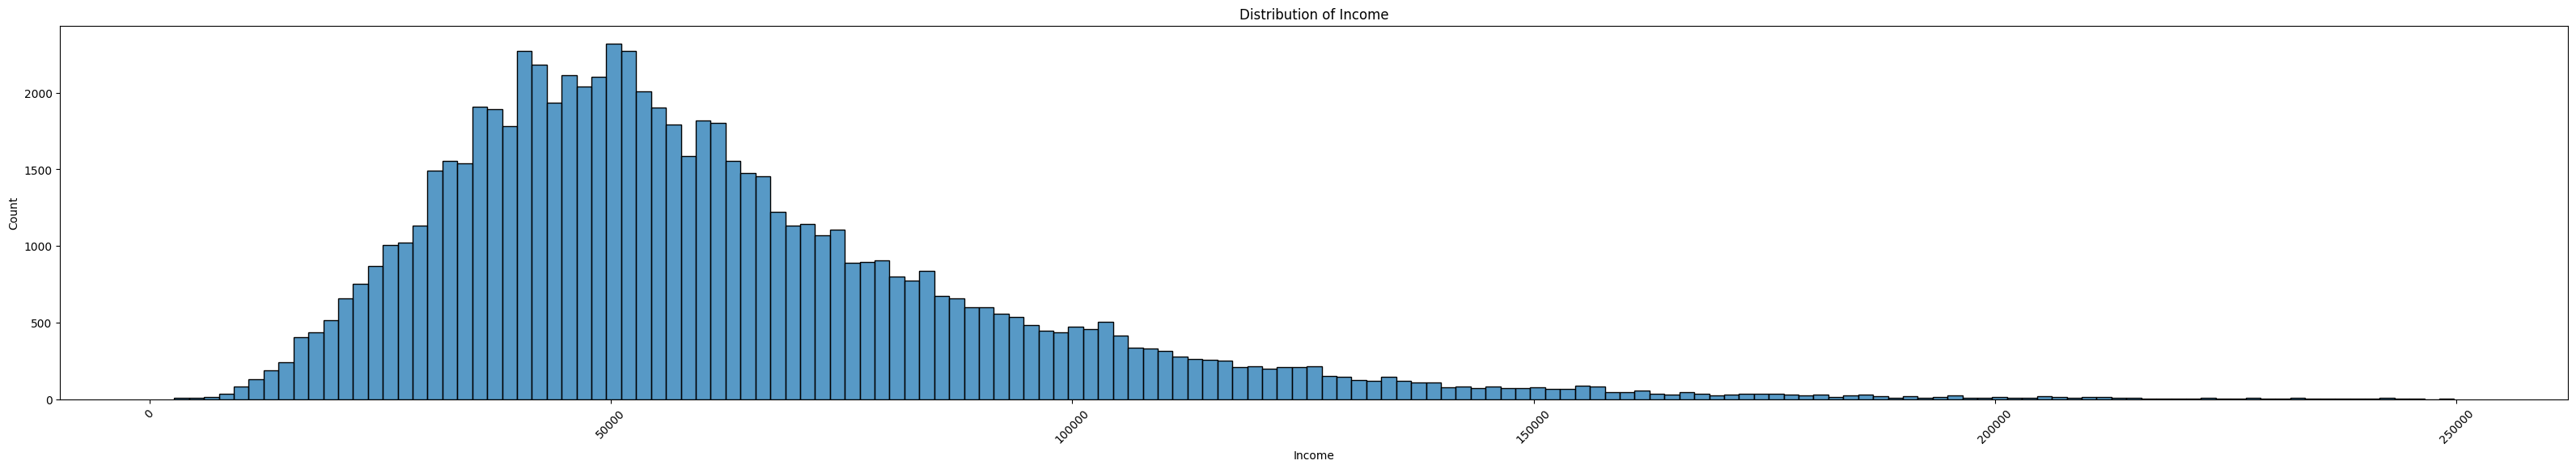

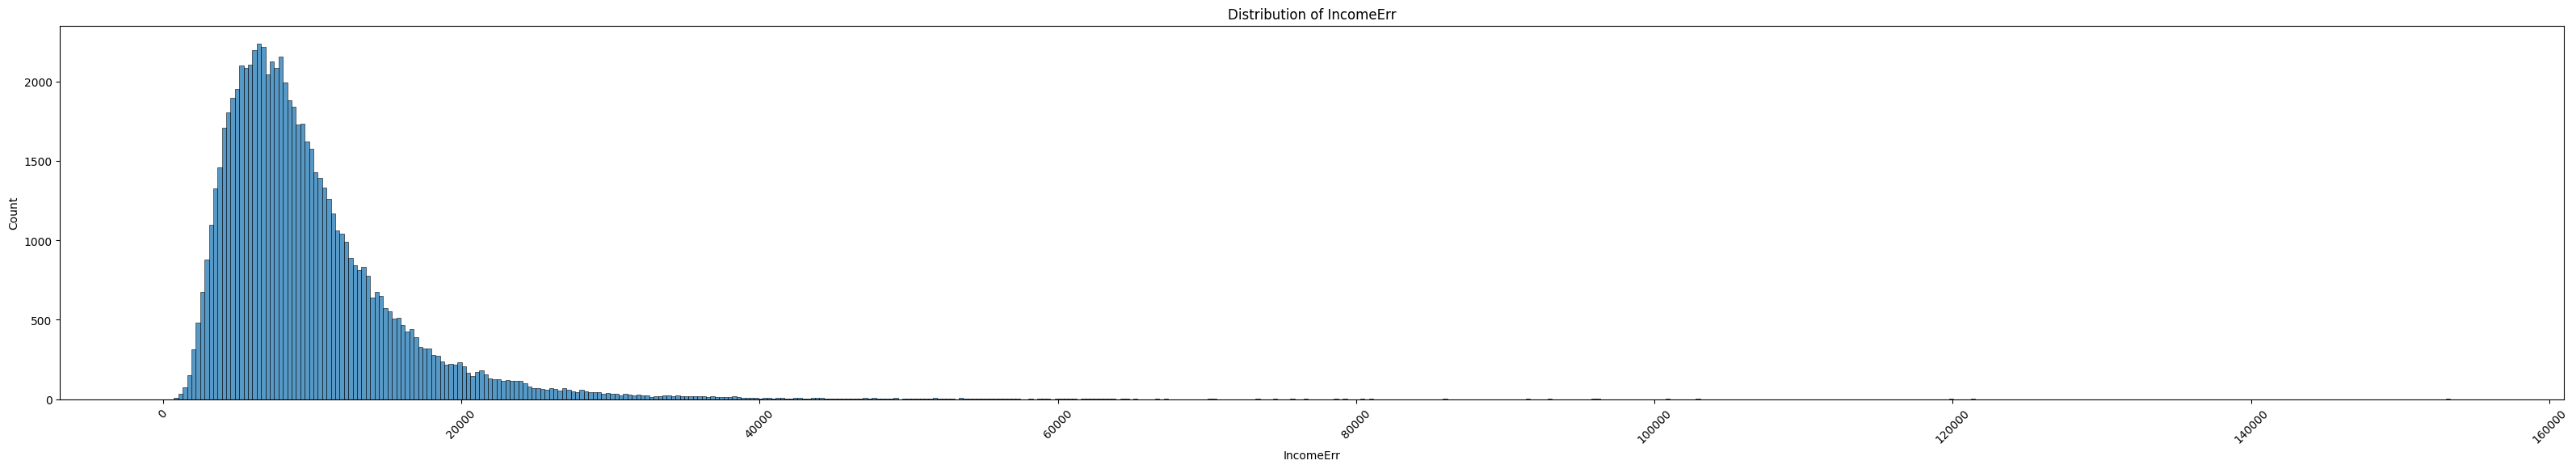

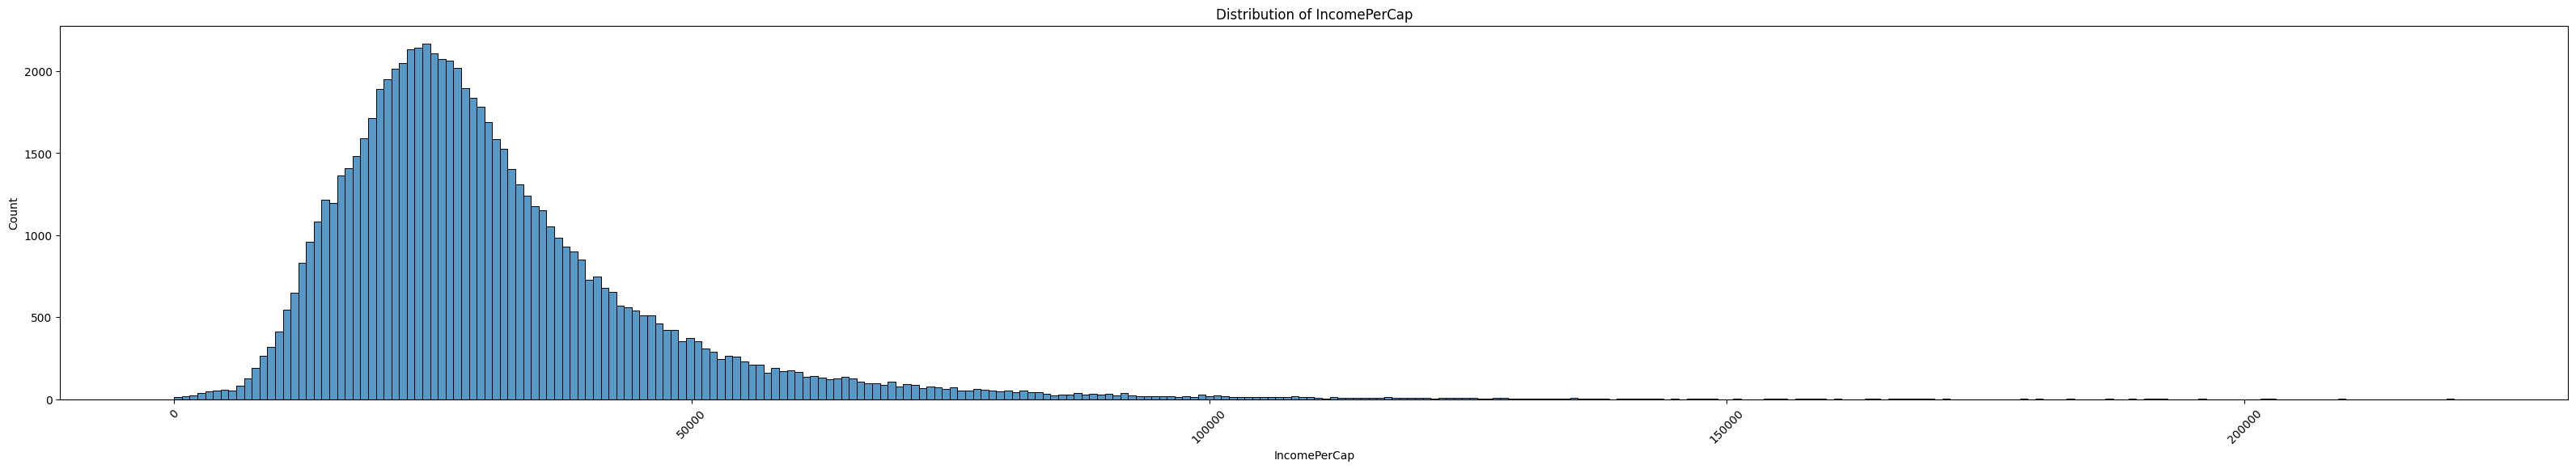

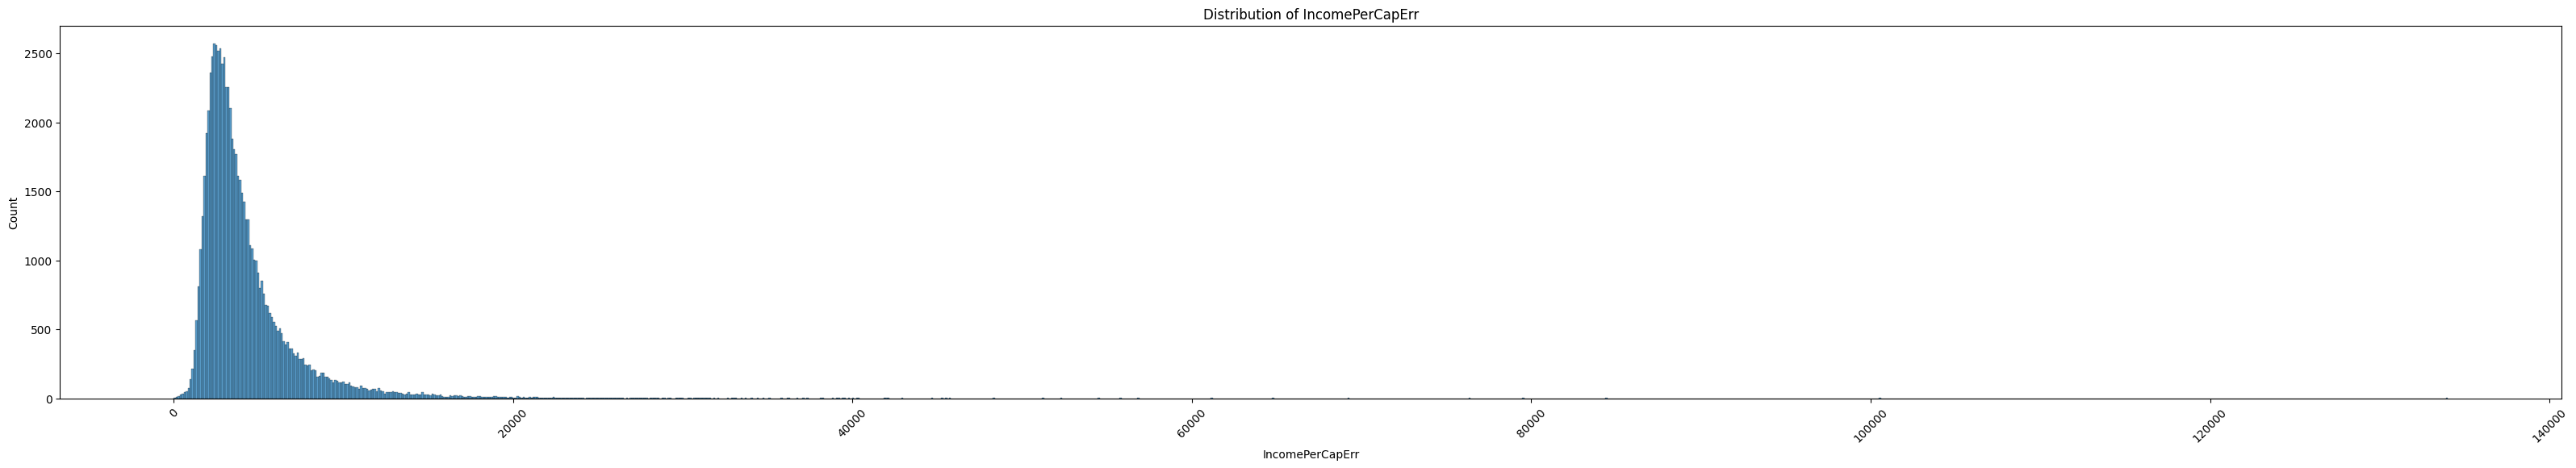

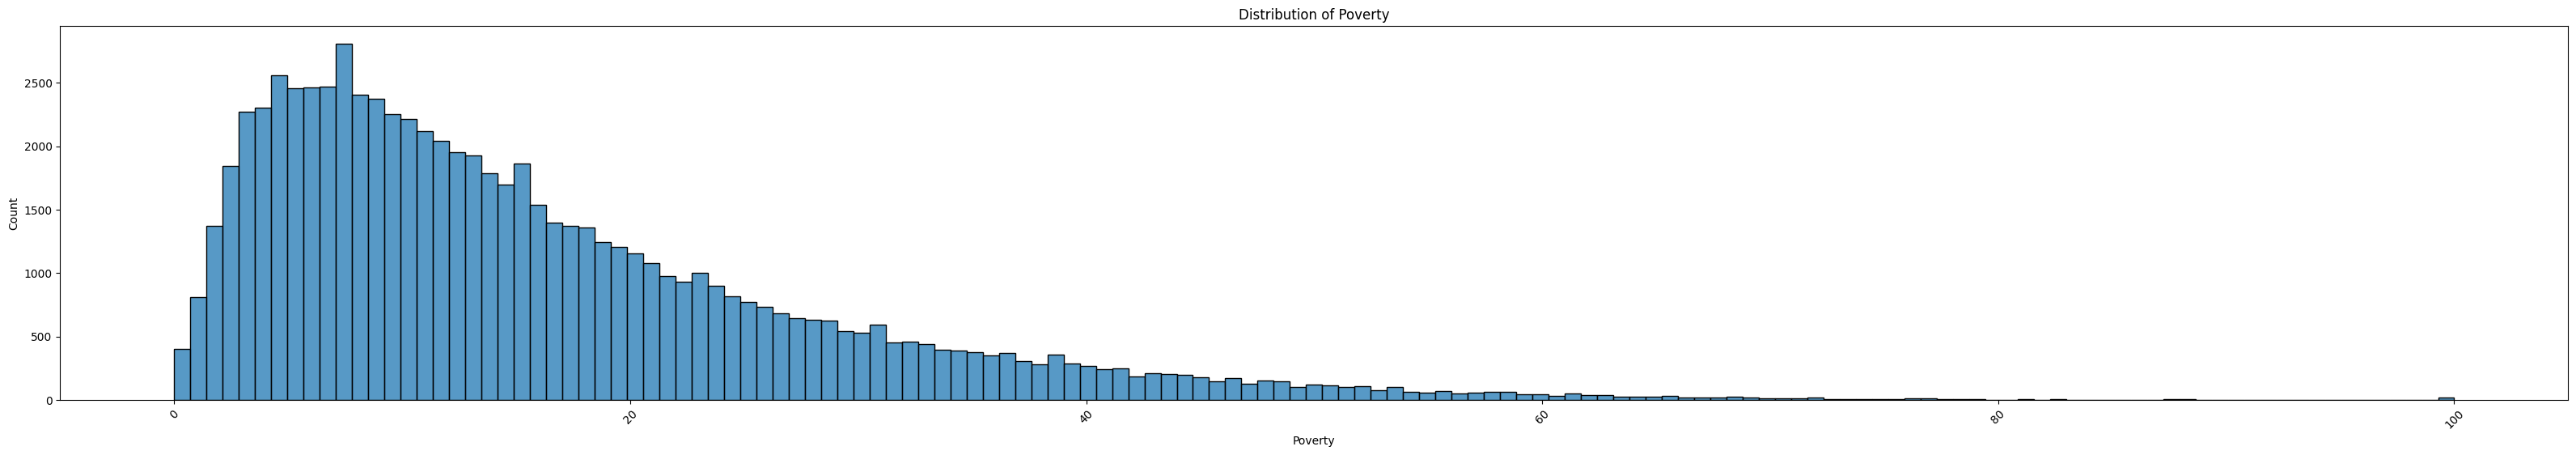

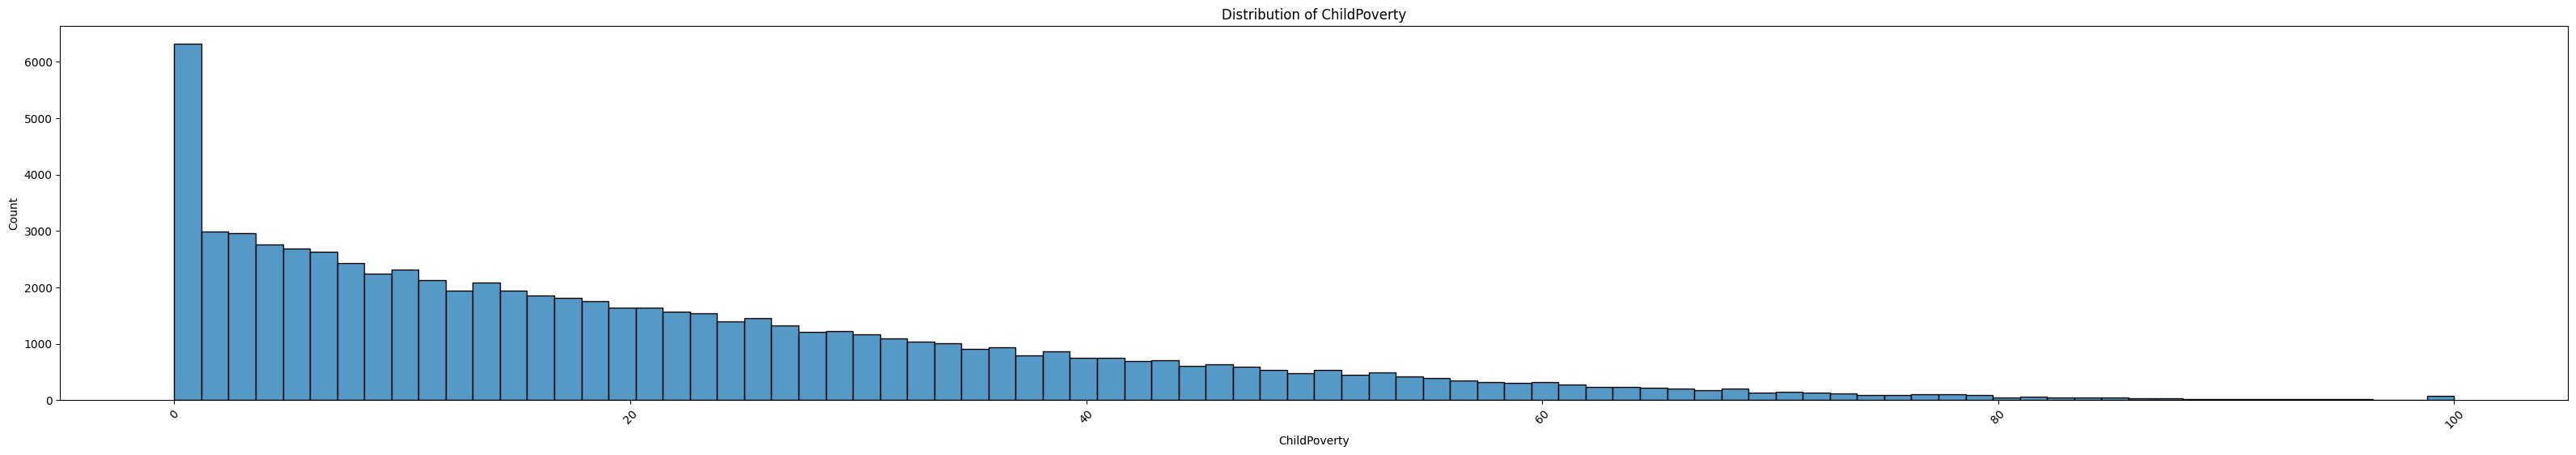

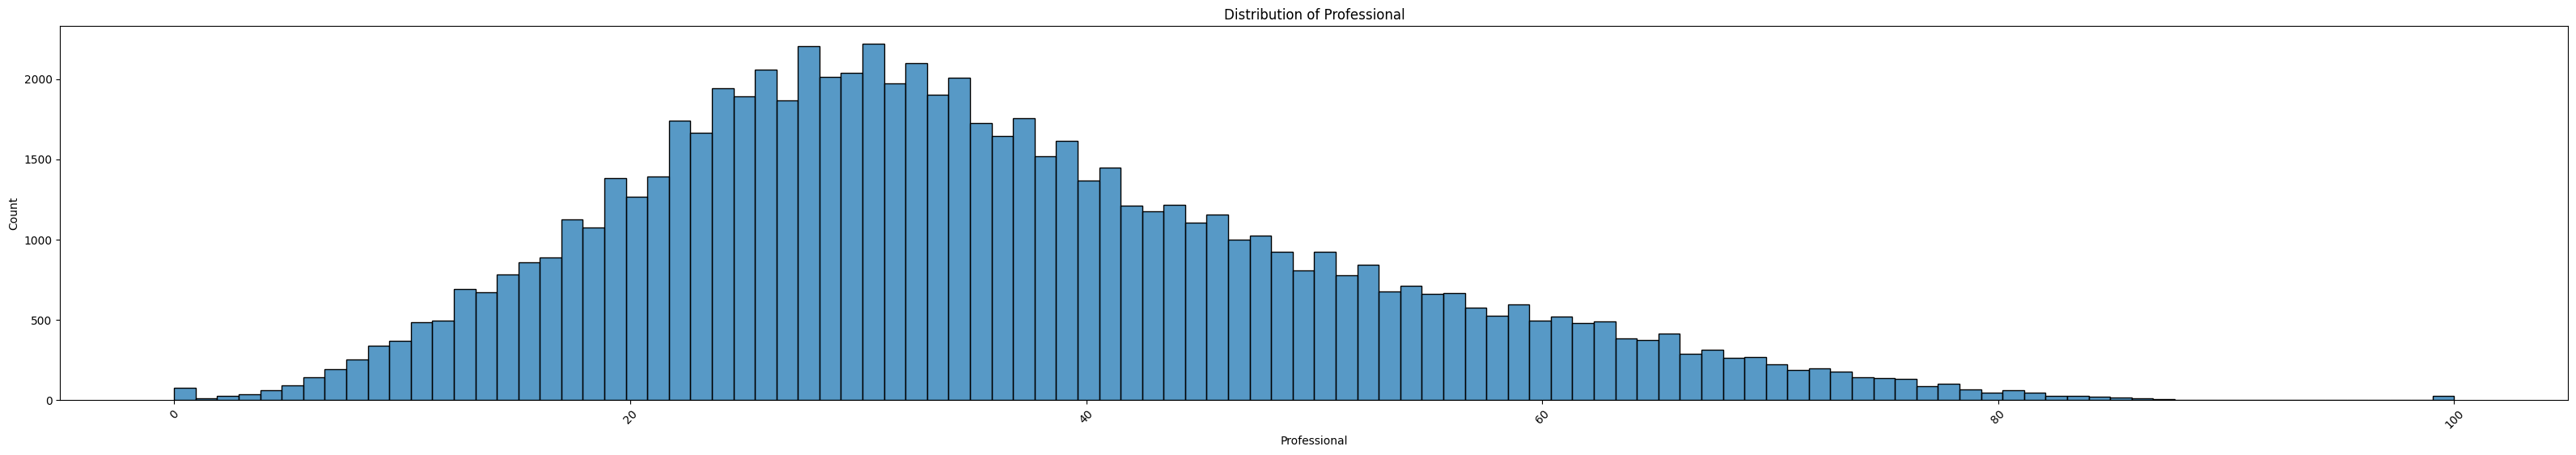

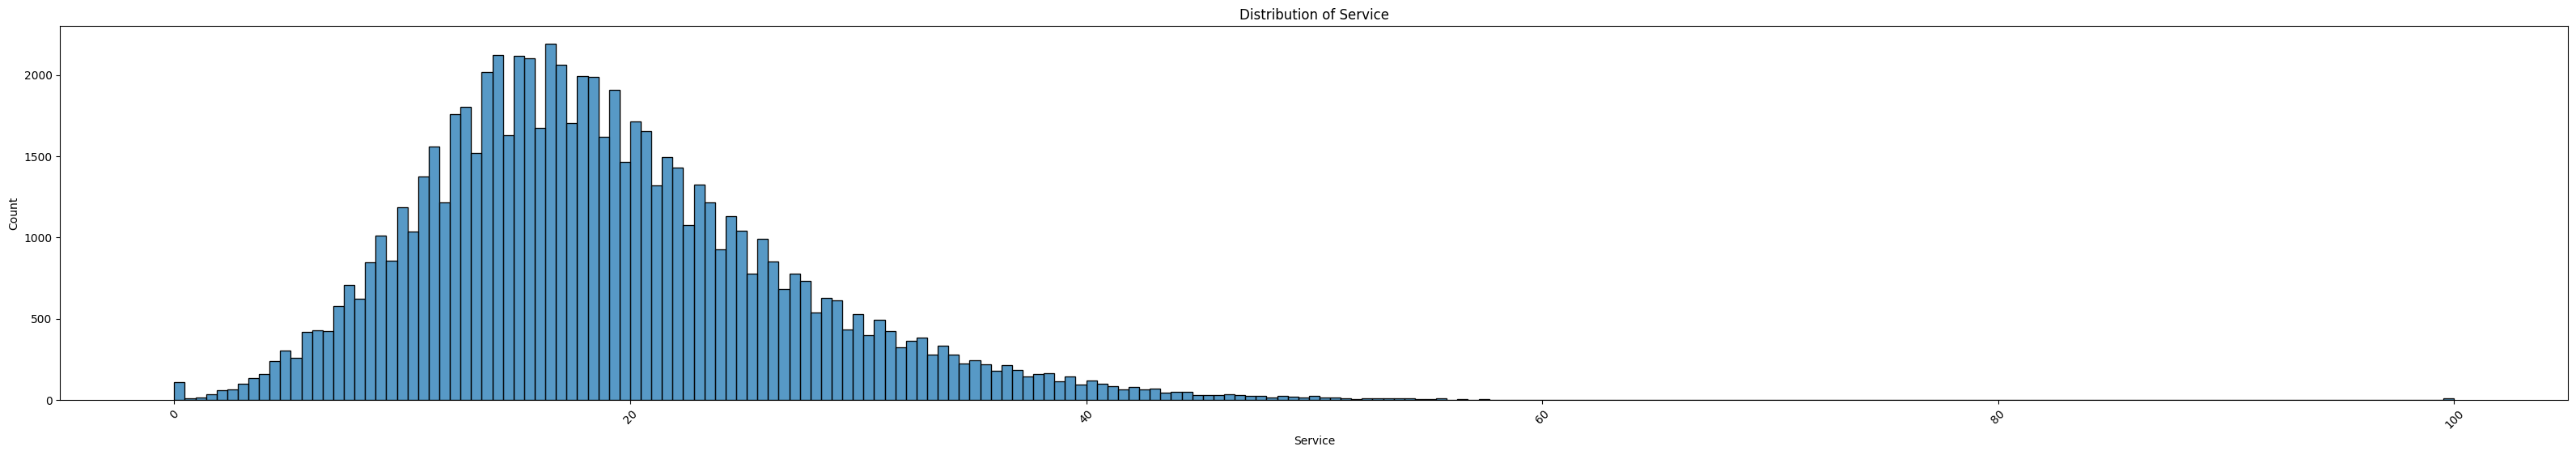

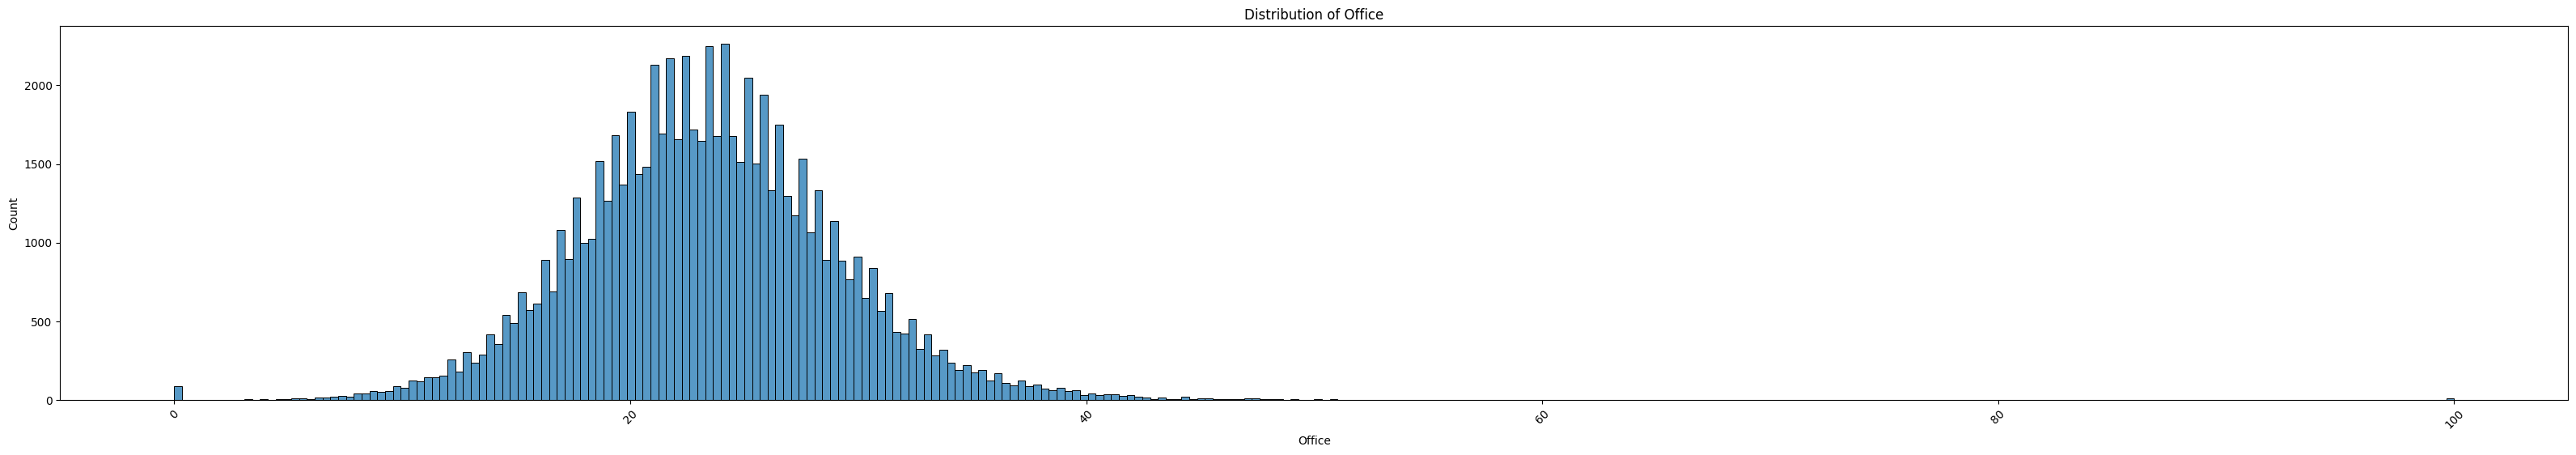

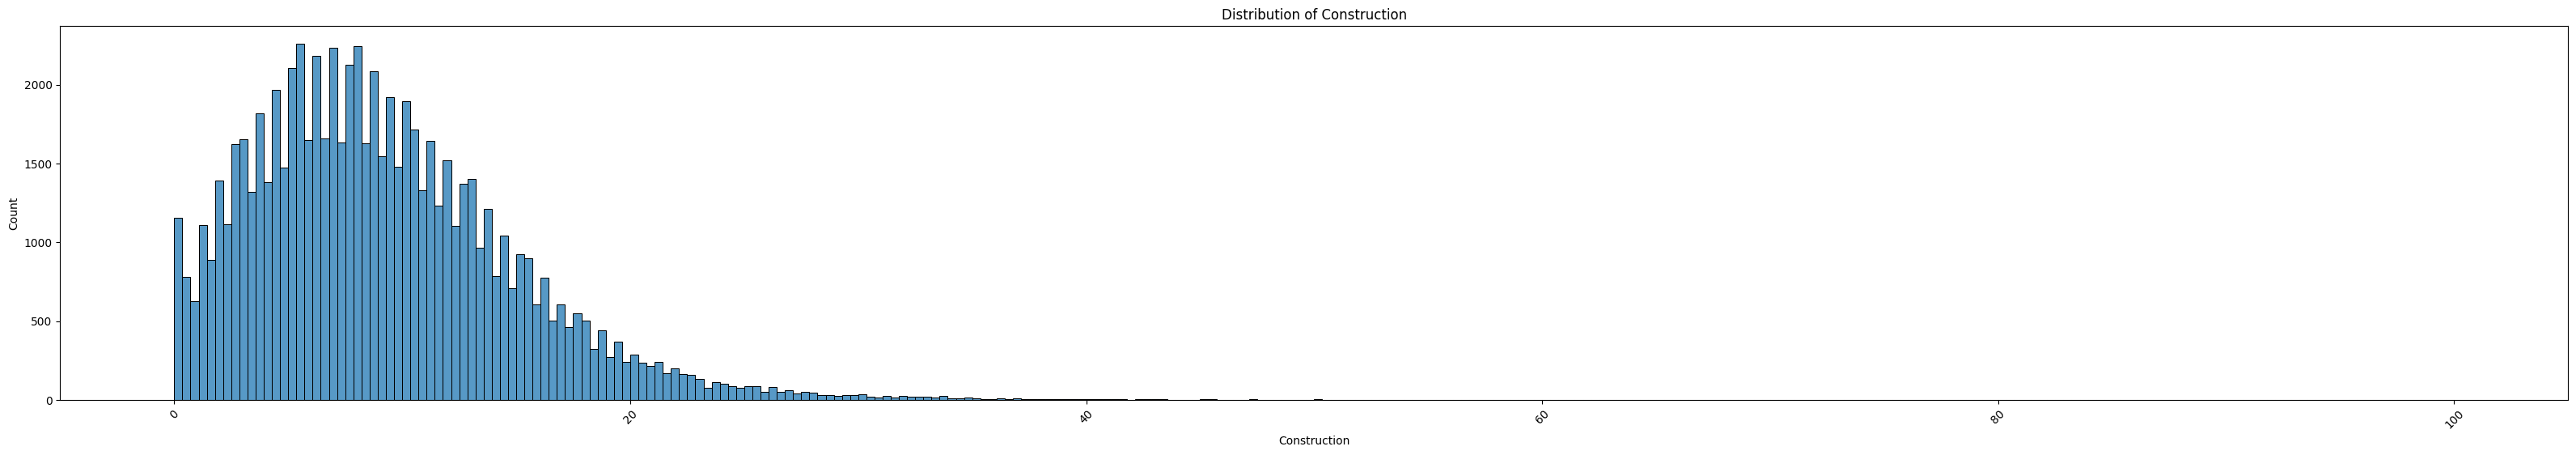

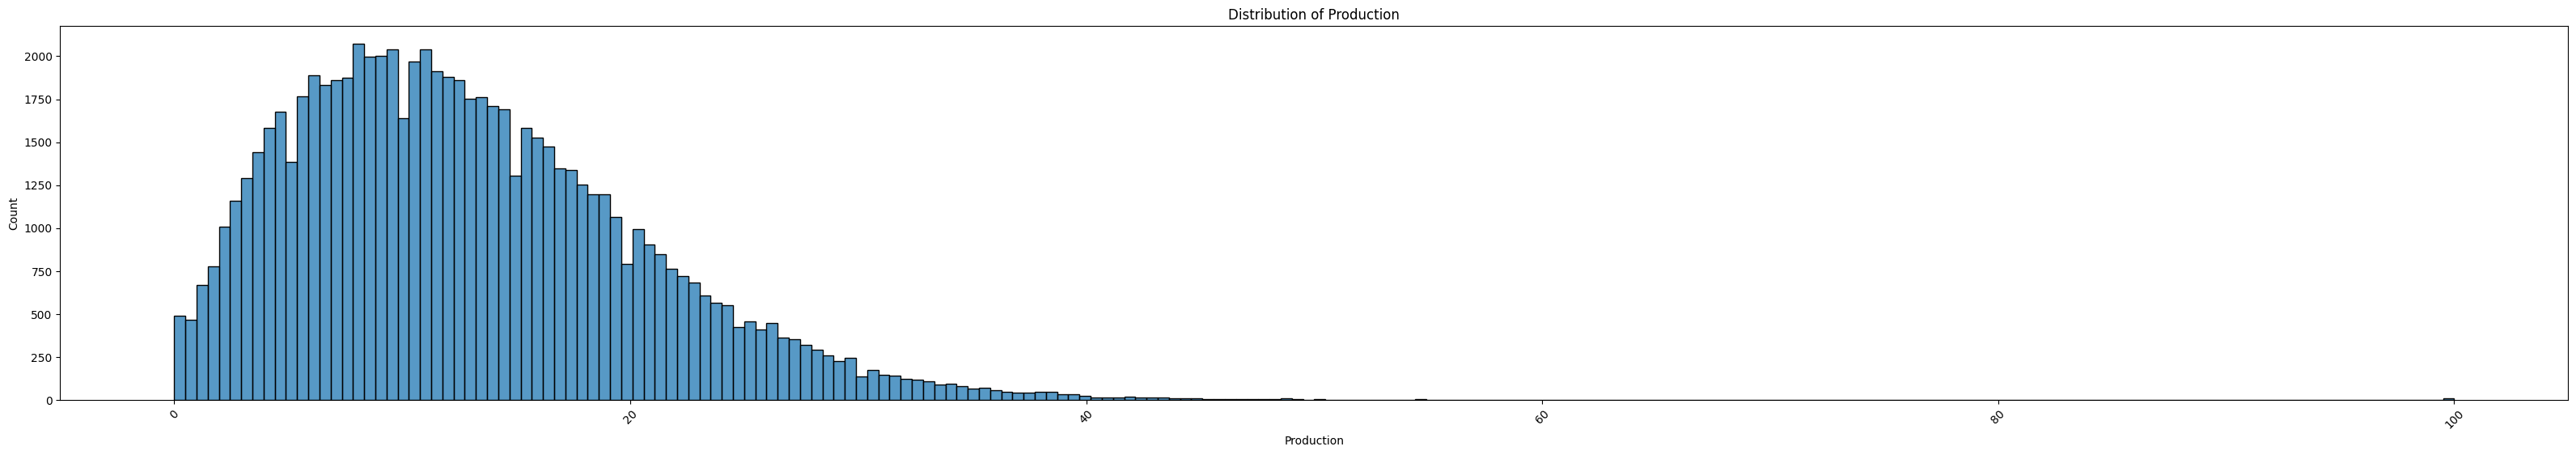

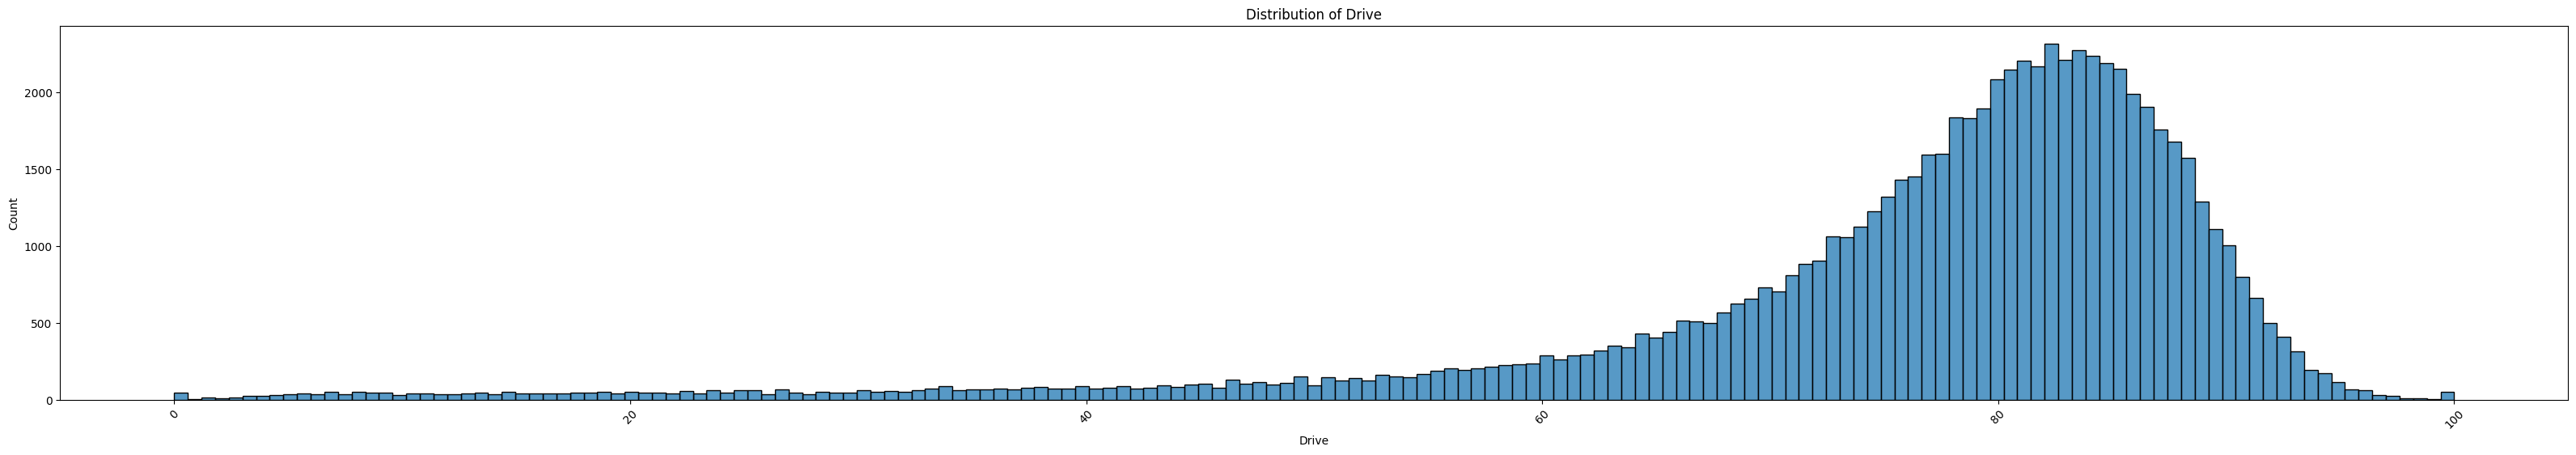

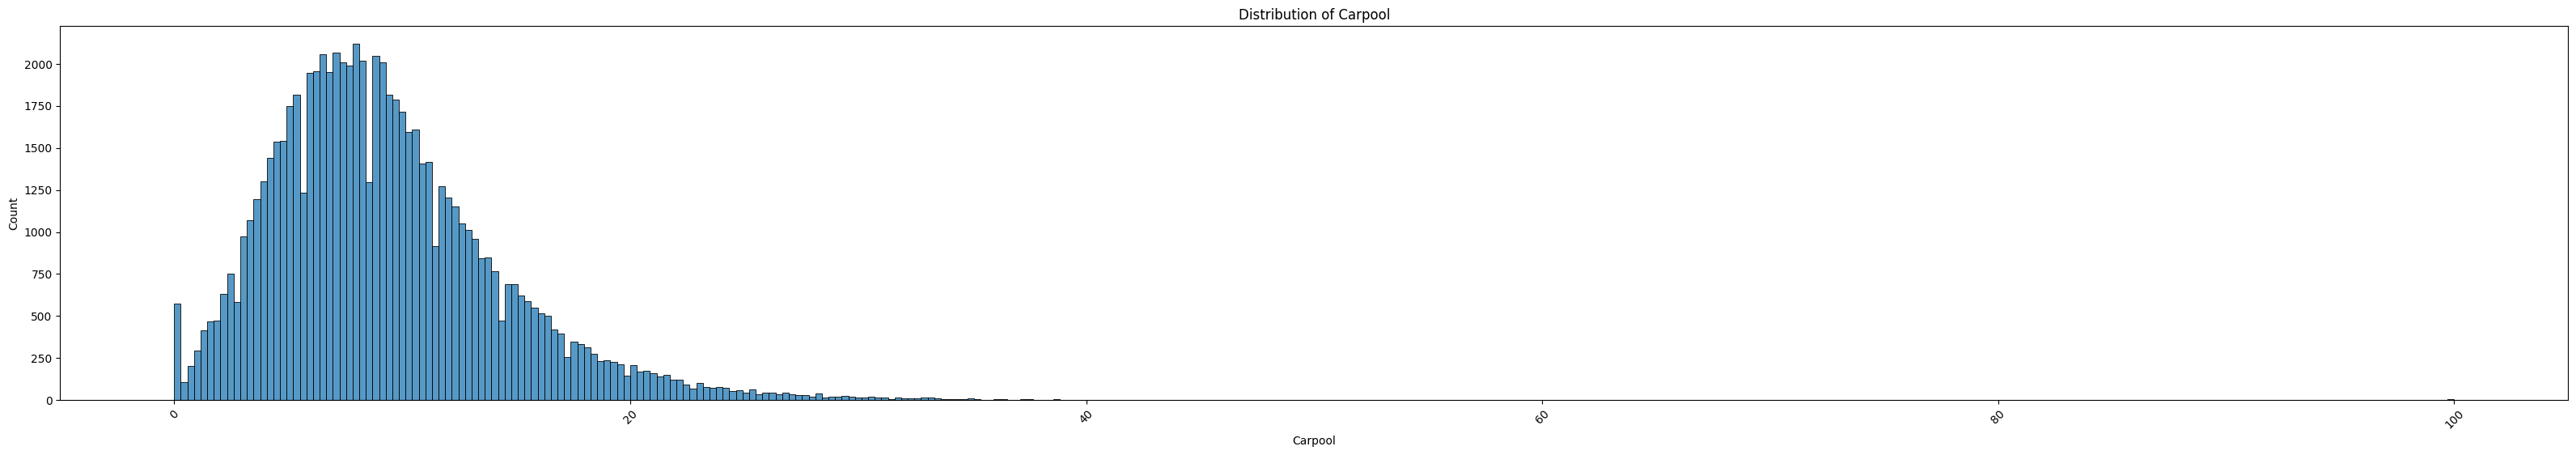

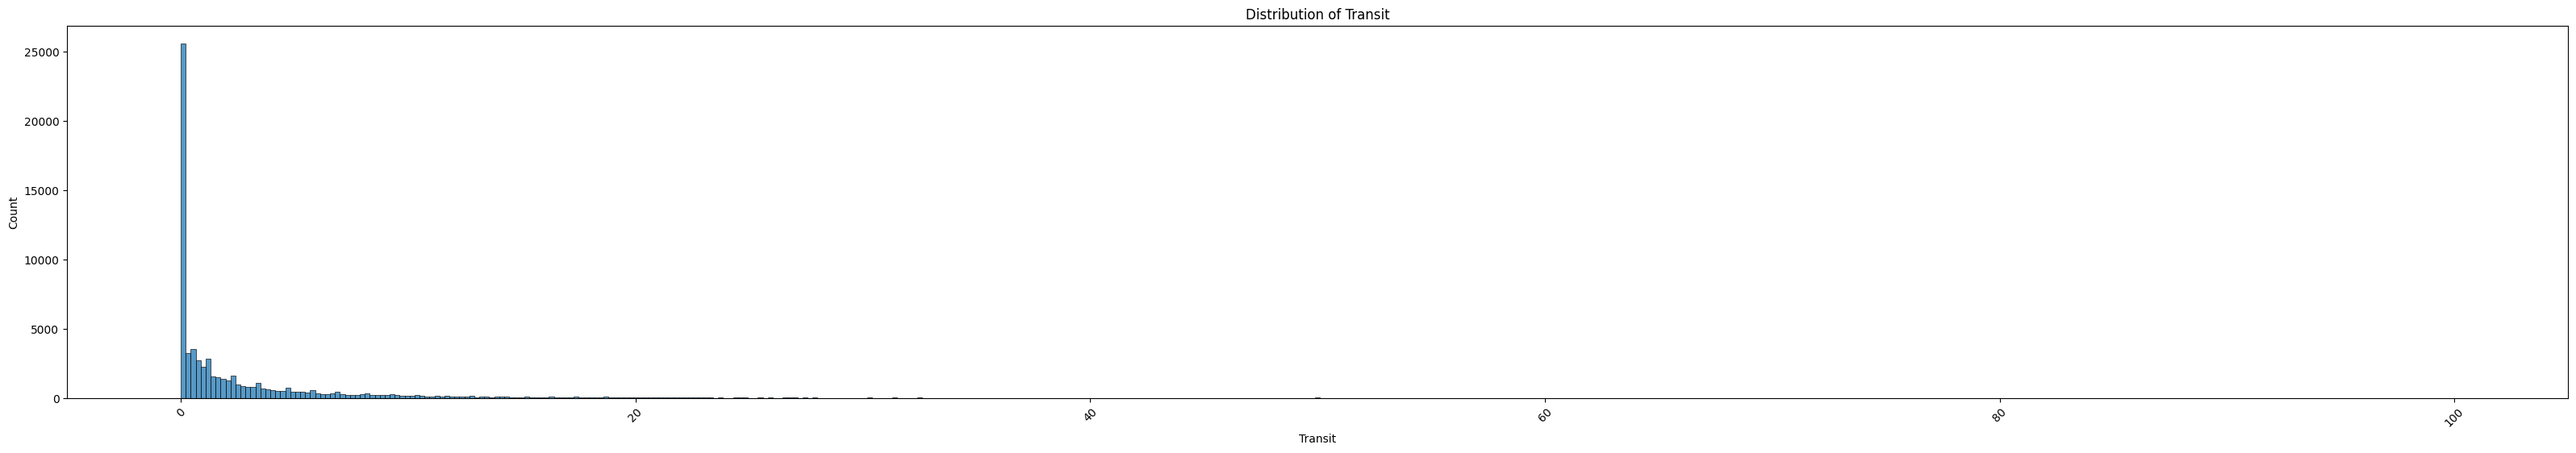

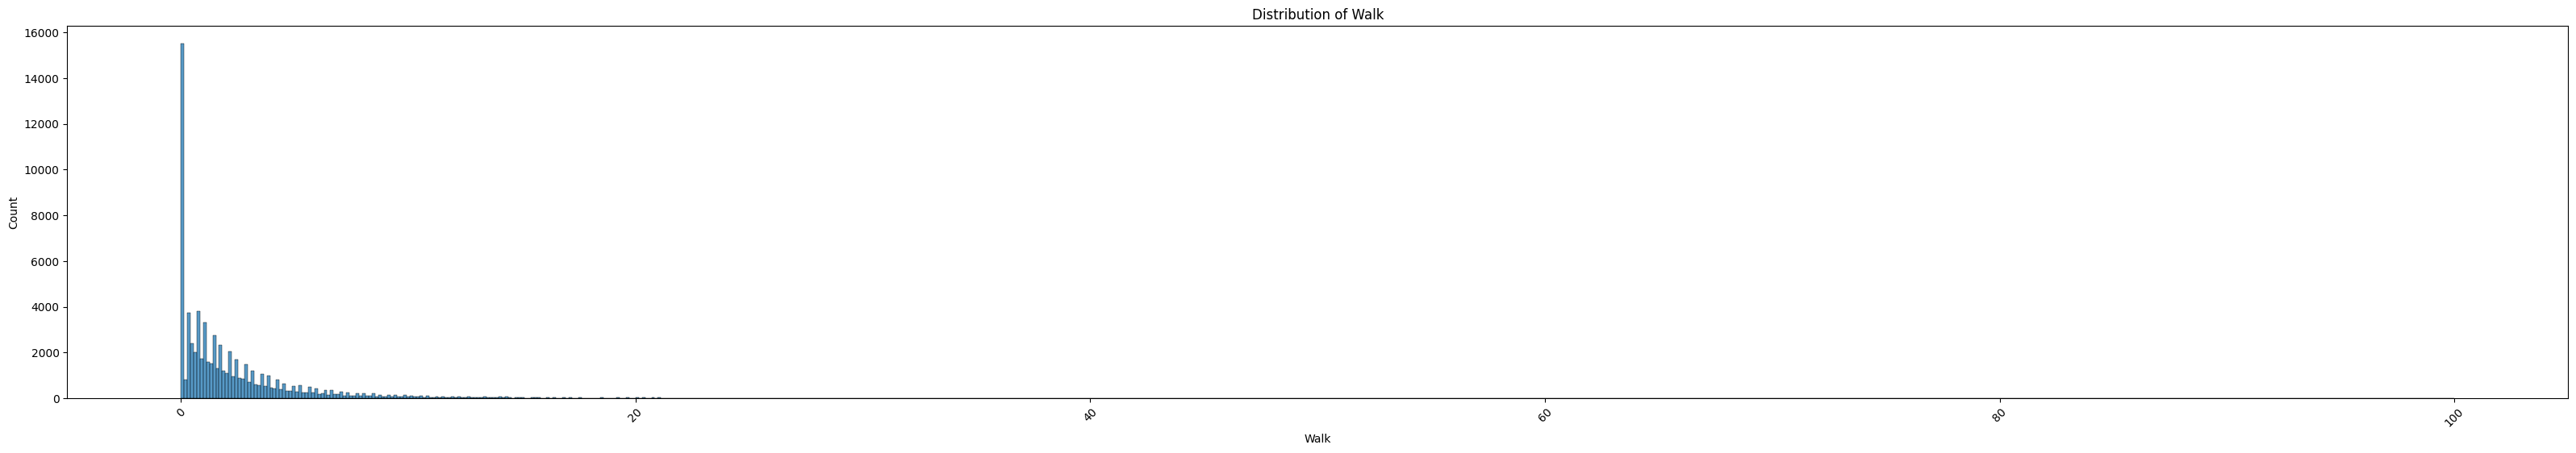

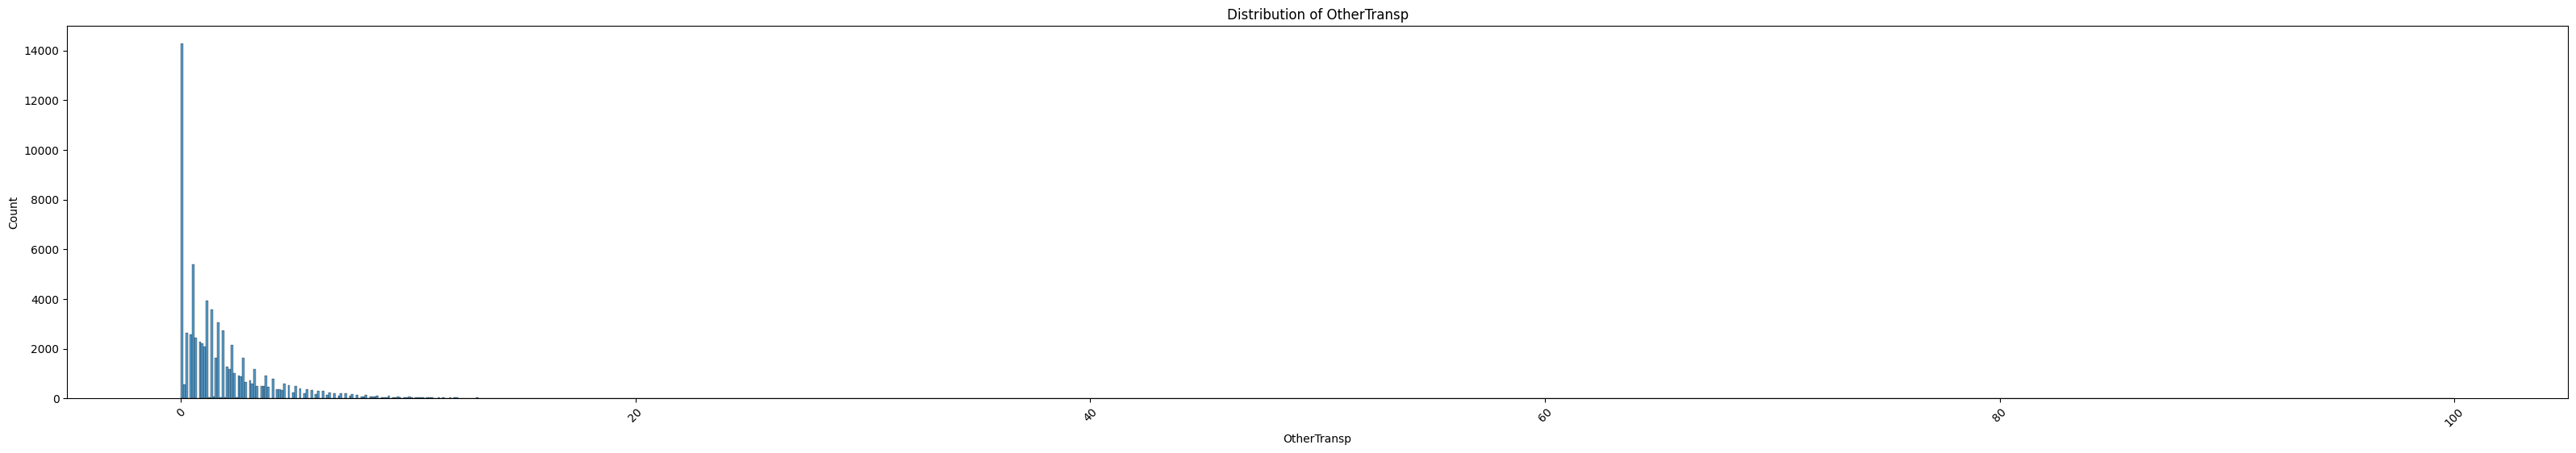

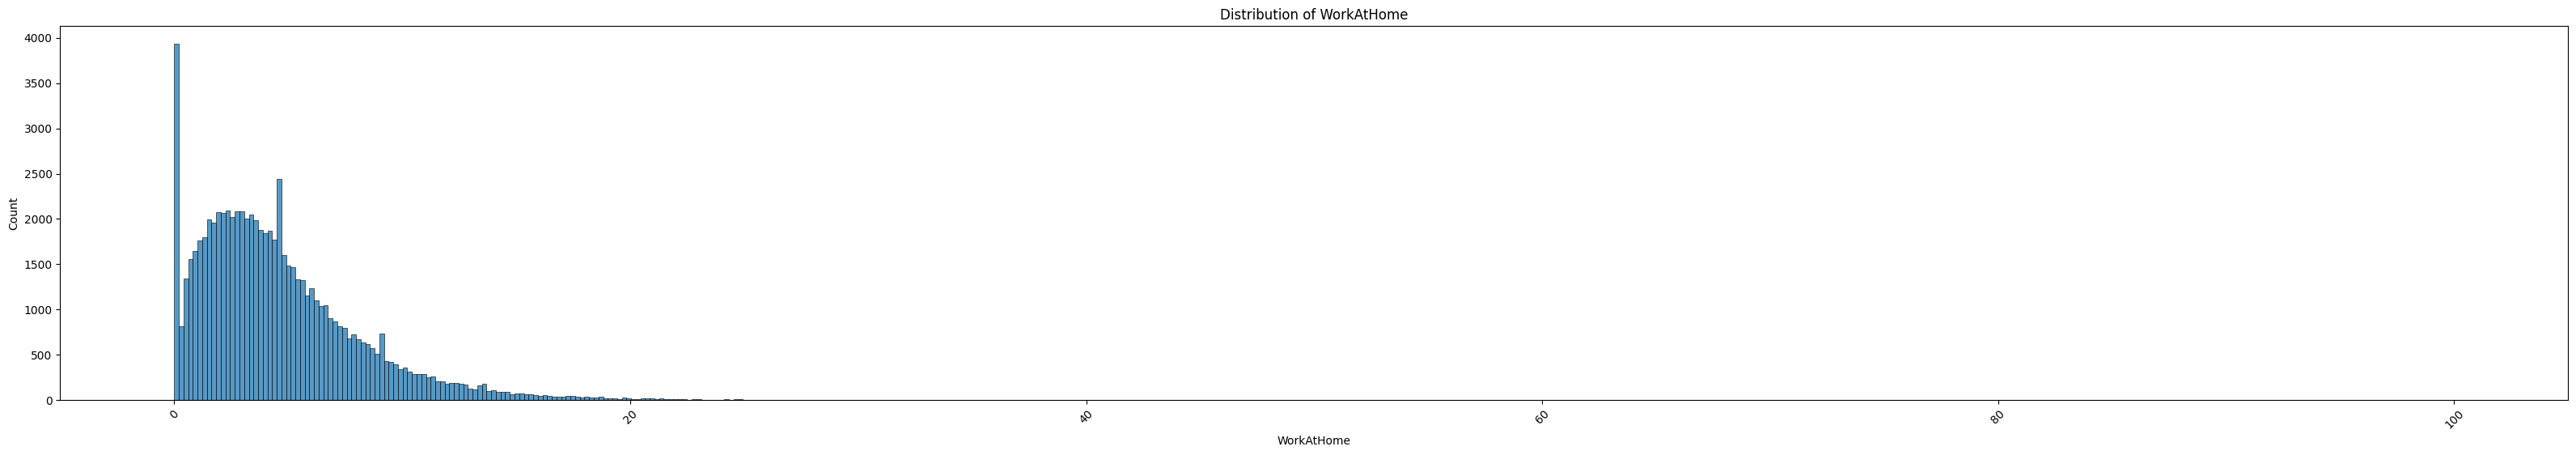

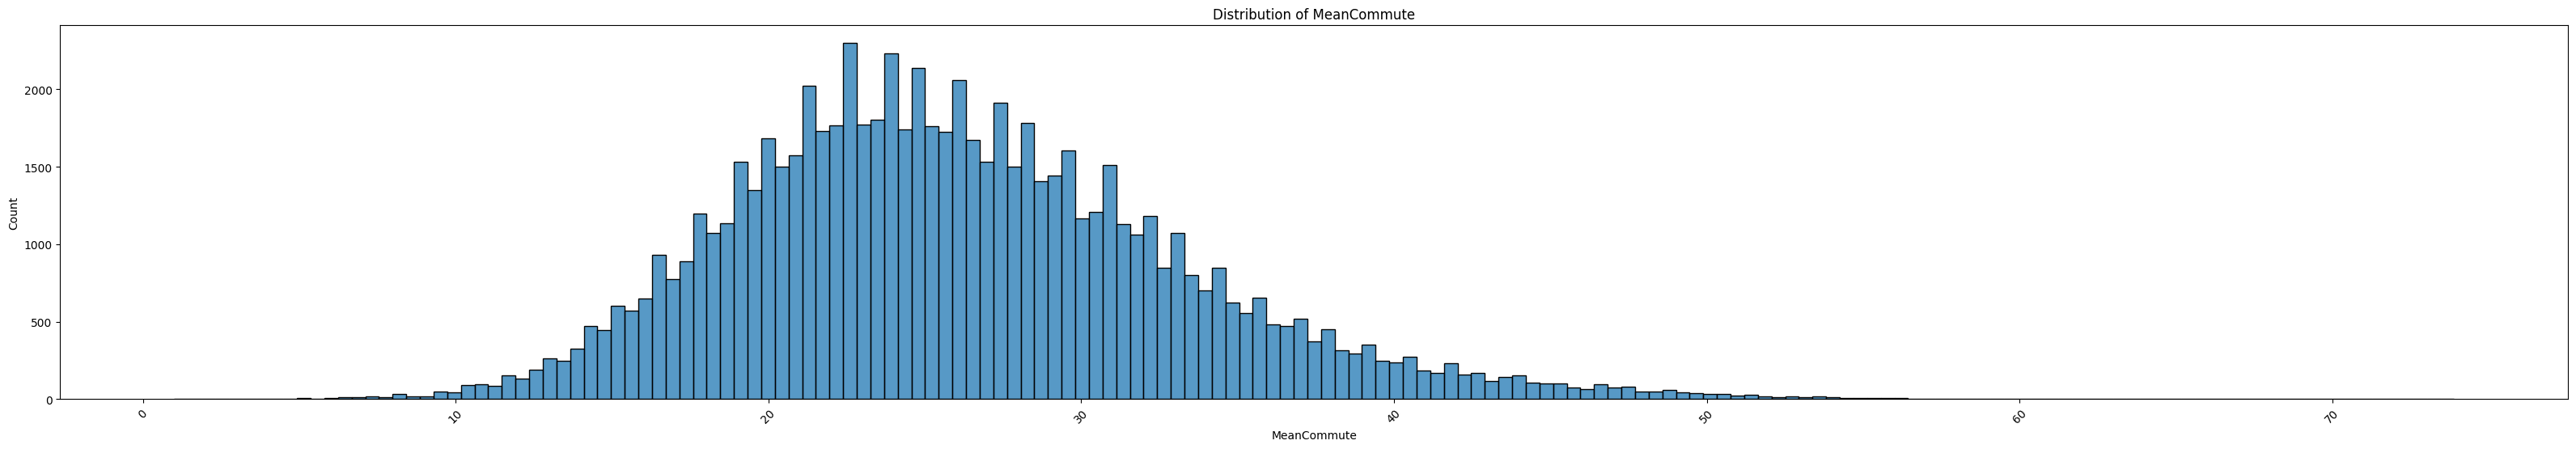

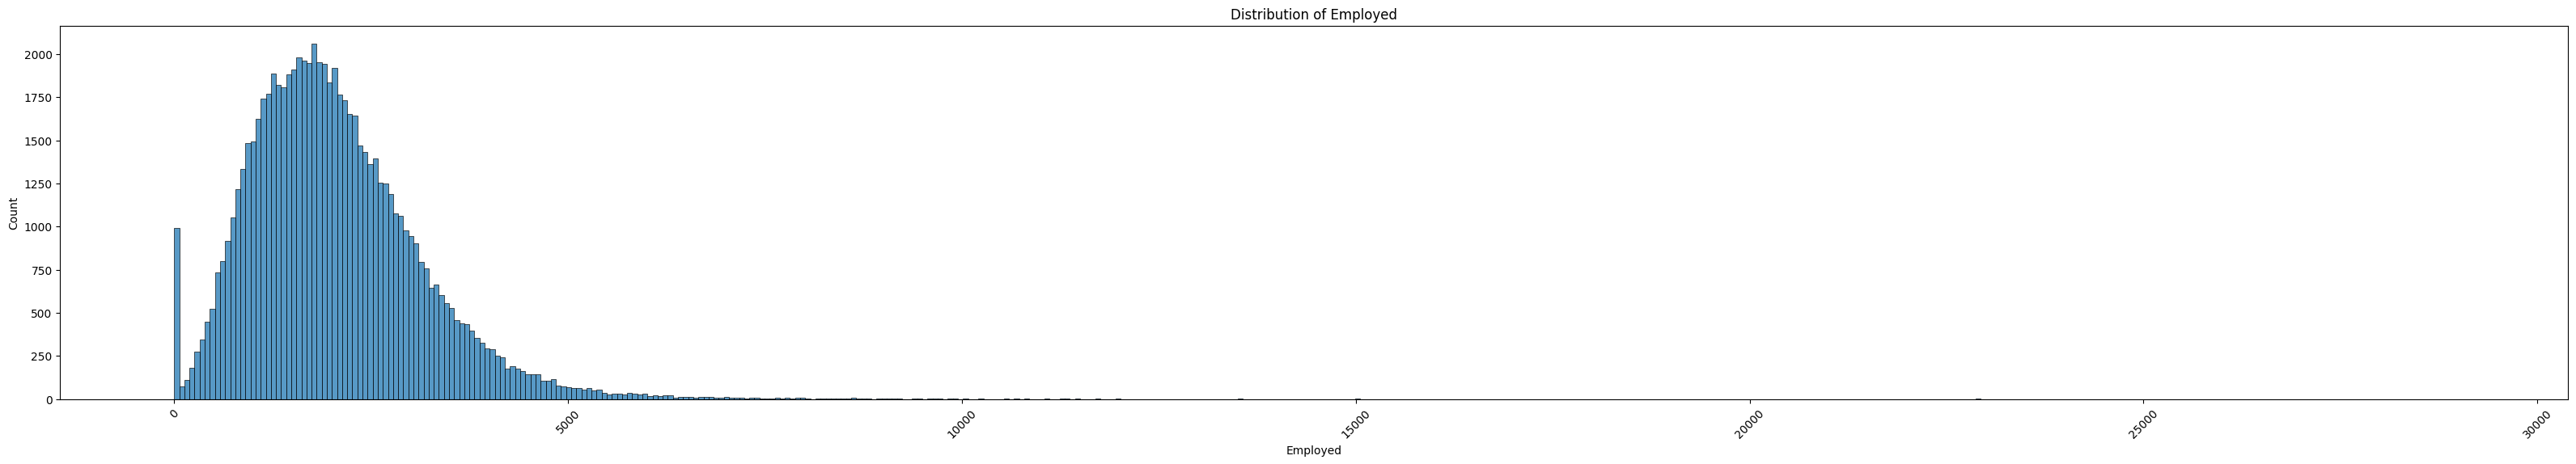

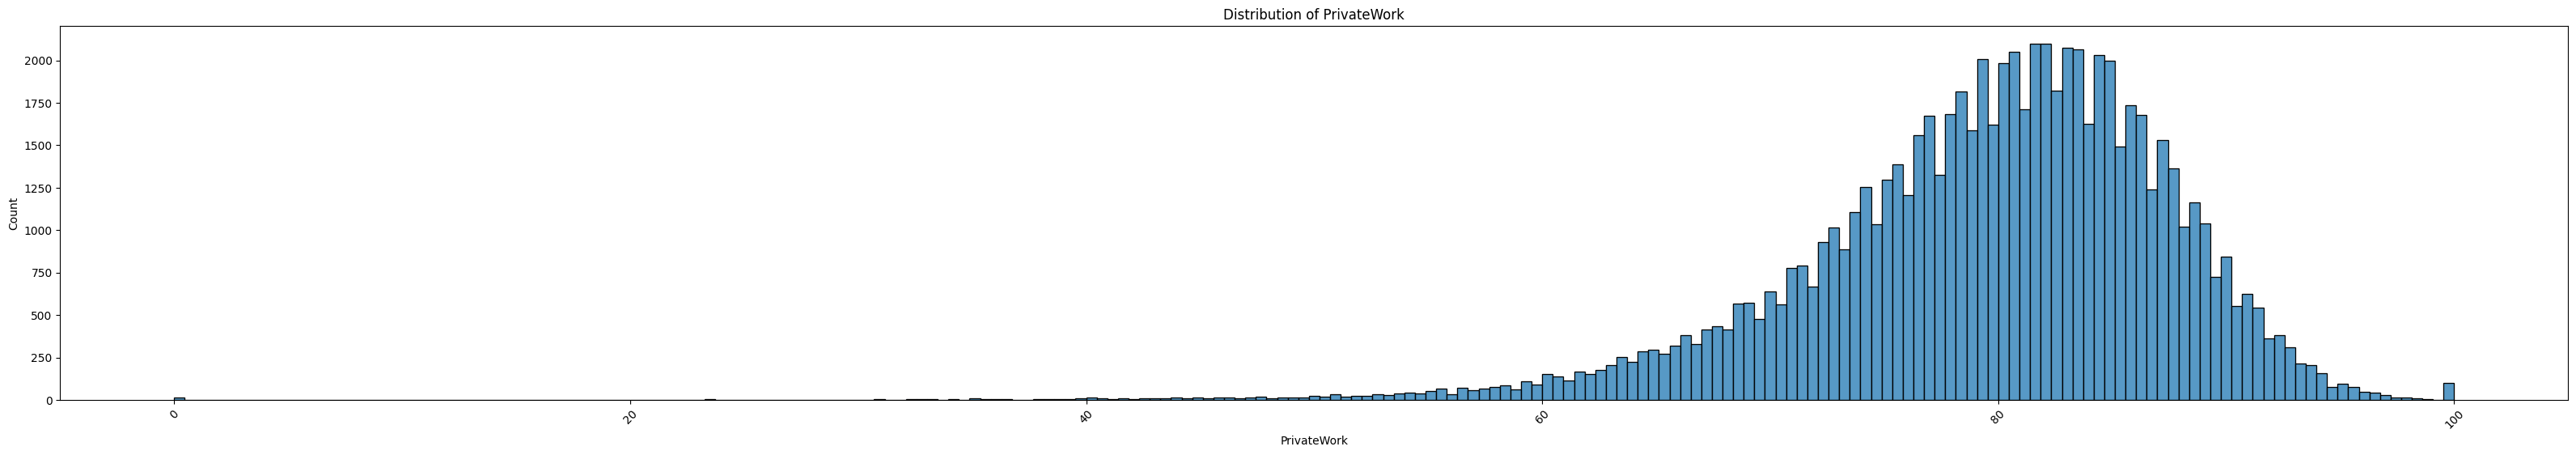

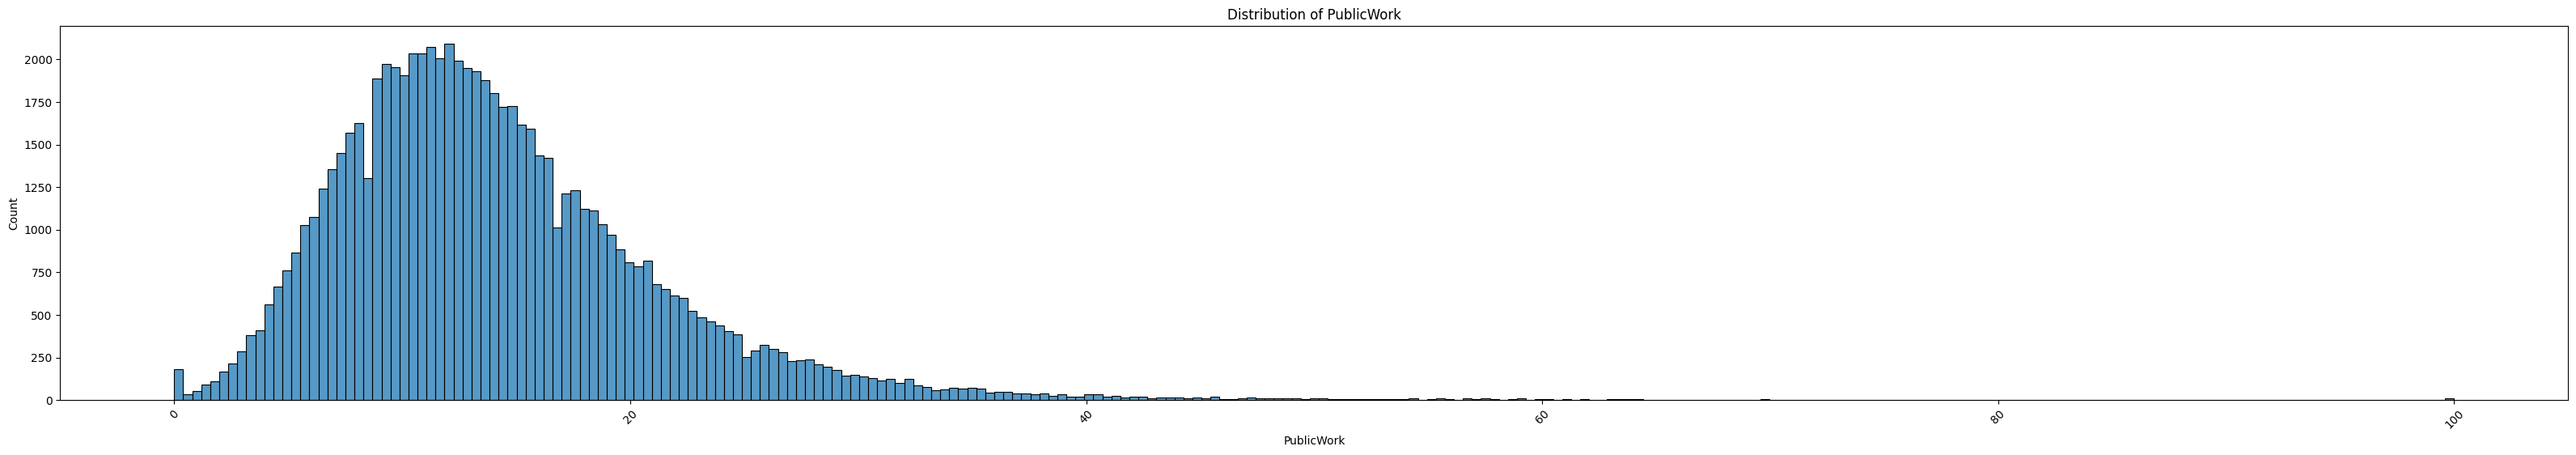

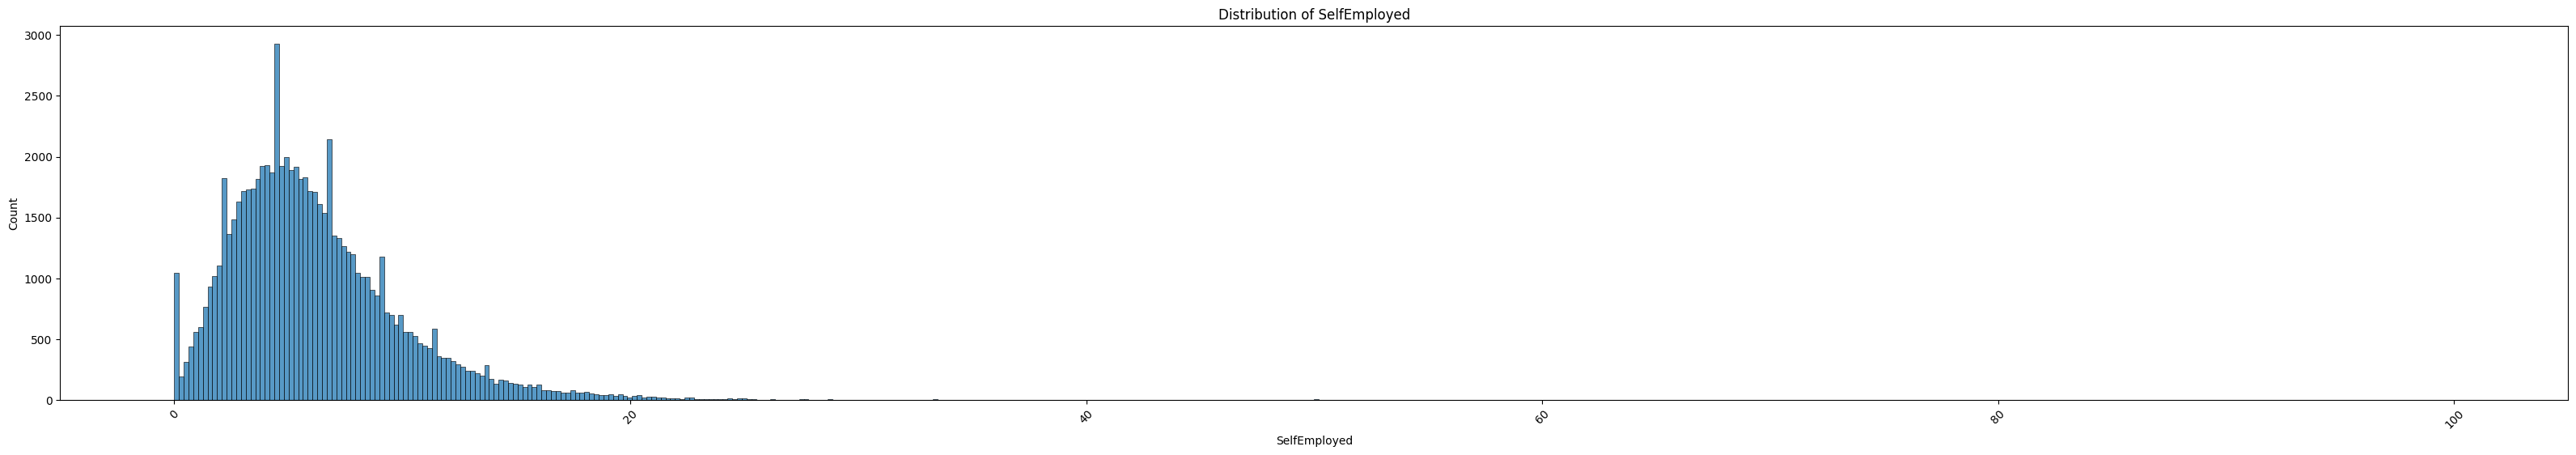

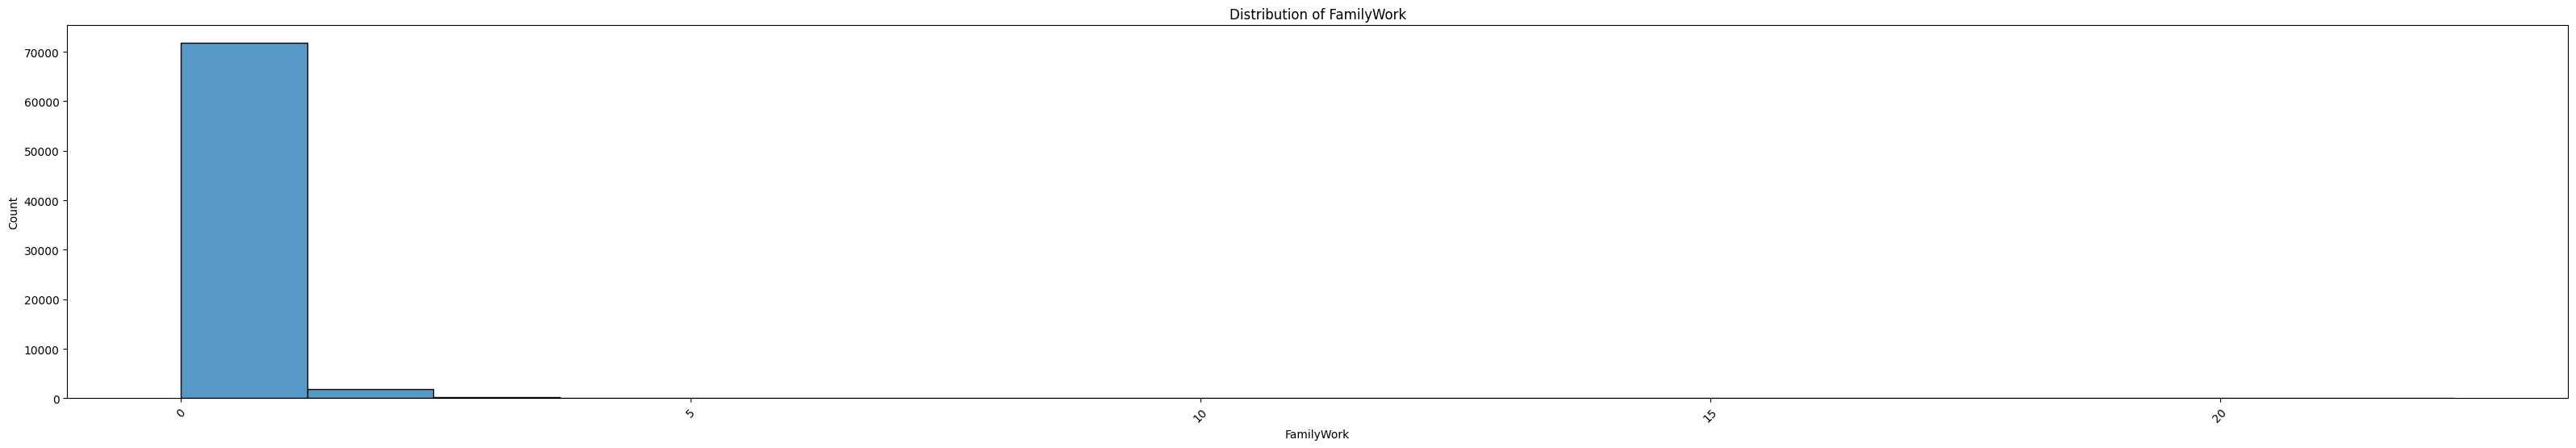

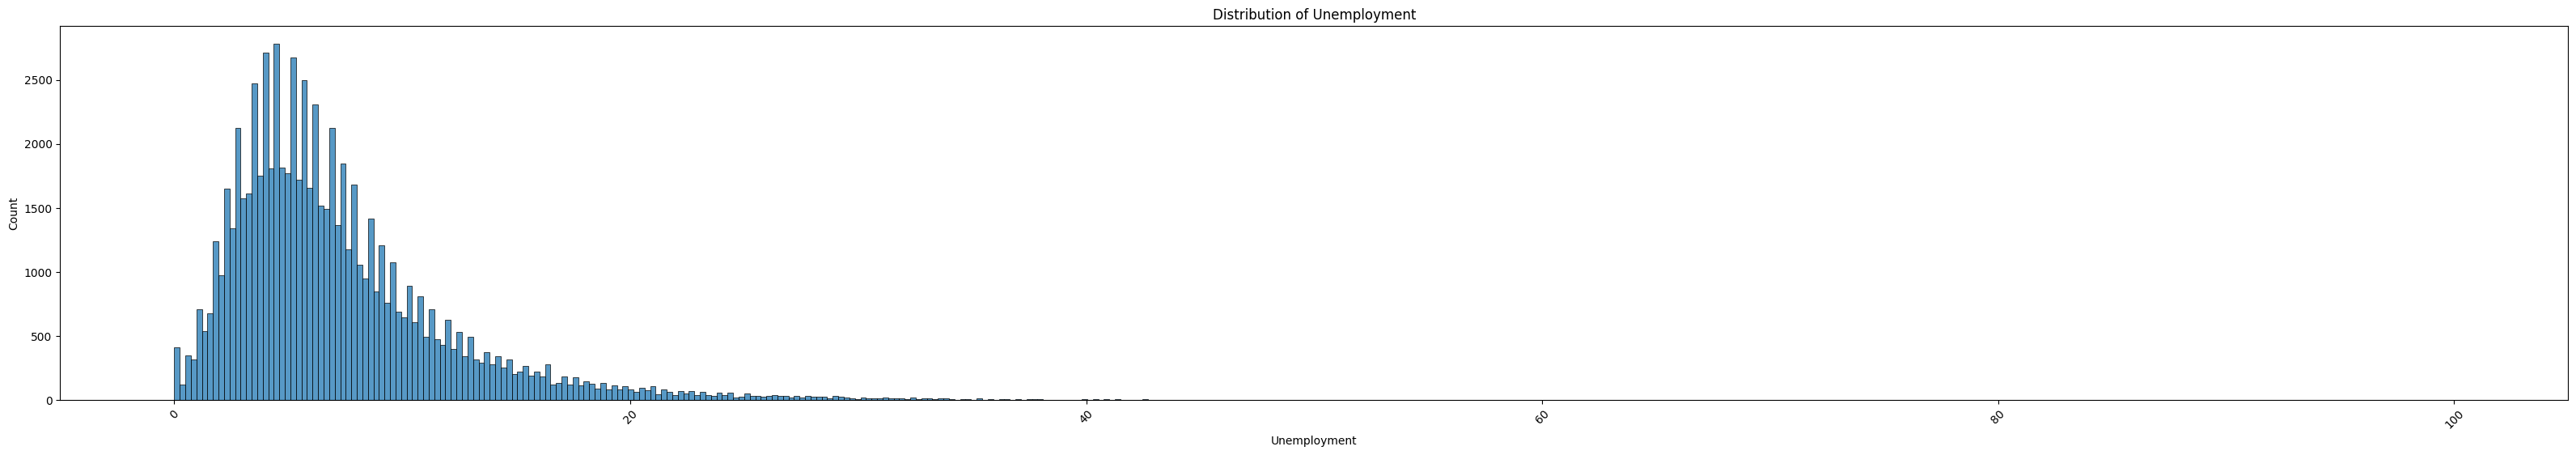

In [ ]:
for col in encoded_data_mean.columns:
    unique_values = encoded_data_mean[col].nunique()

    if unique_values == 0:
        continue
    fig_width = min(40, max(10, unique_values / 2))
    plt.figure(figsize=(fig_width, 6))

    sns.histplot(encoded_data_mean[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

###Data Distribution after dropping the null values

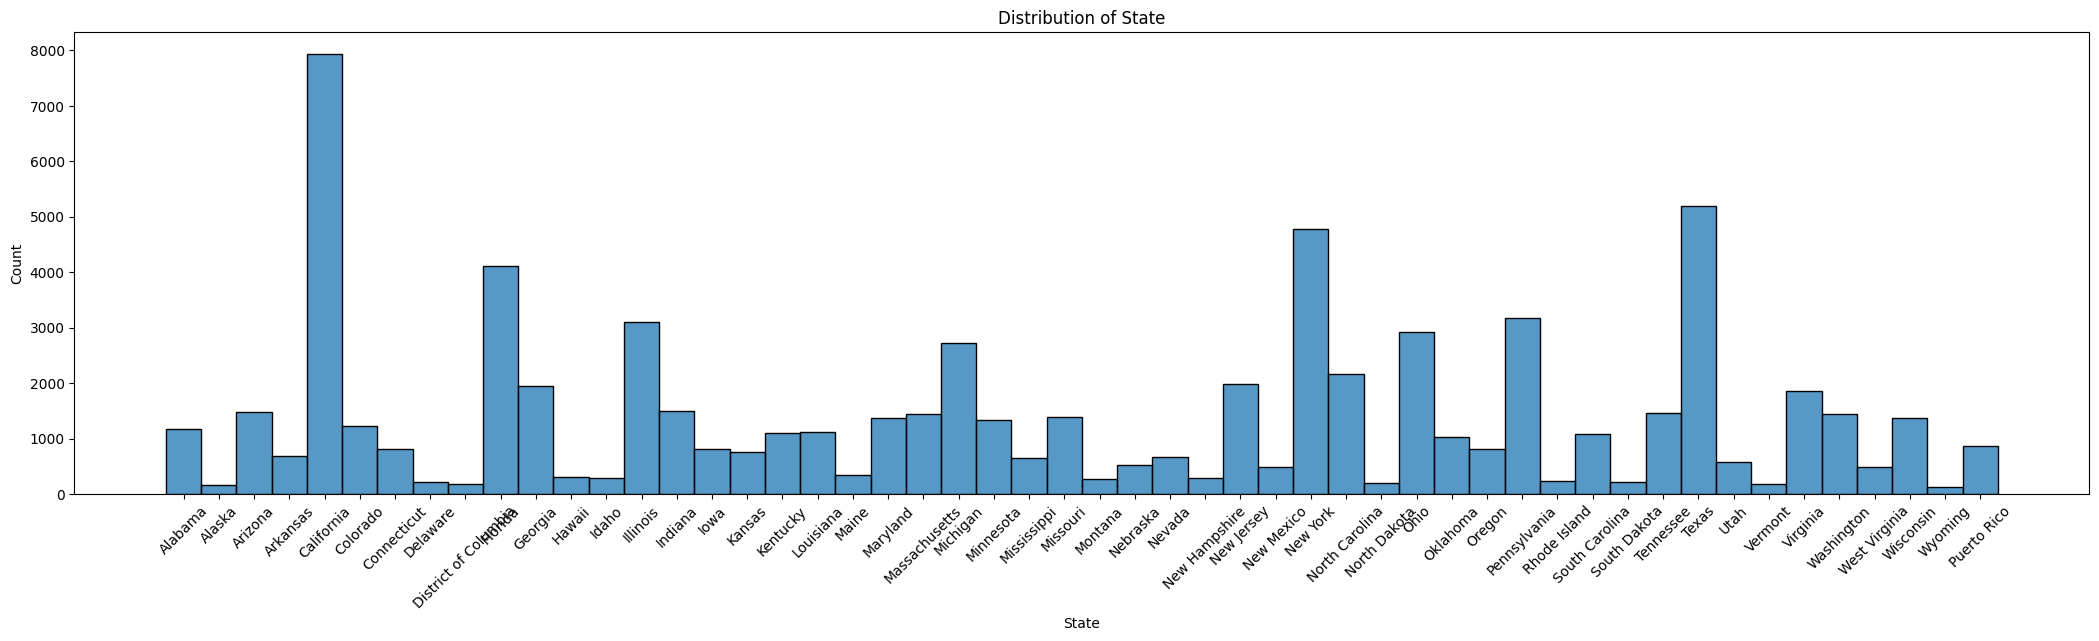

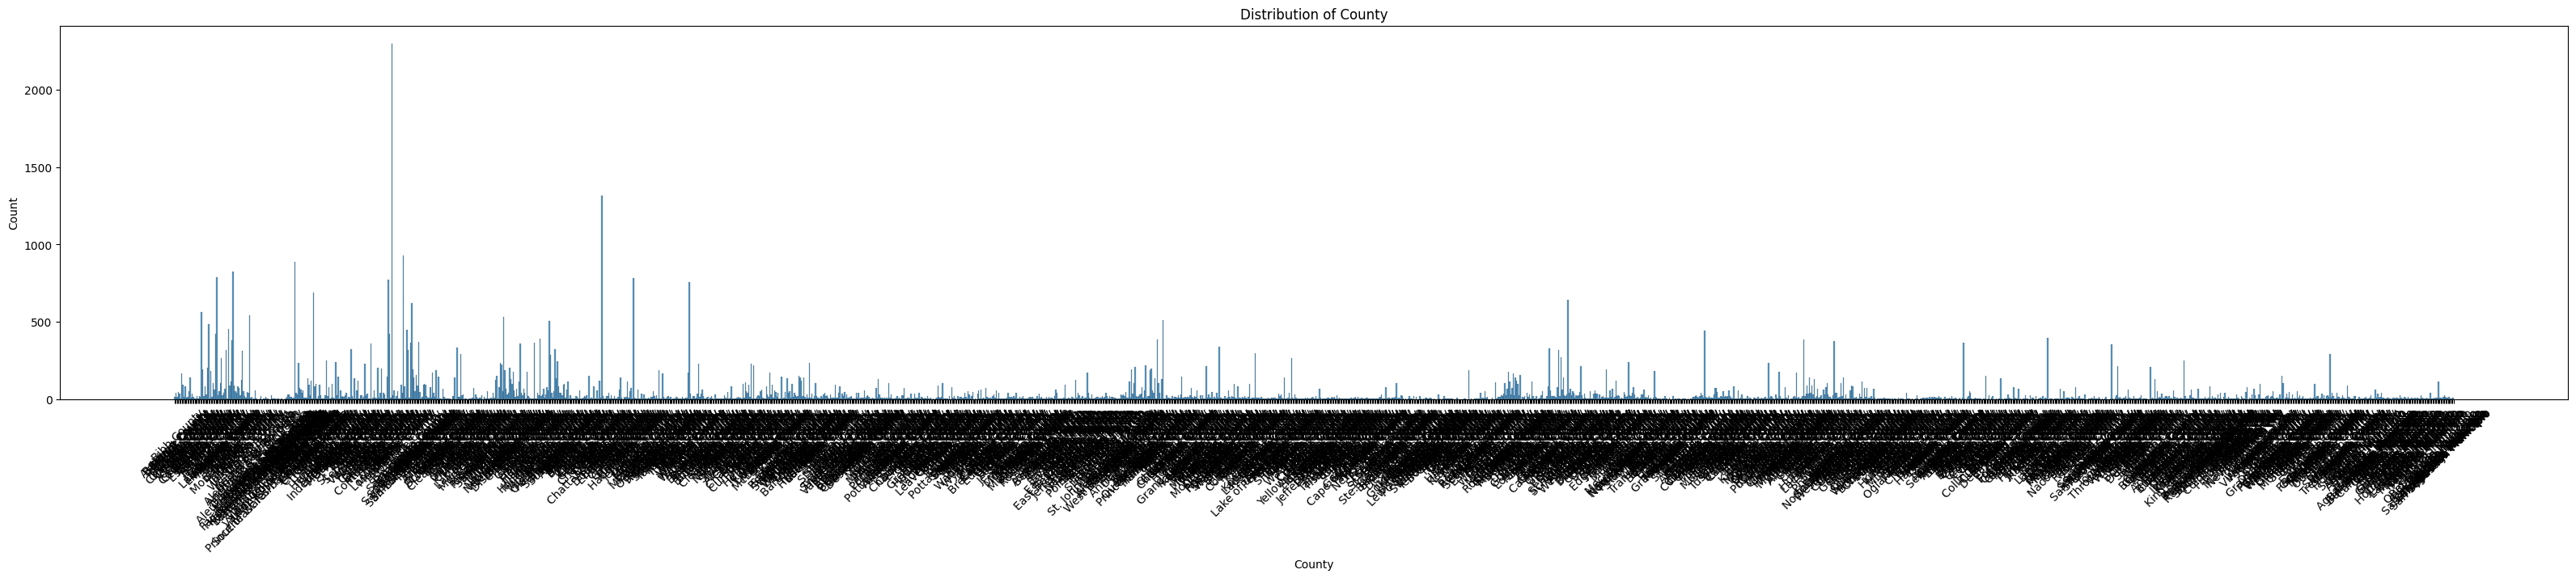

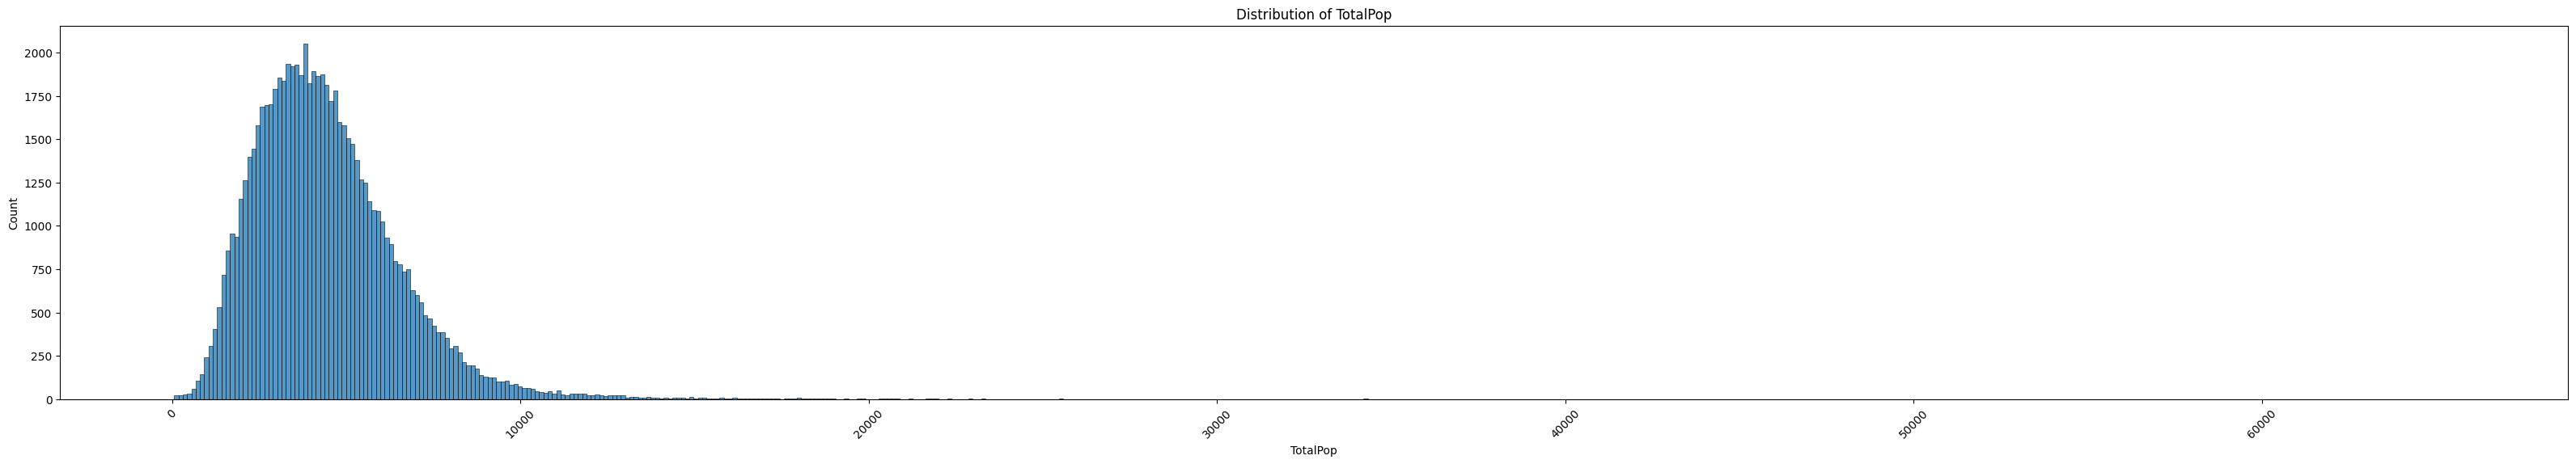

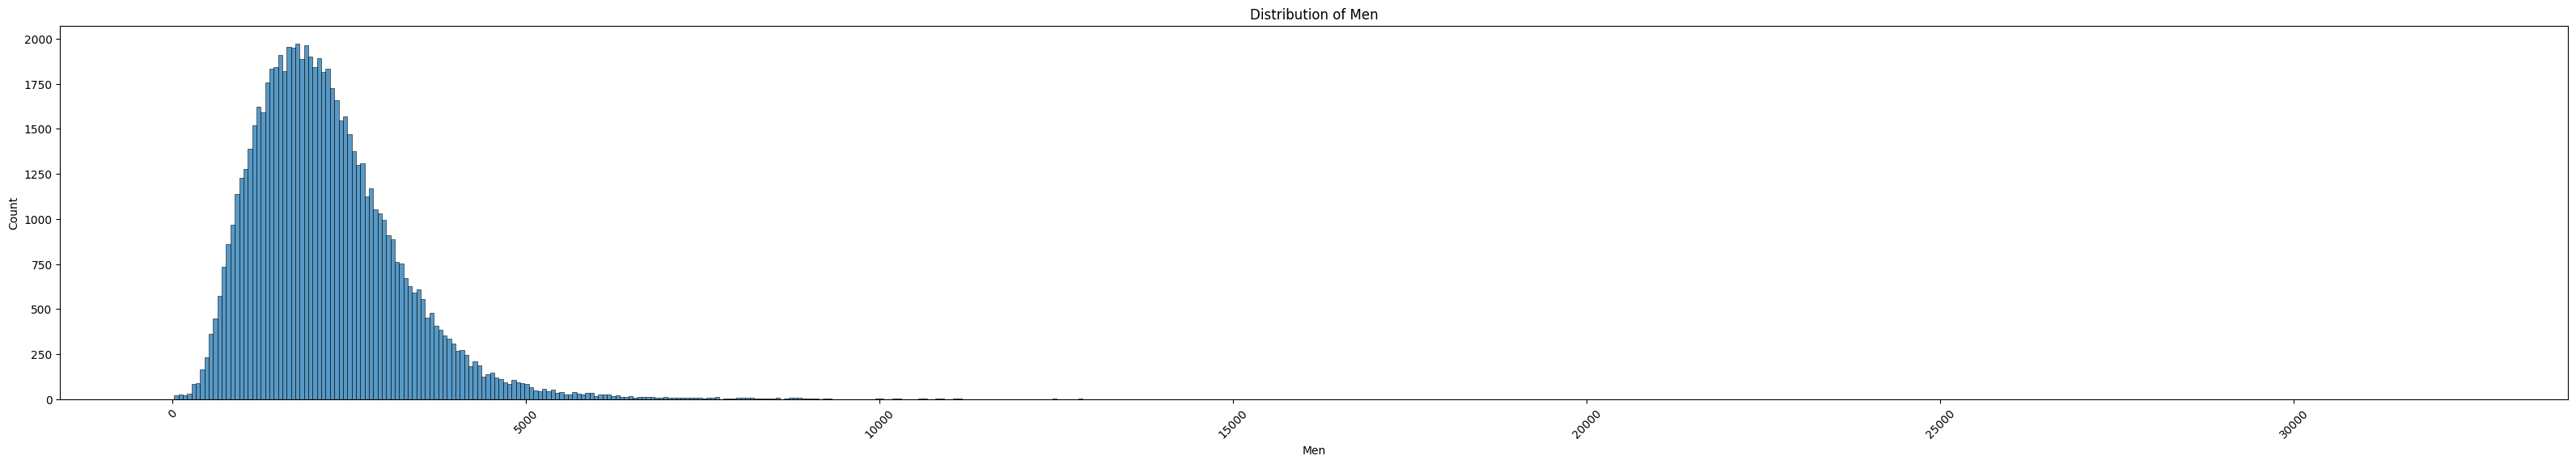

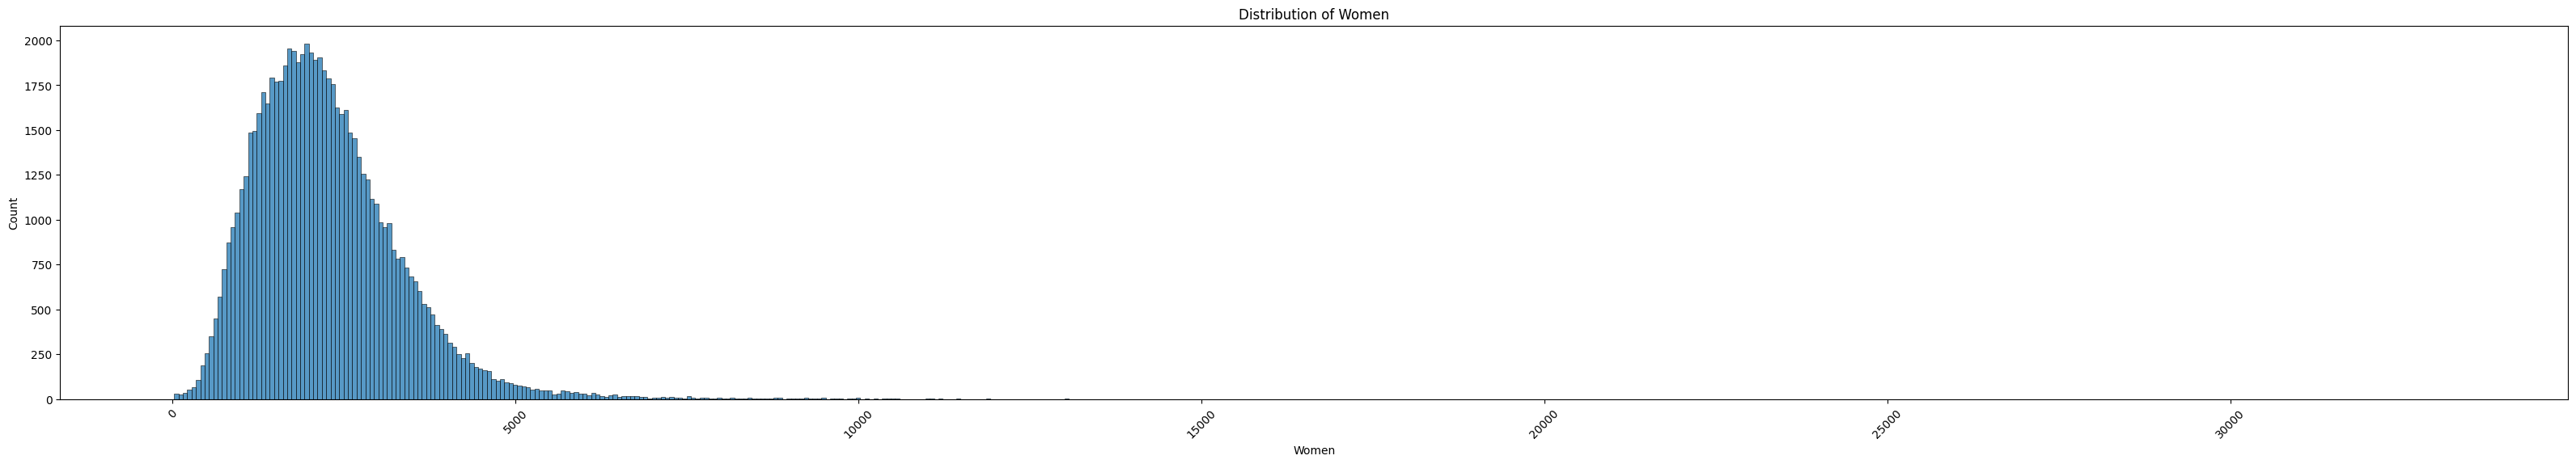

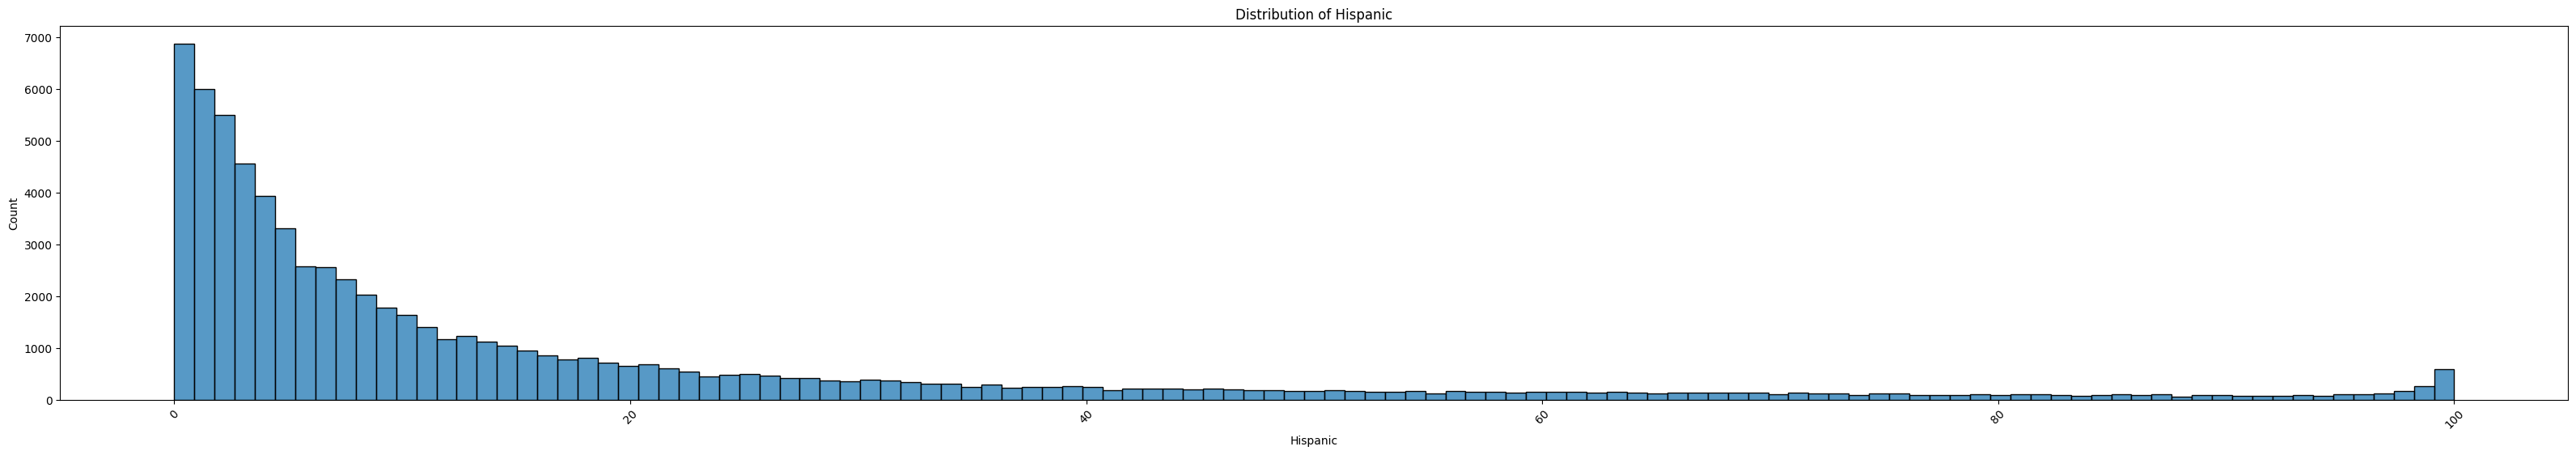

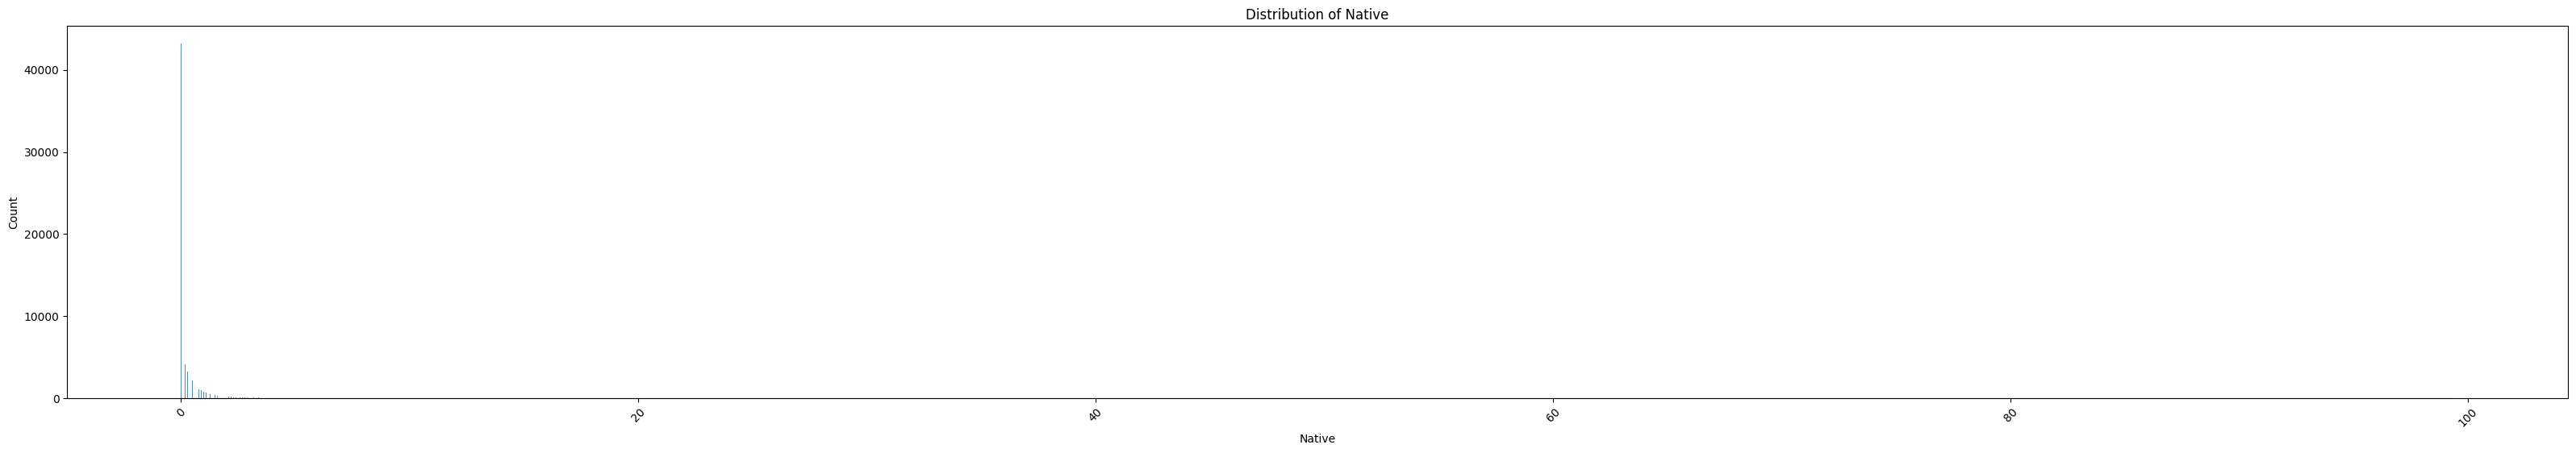

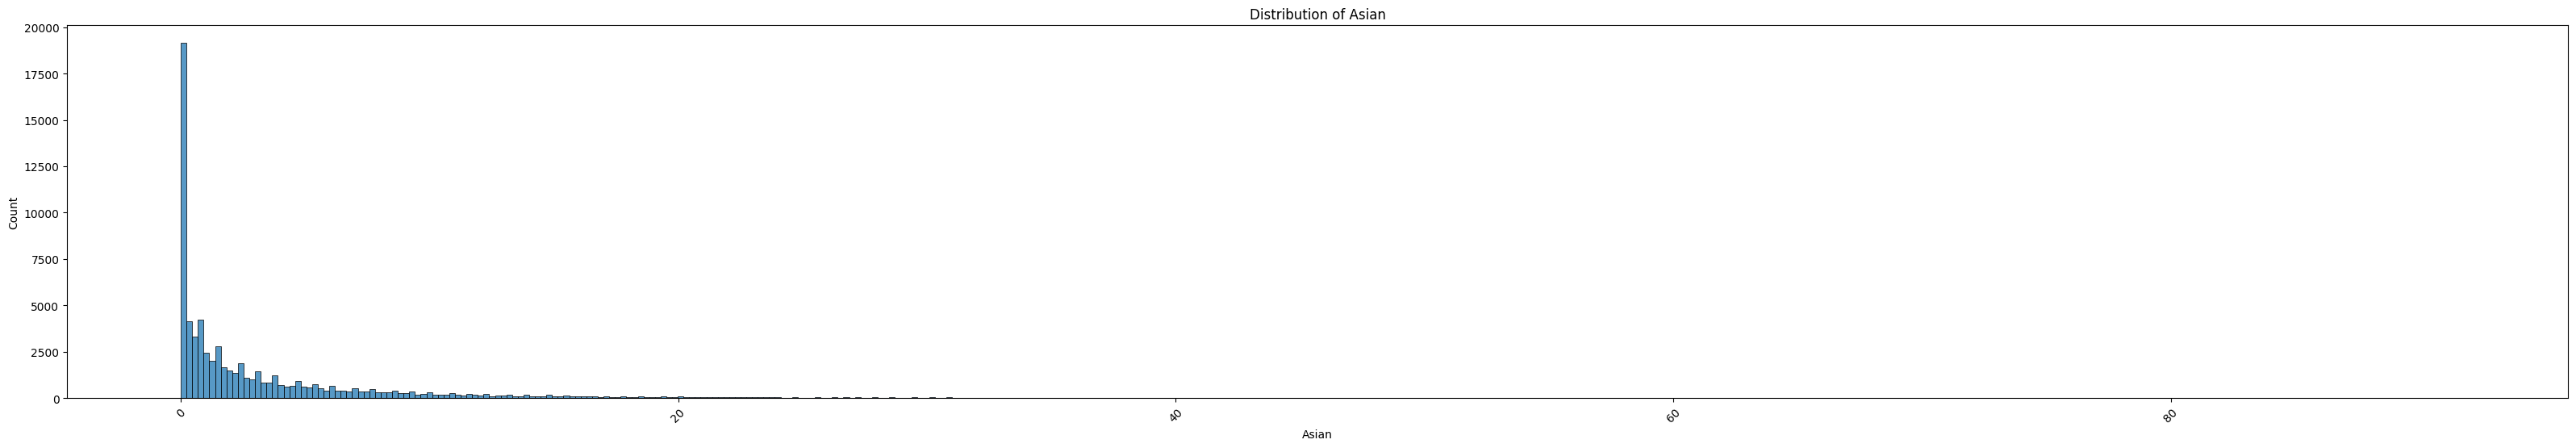

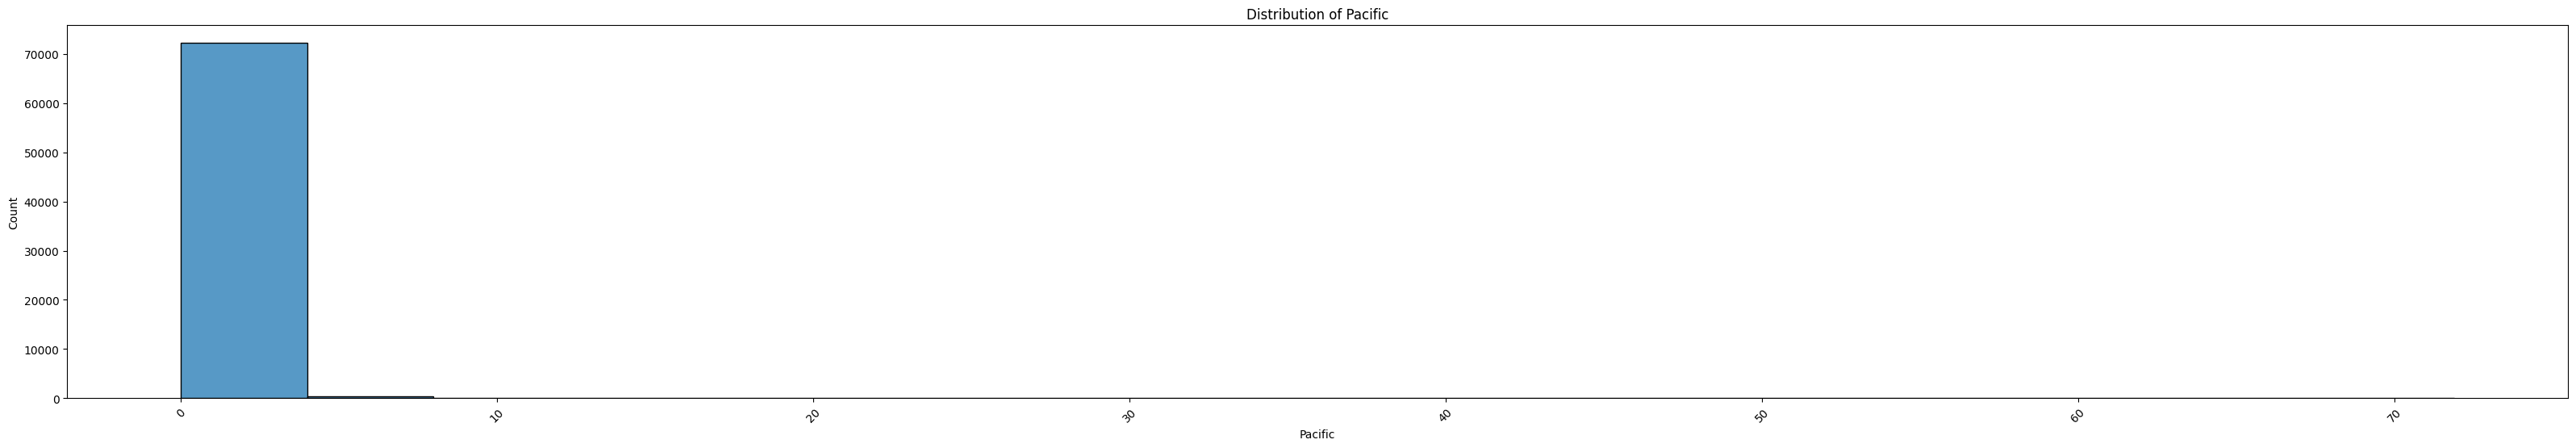

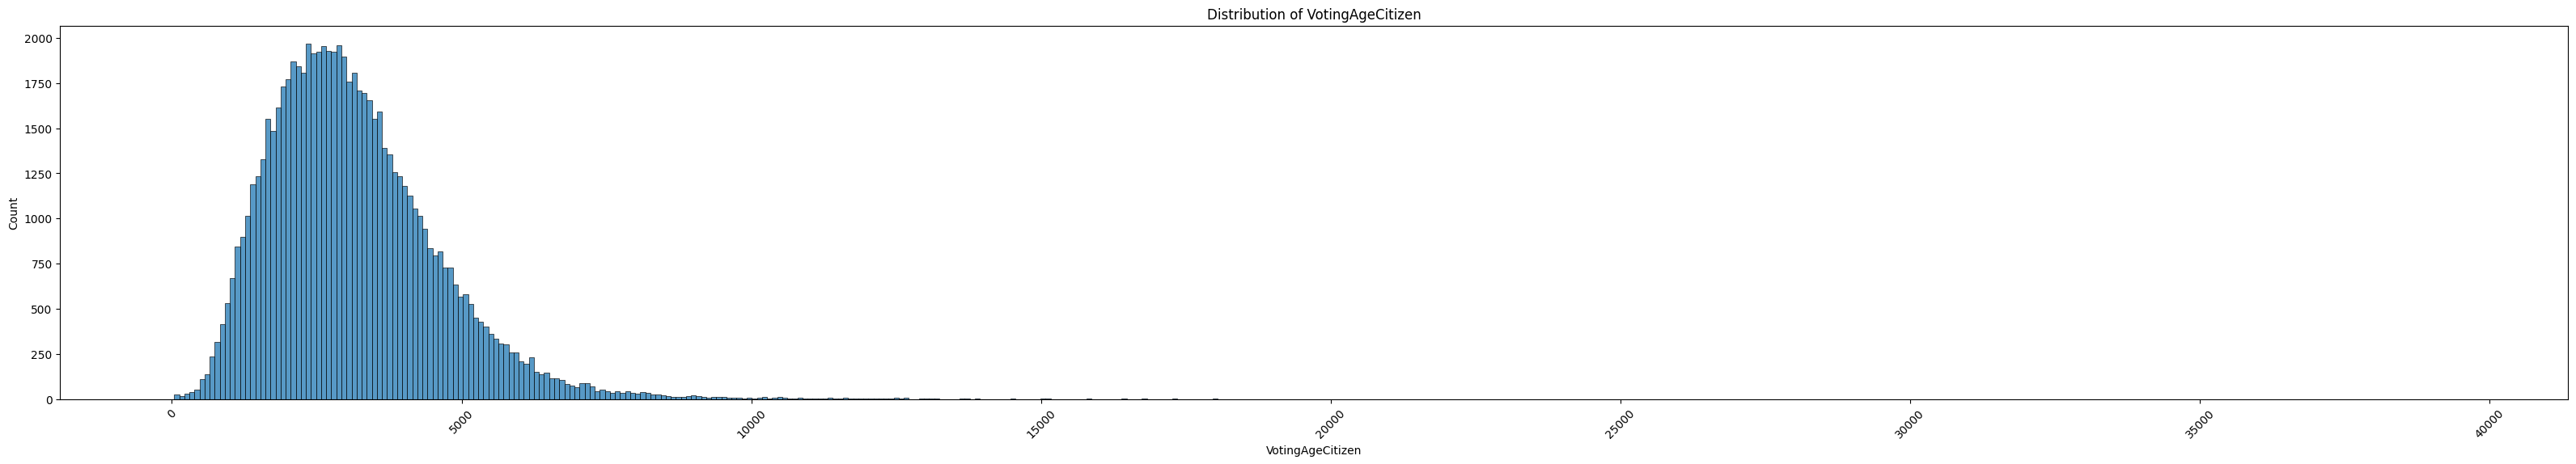

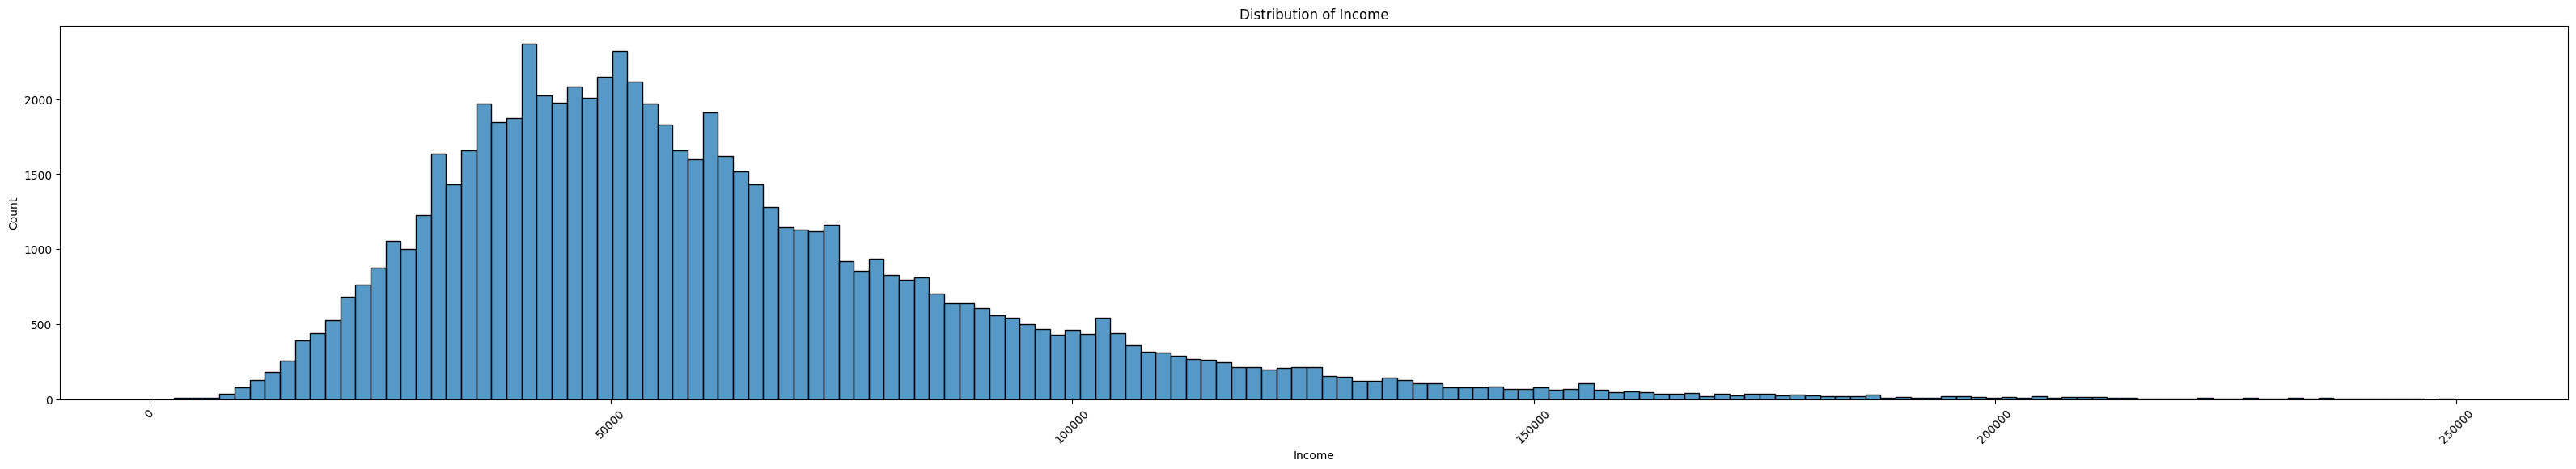

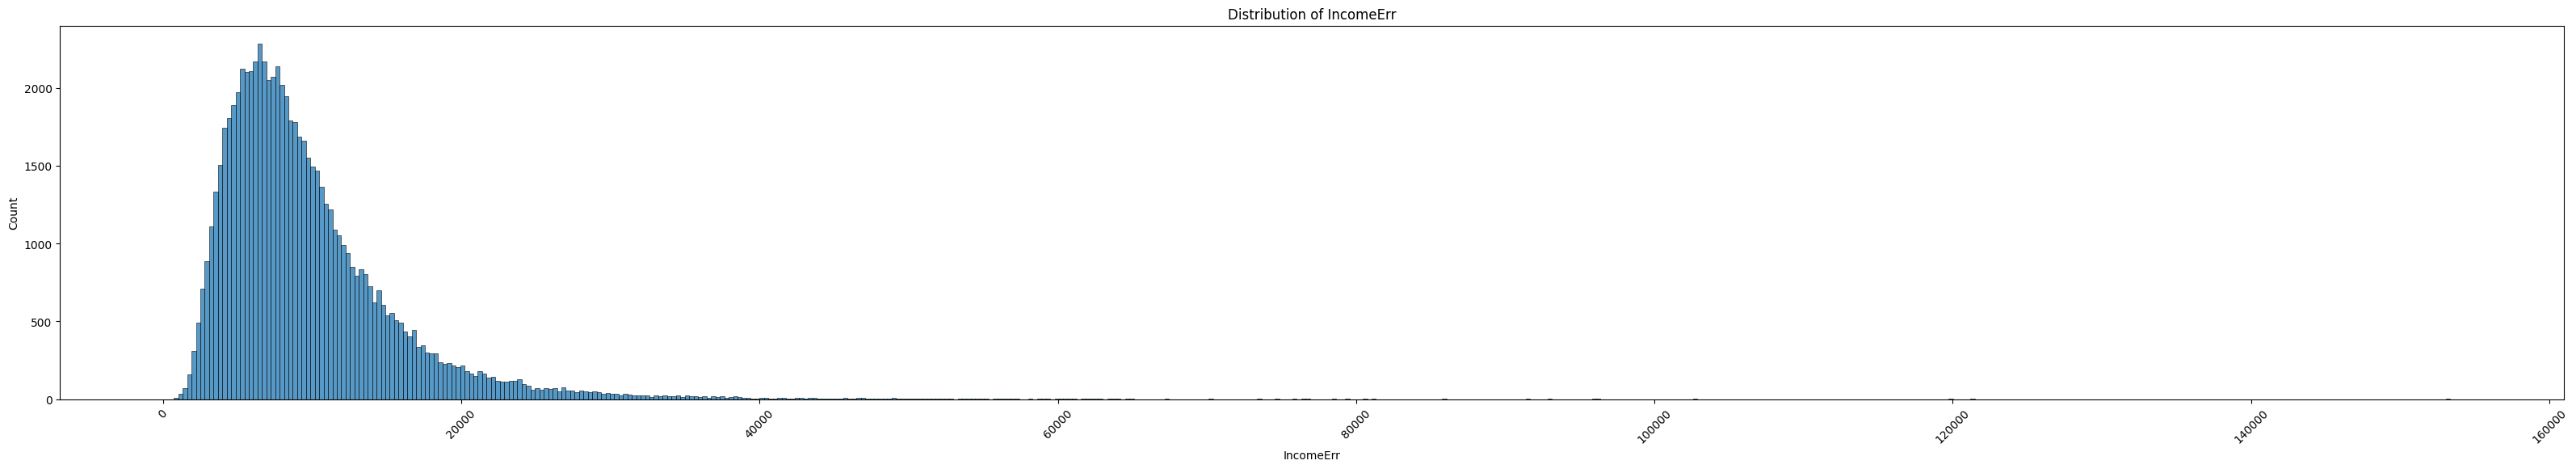

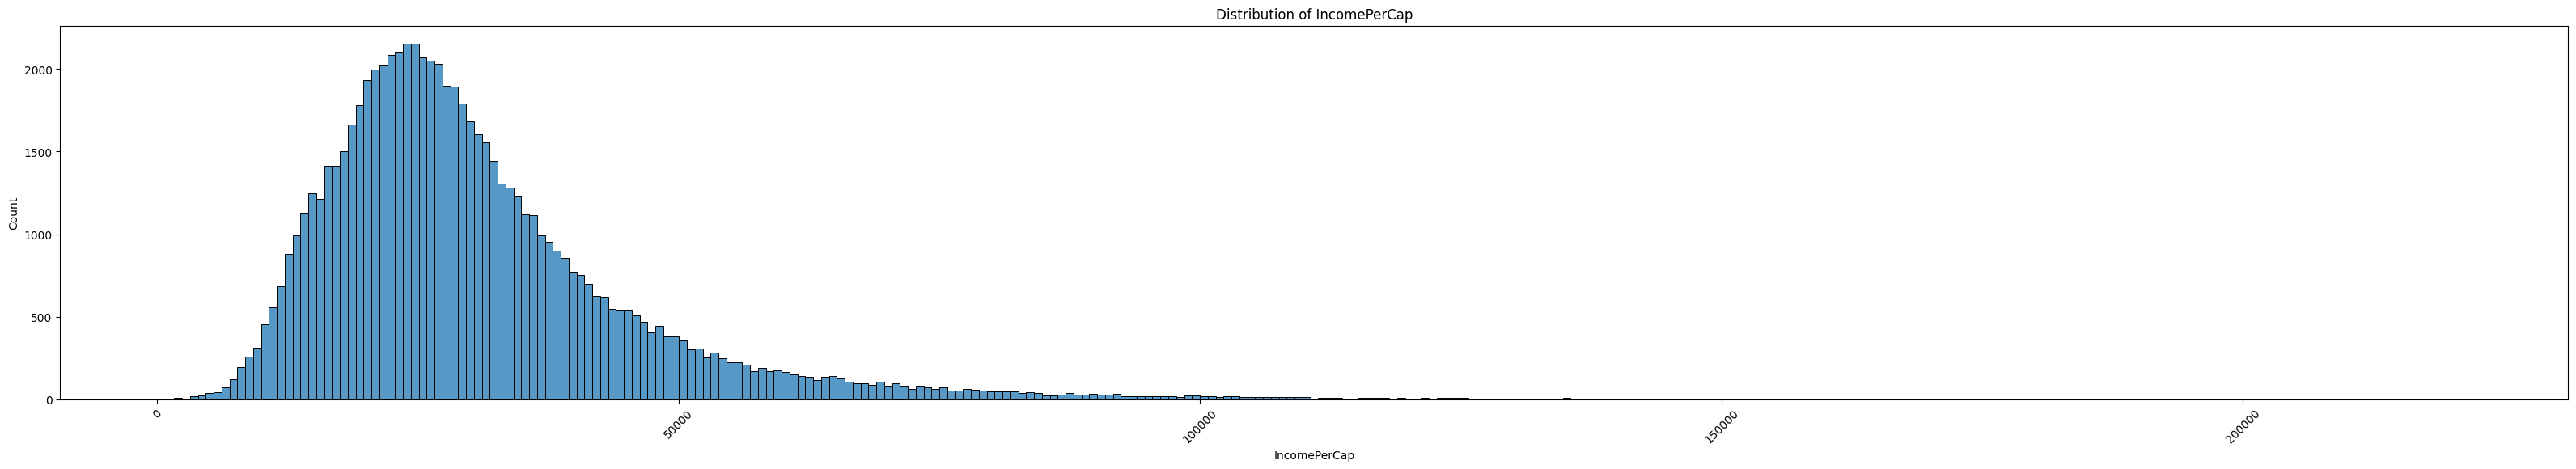

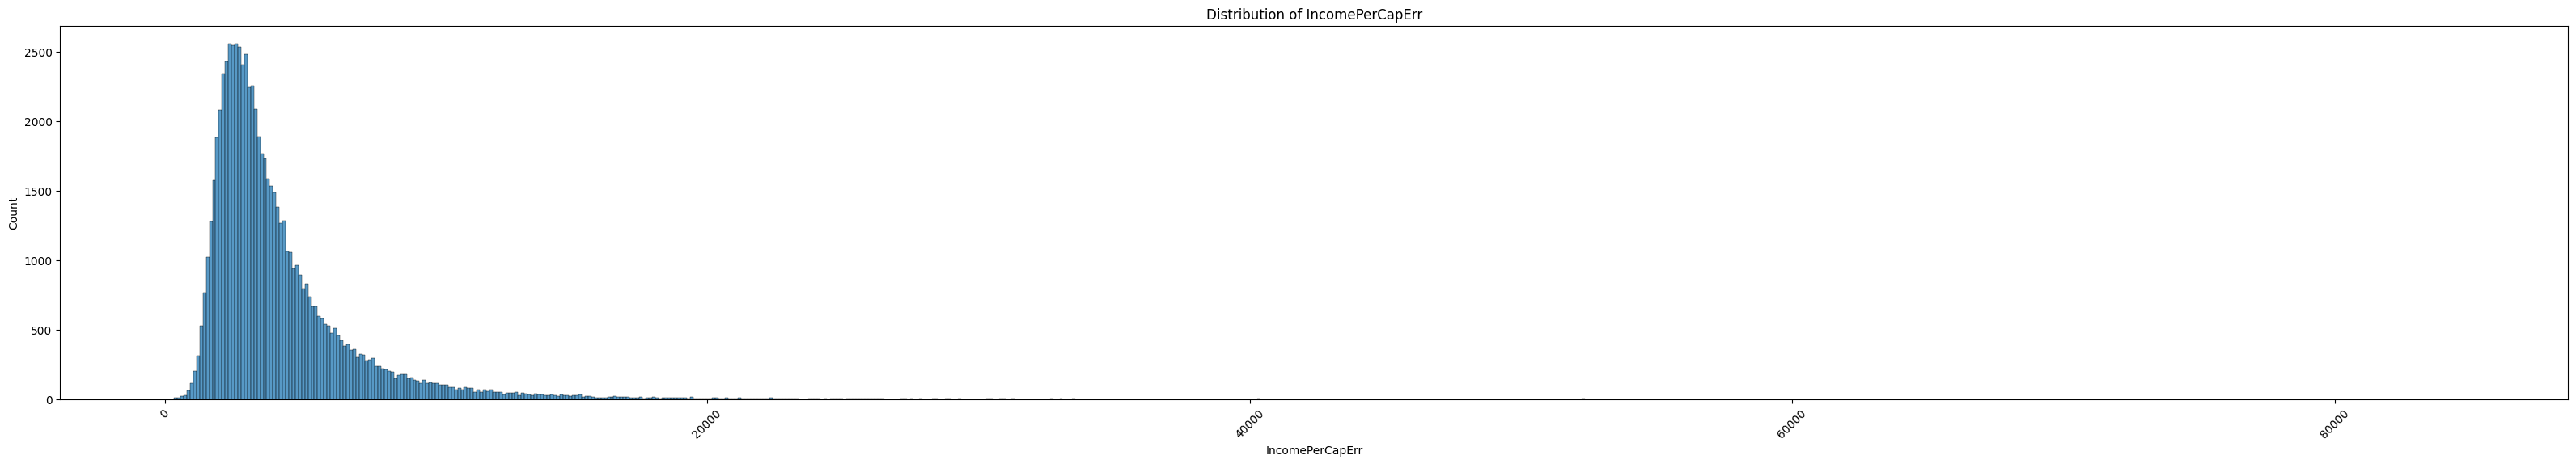

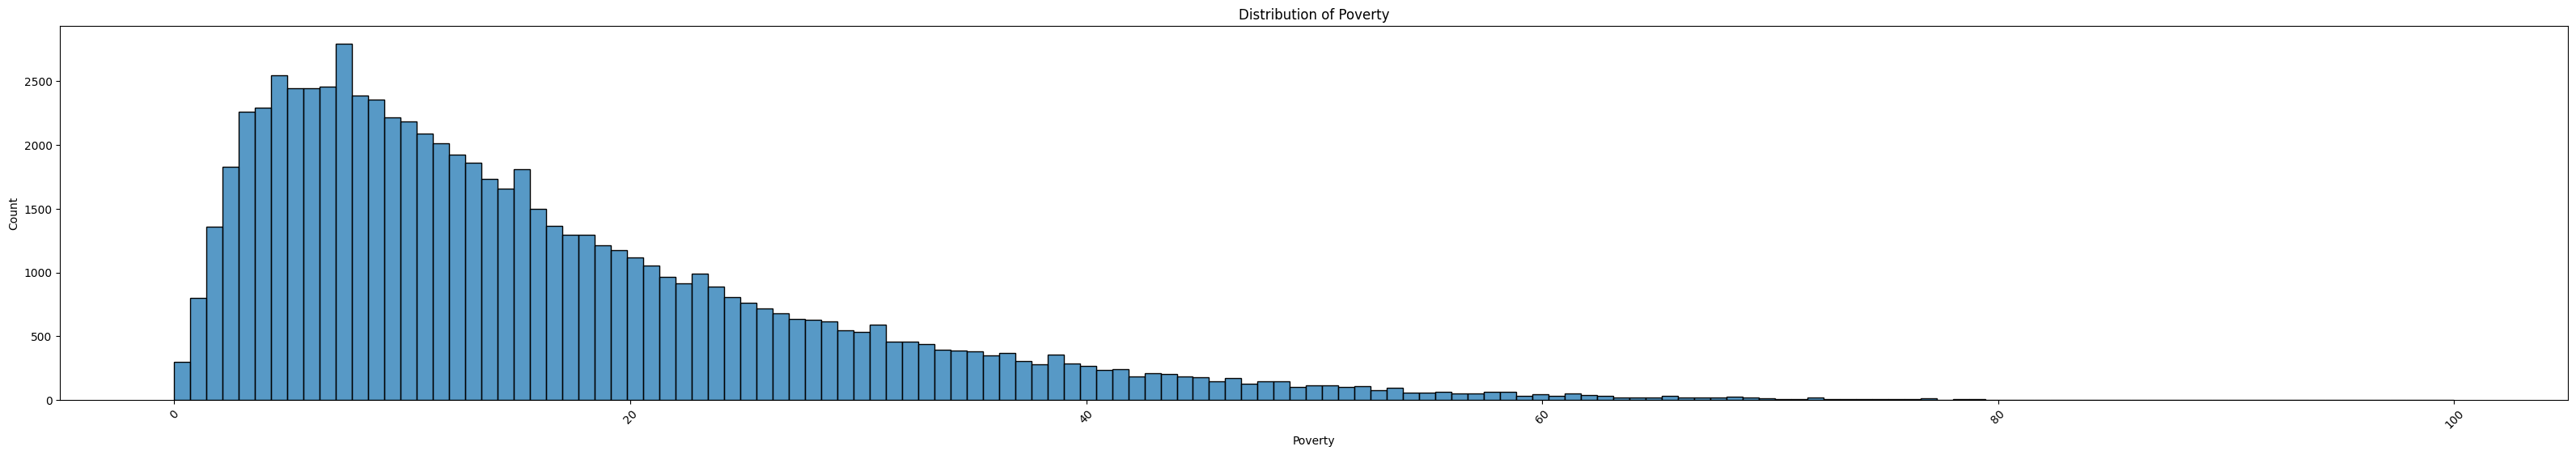

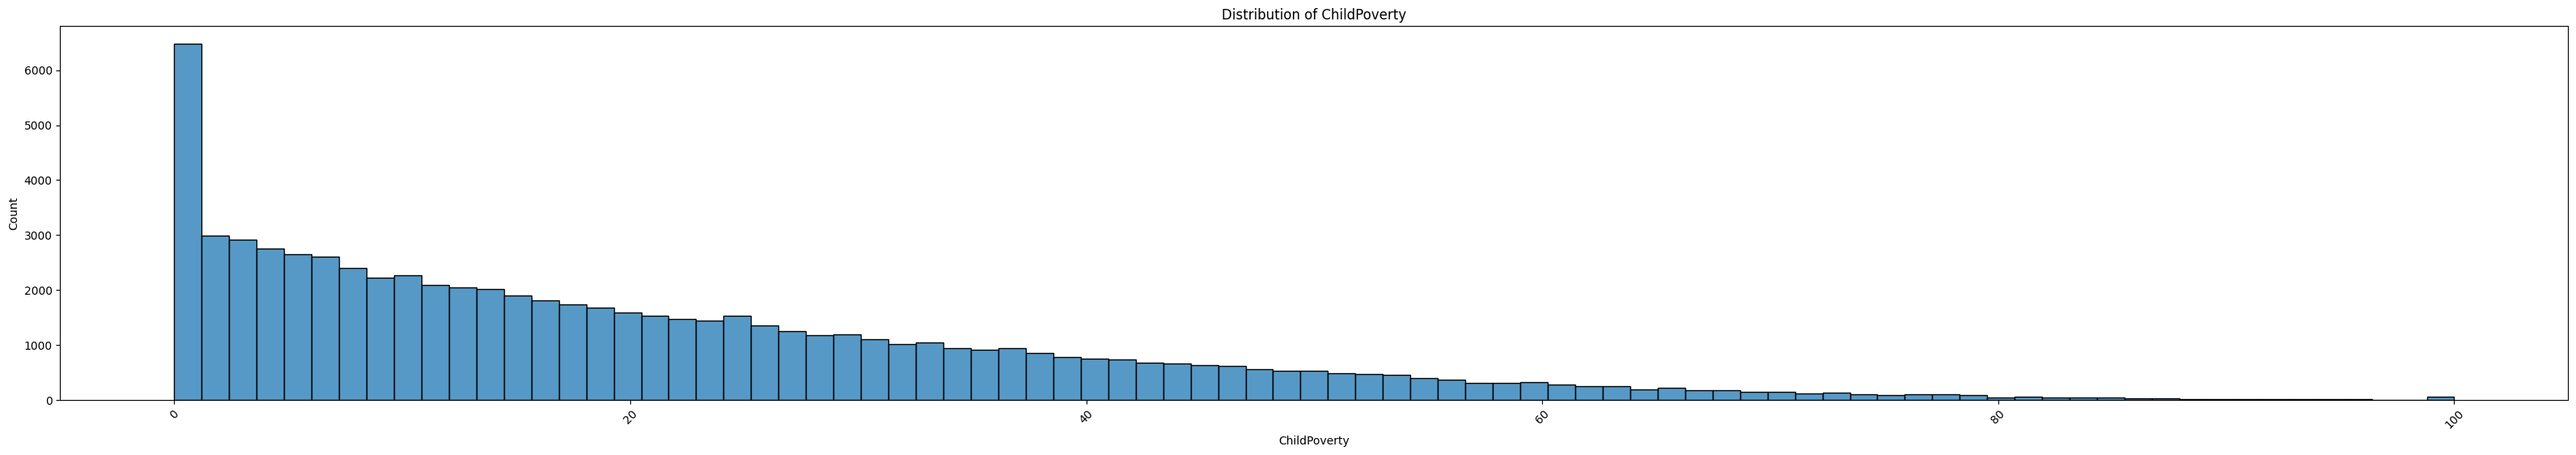

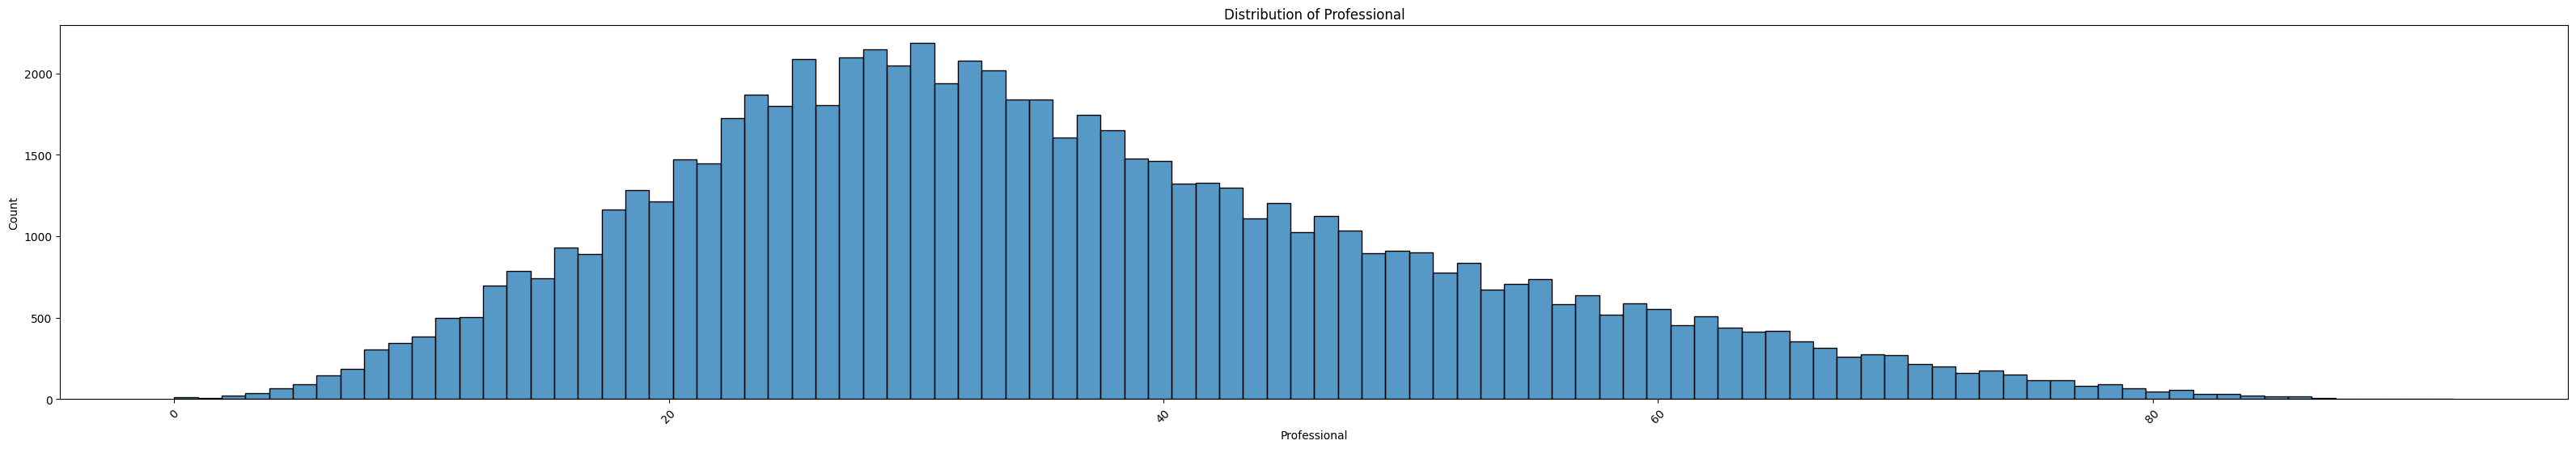

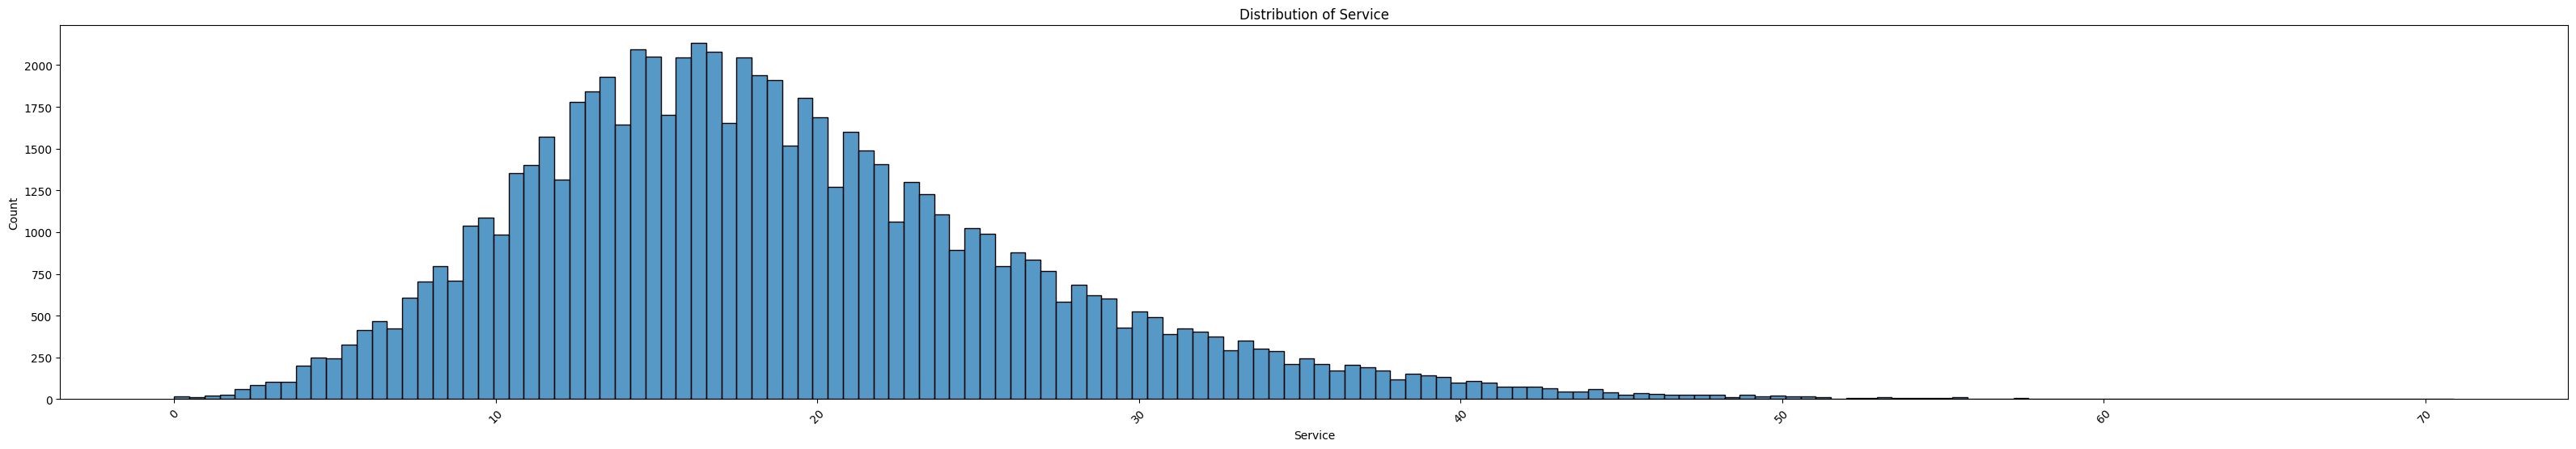

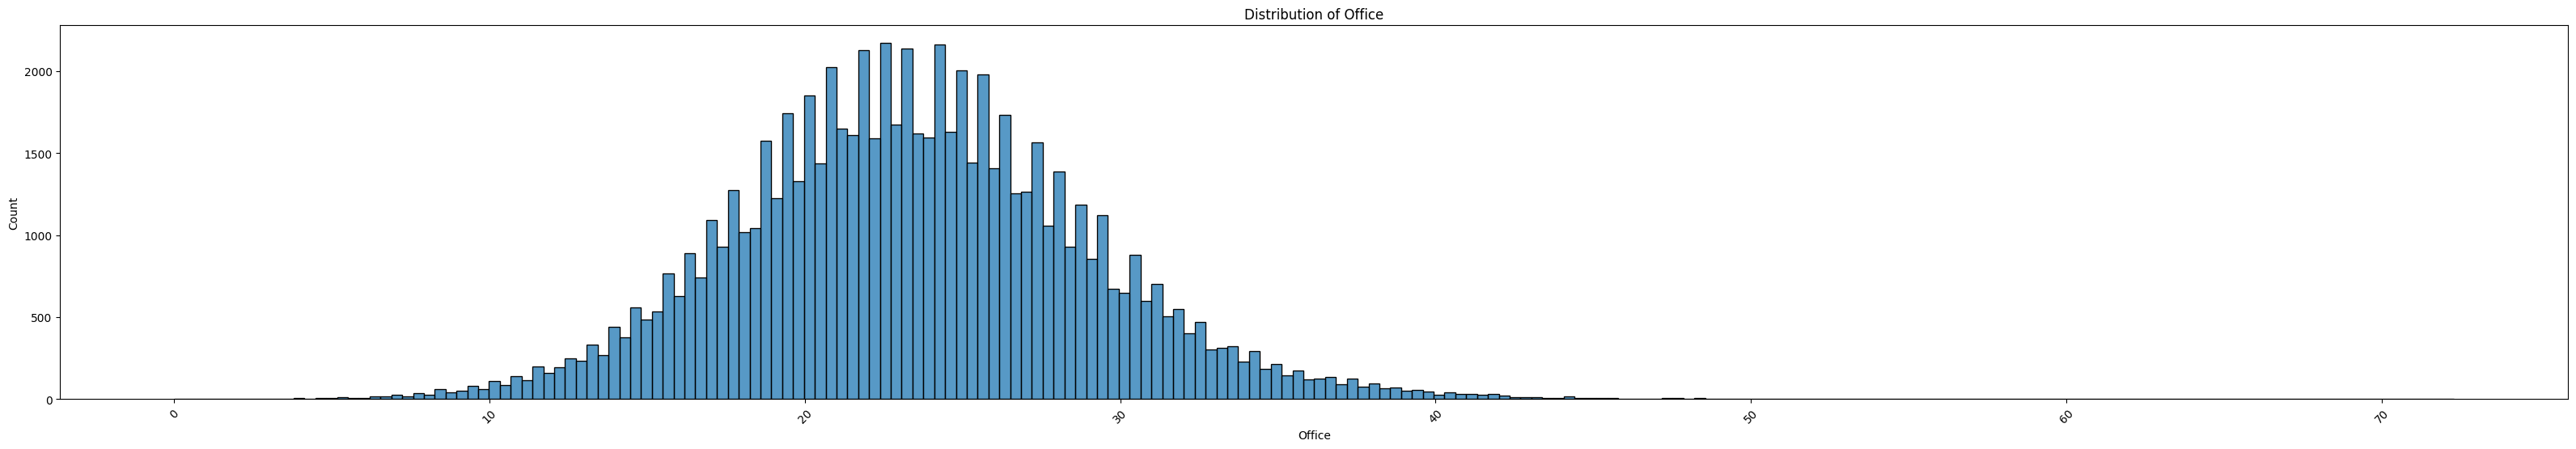

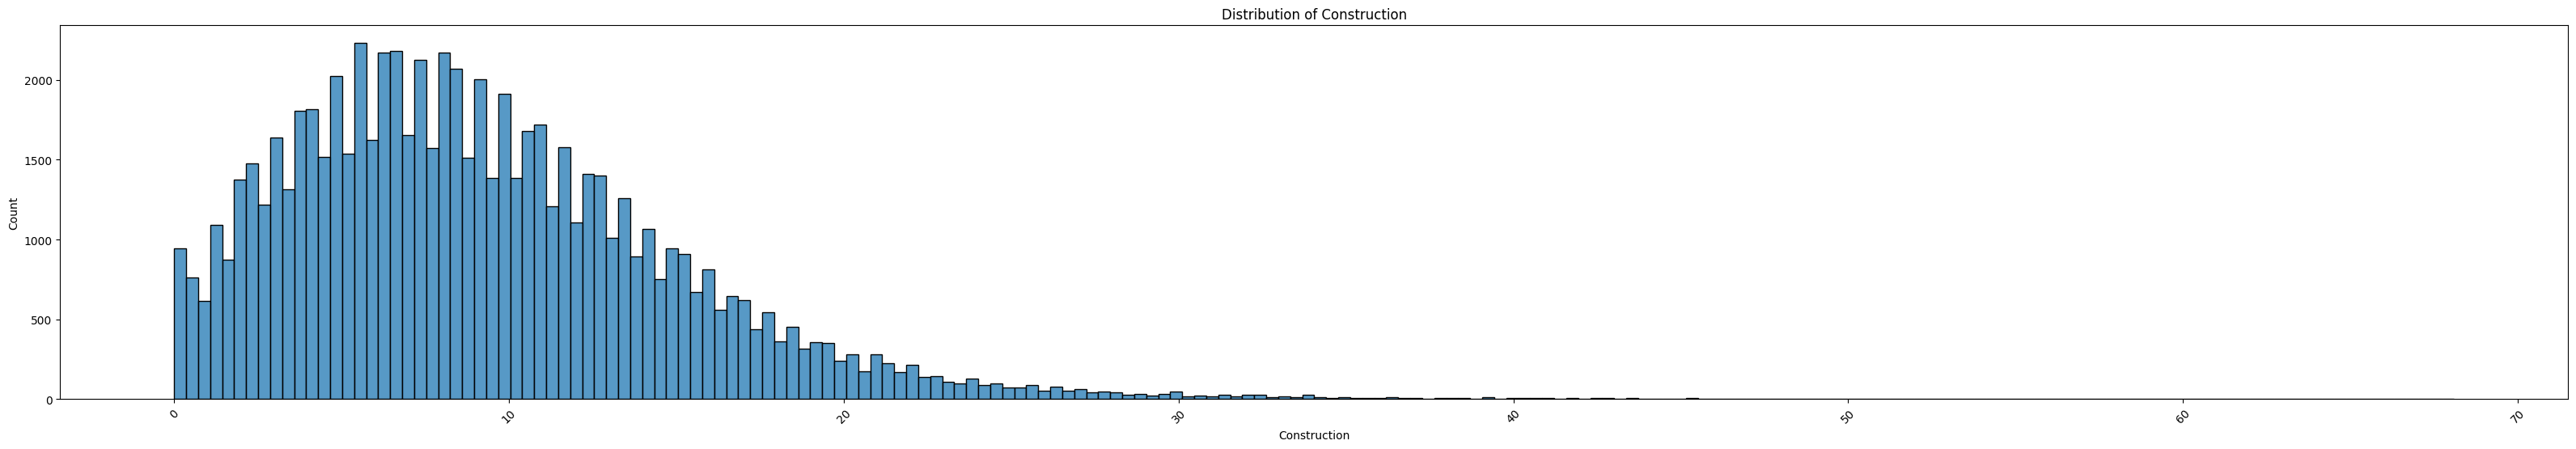

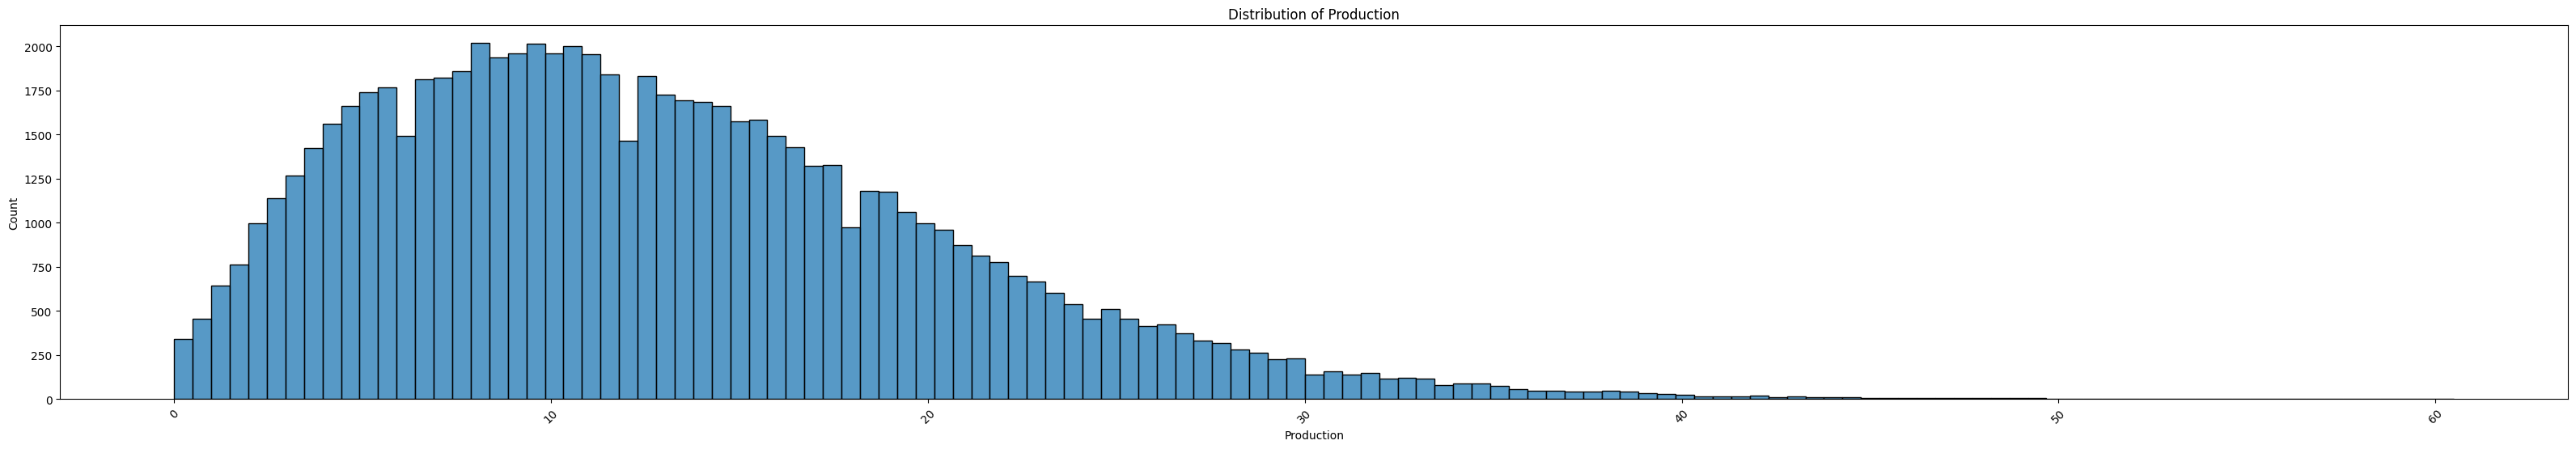

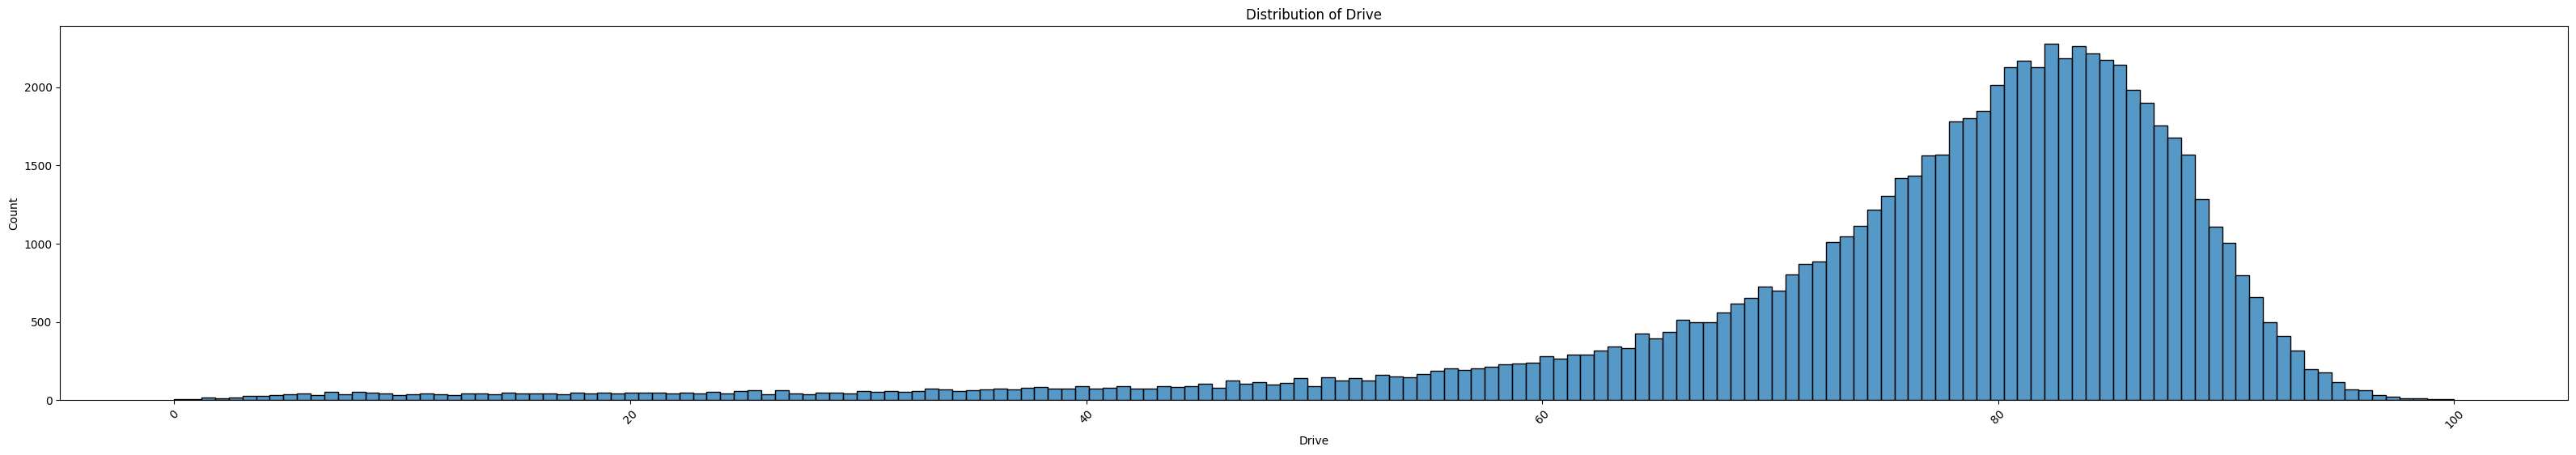

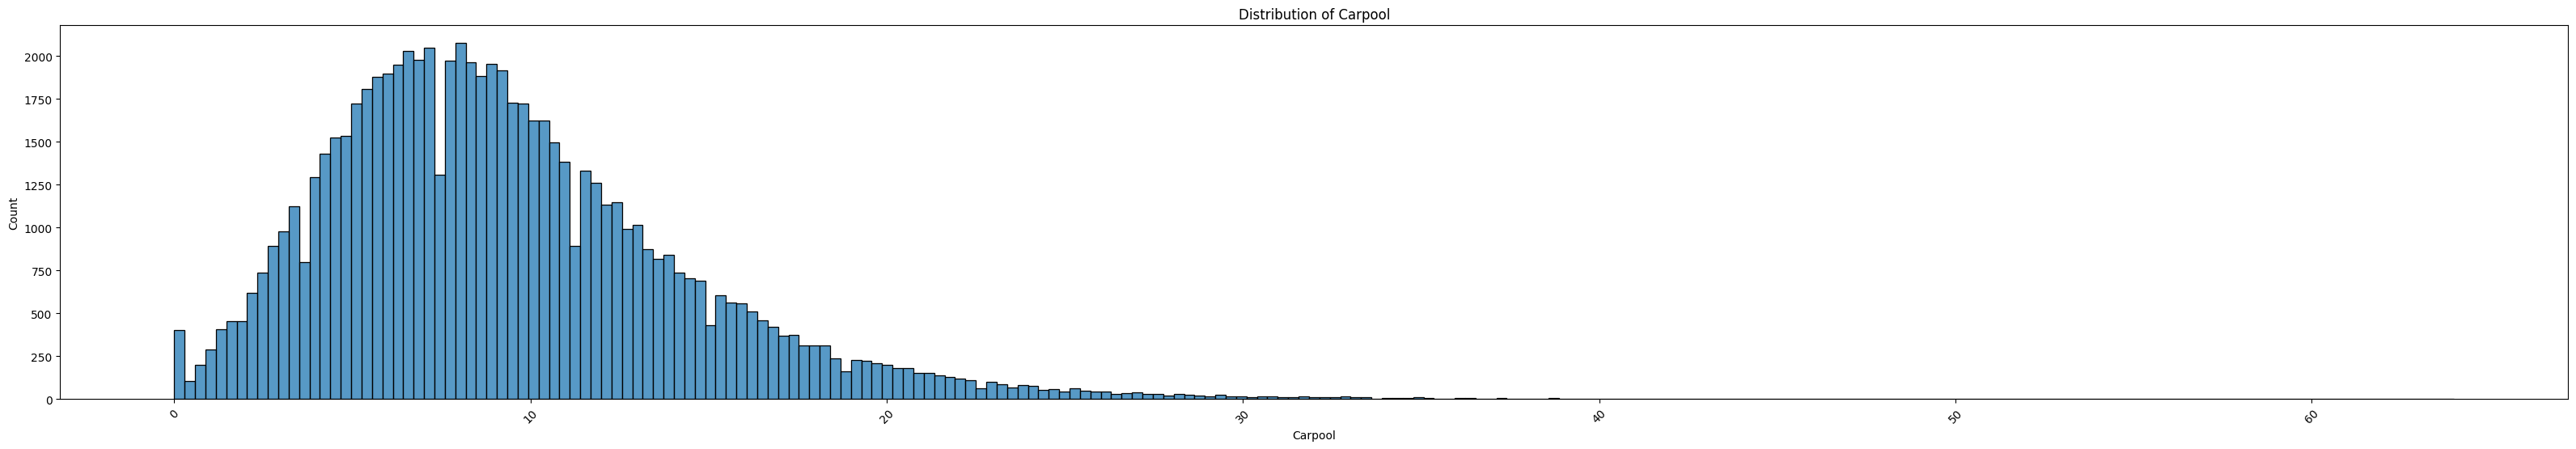

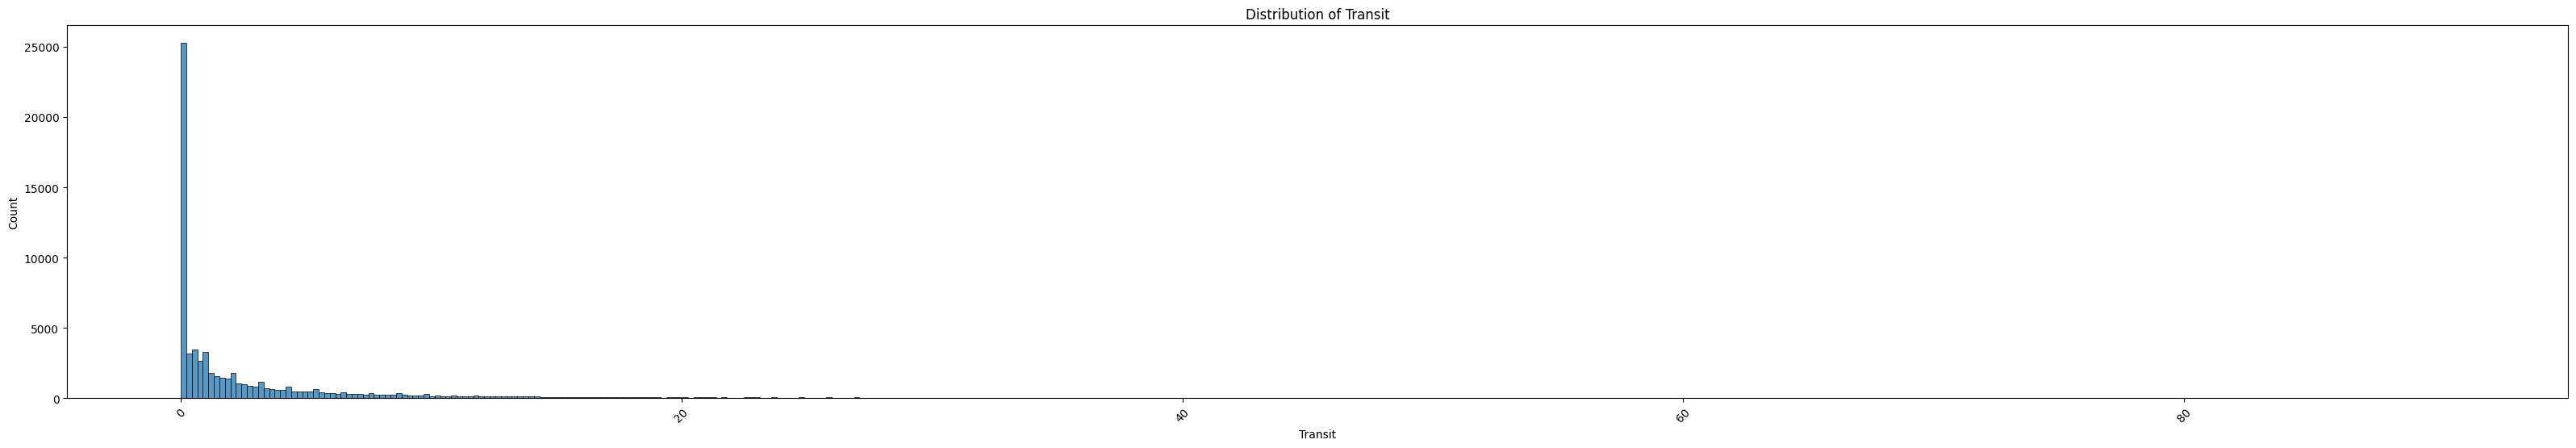

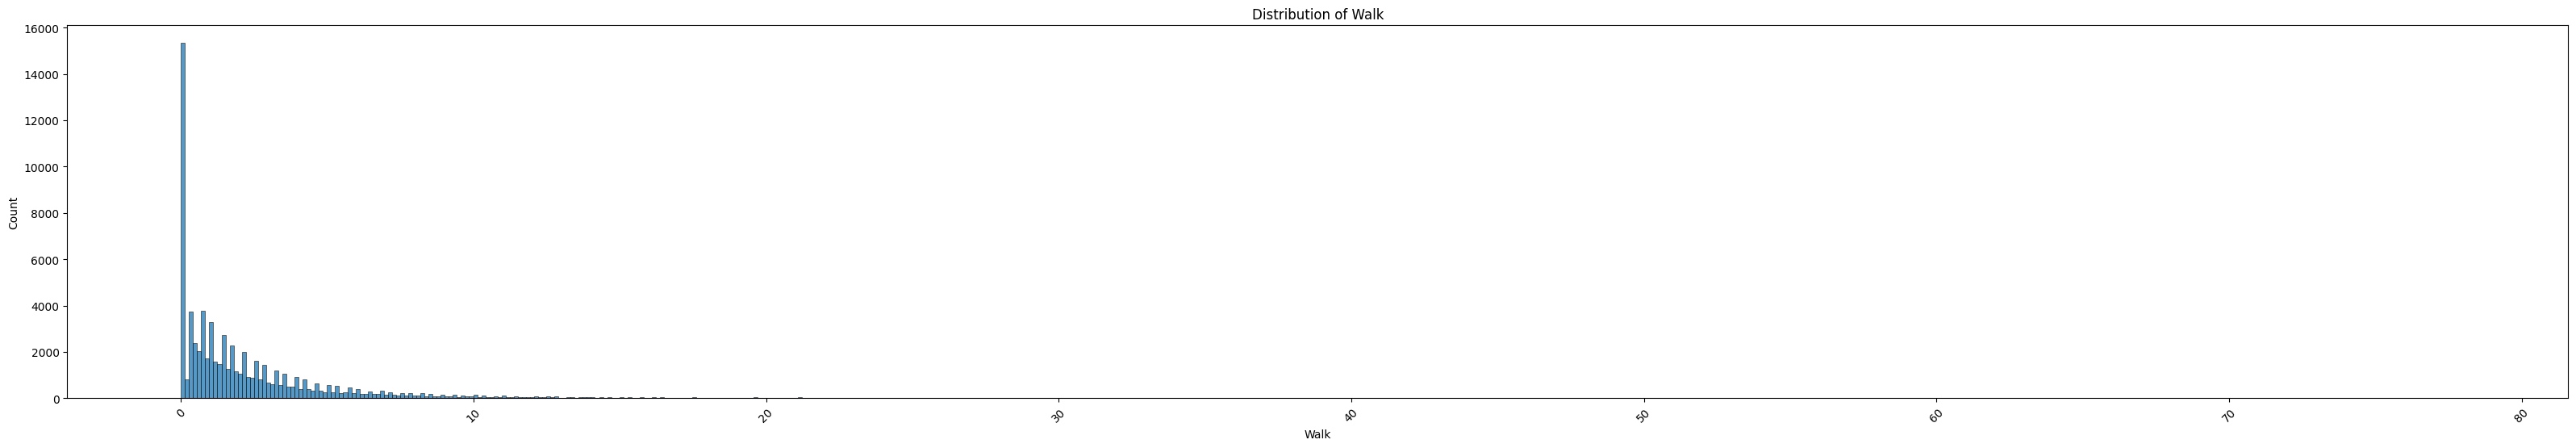

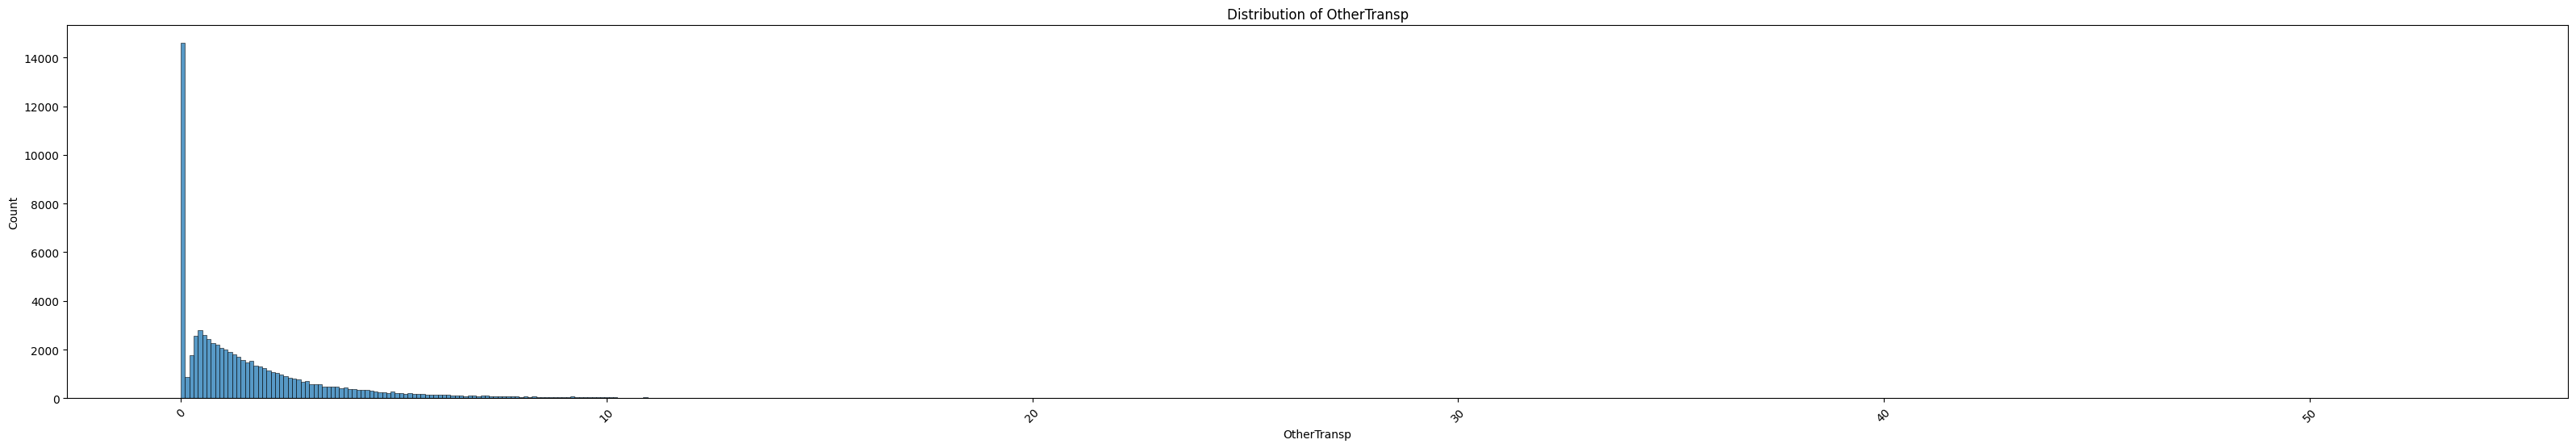

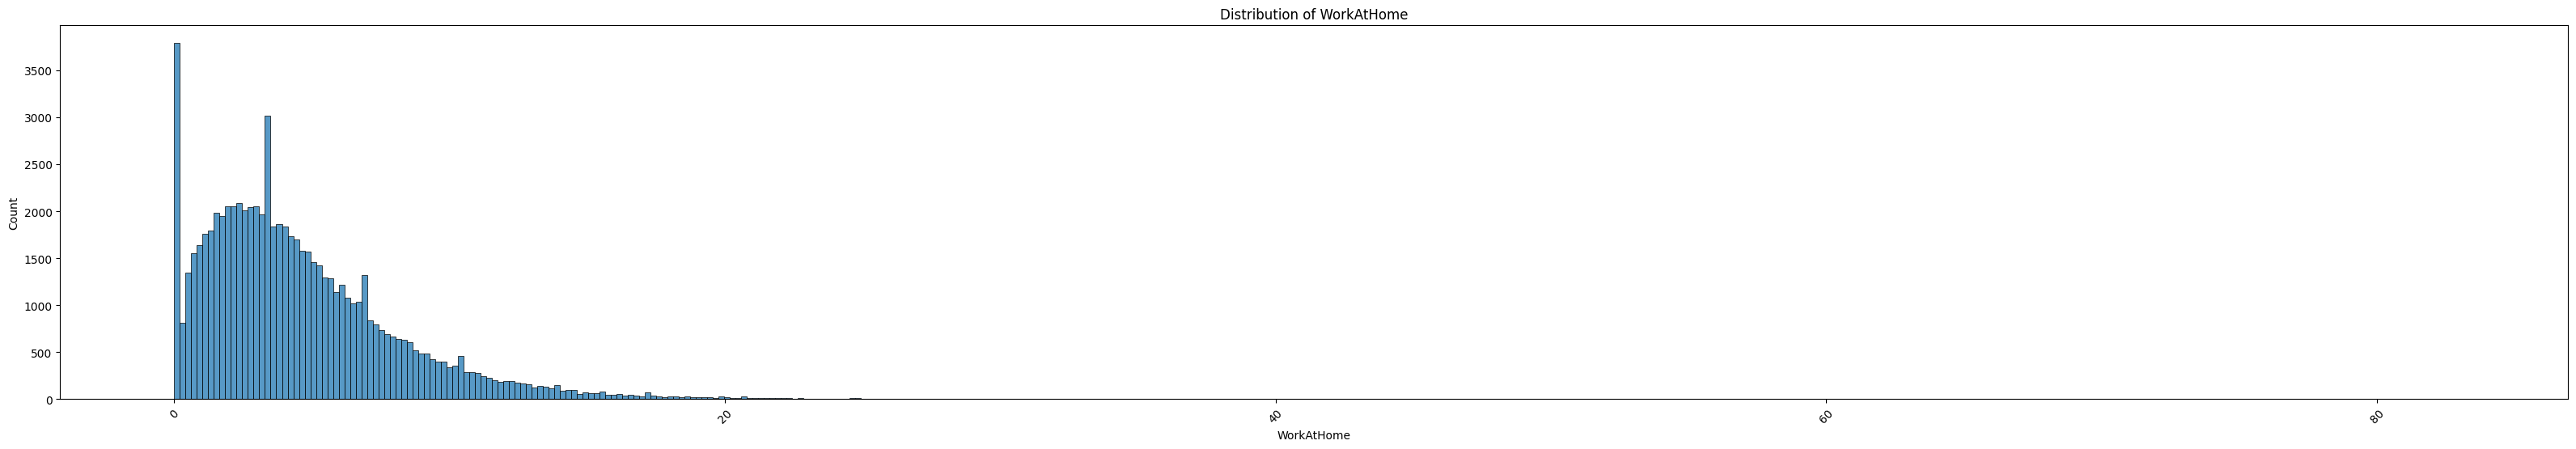

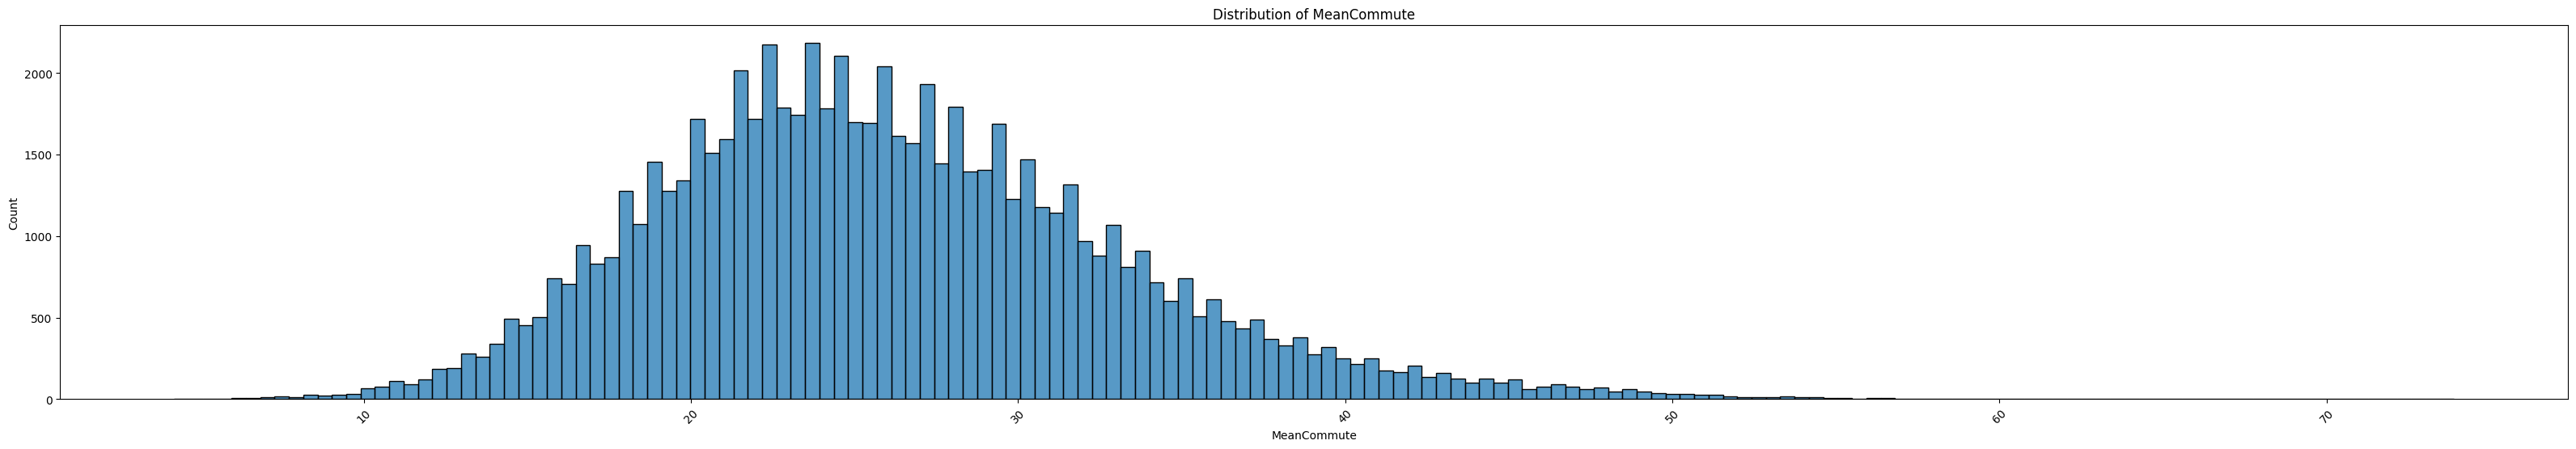

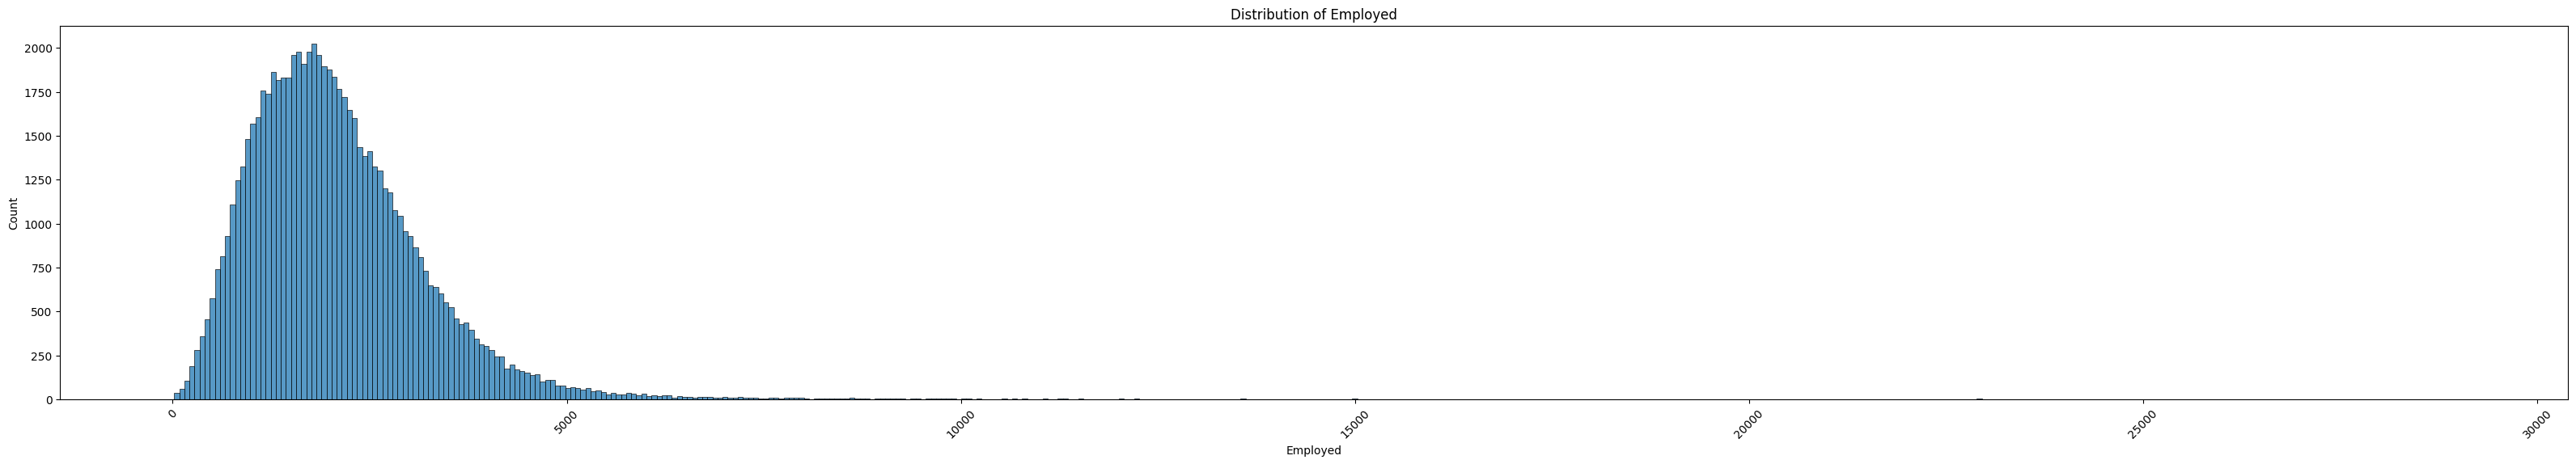

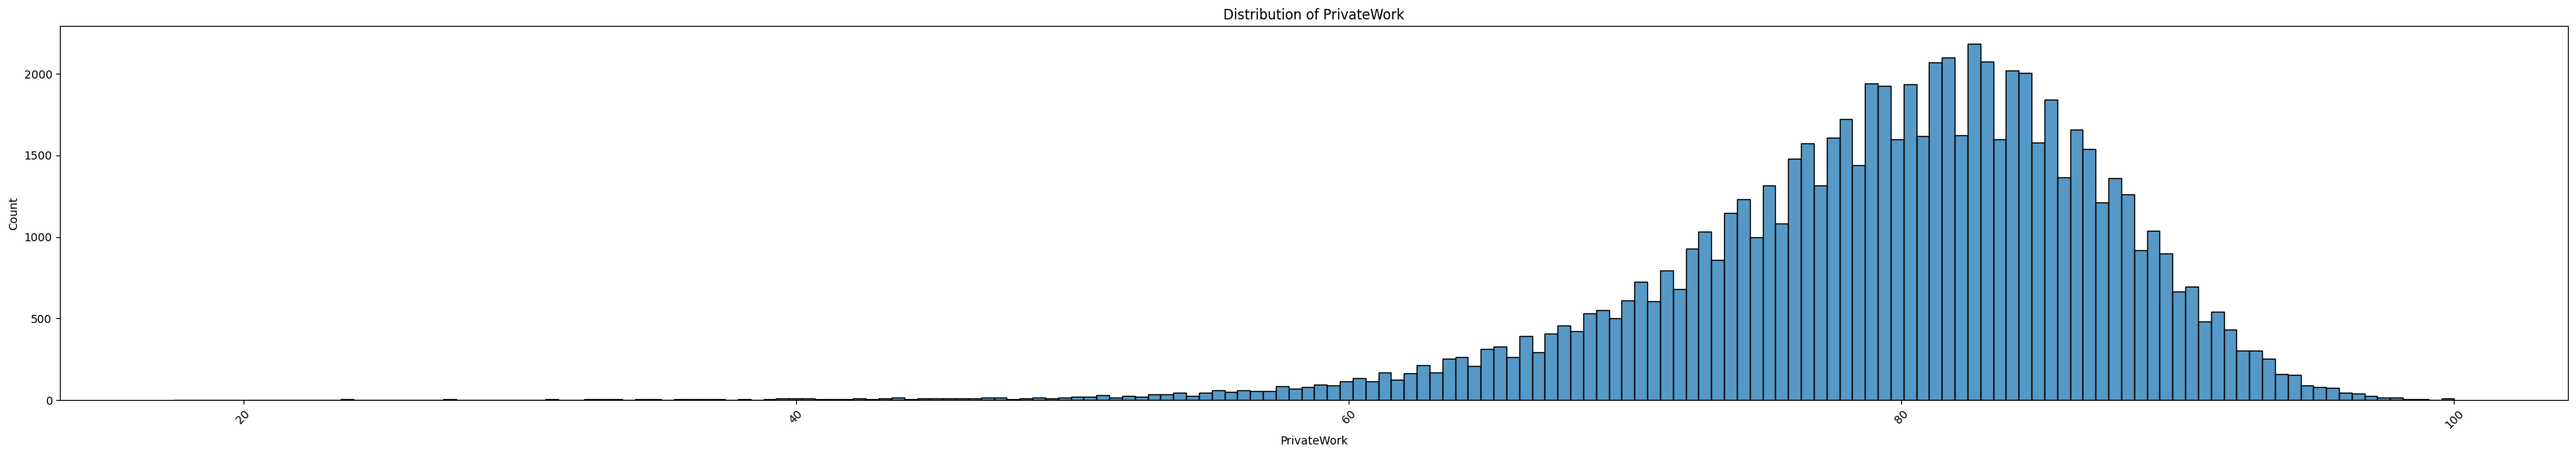

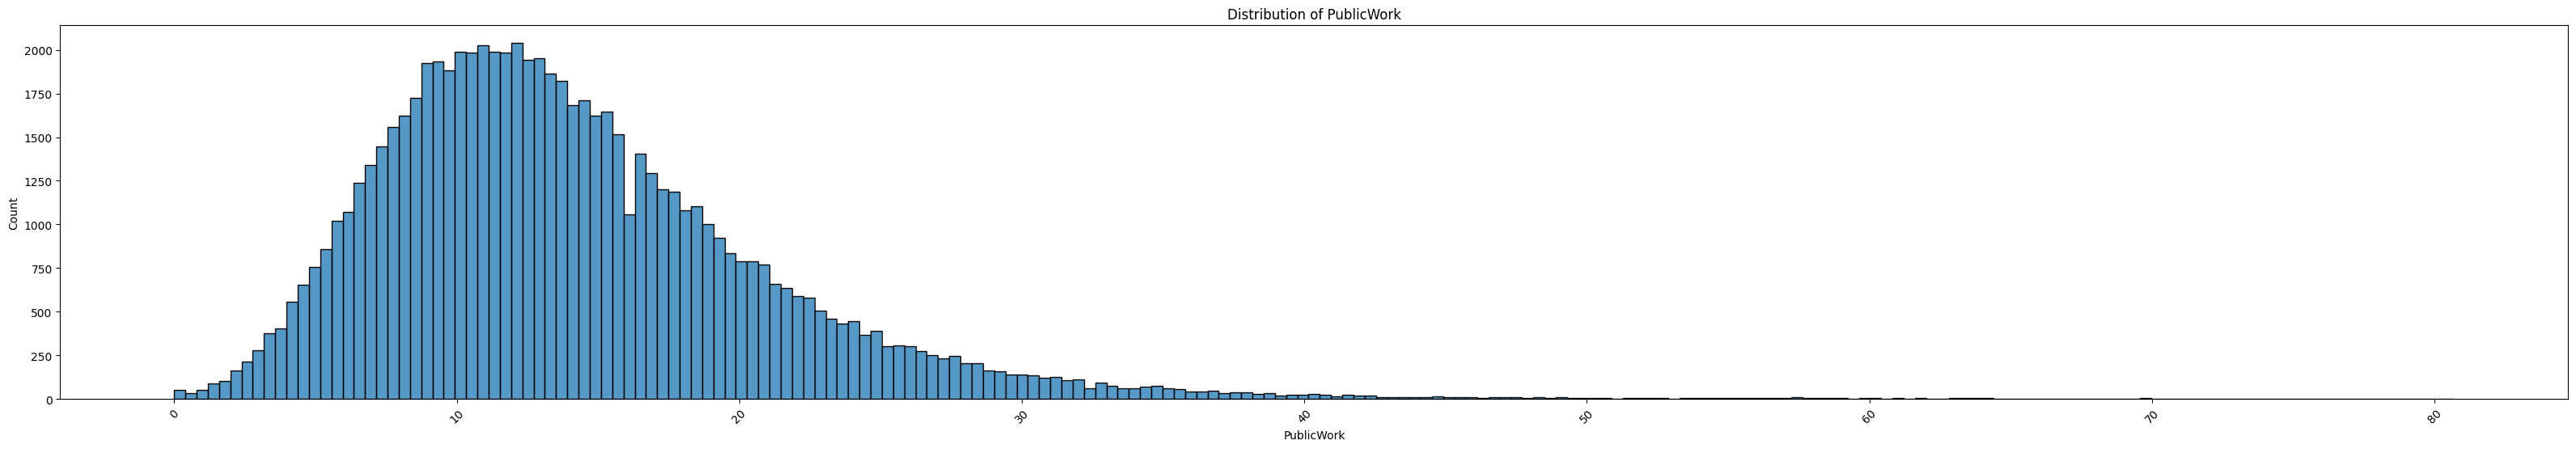

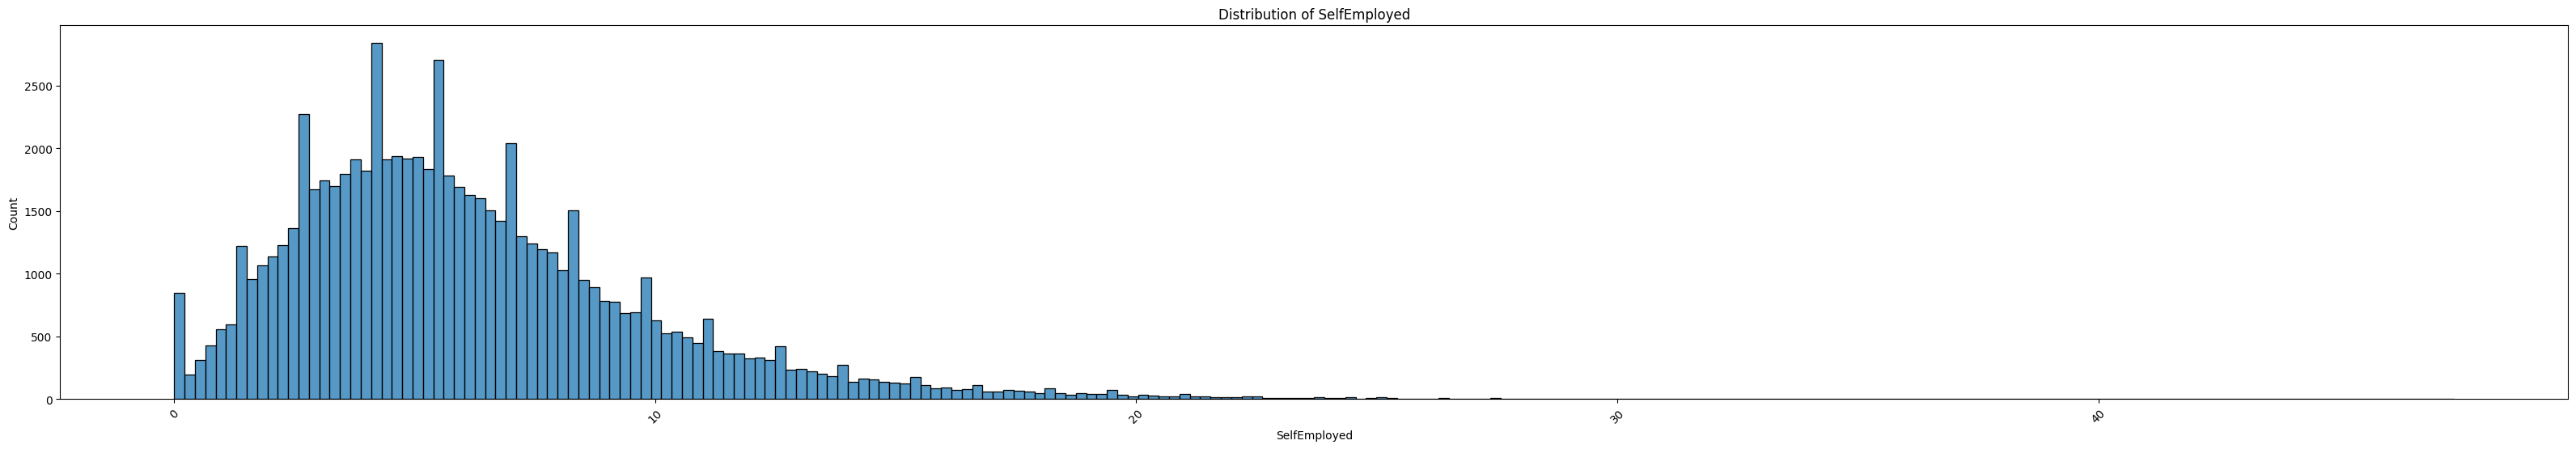

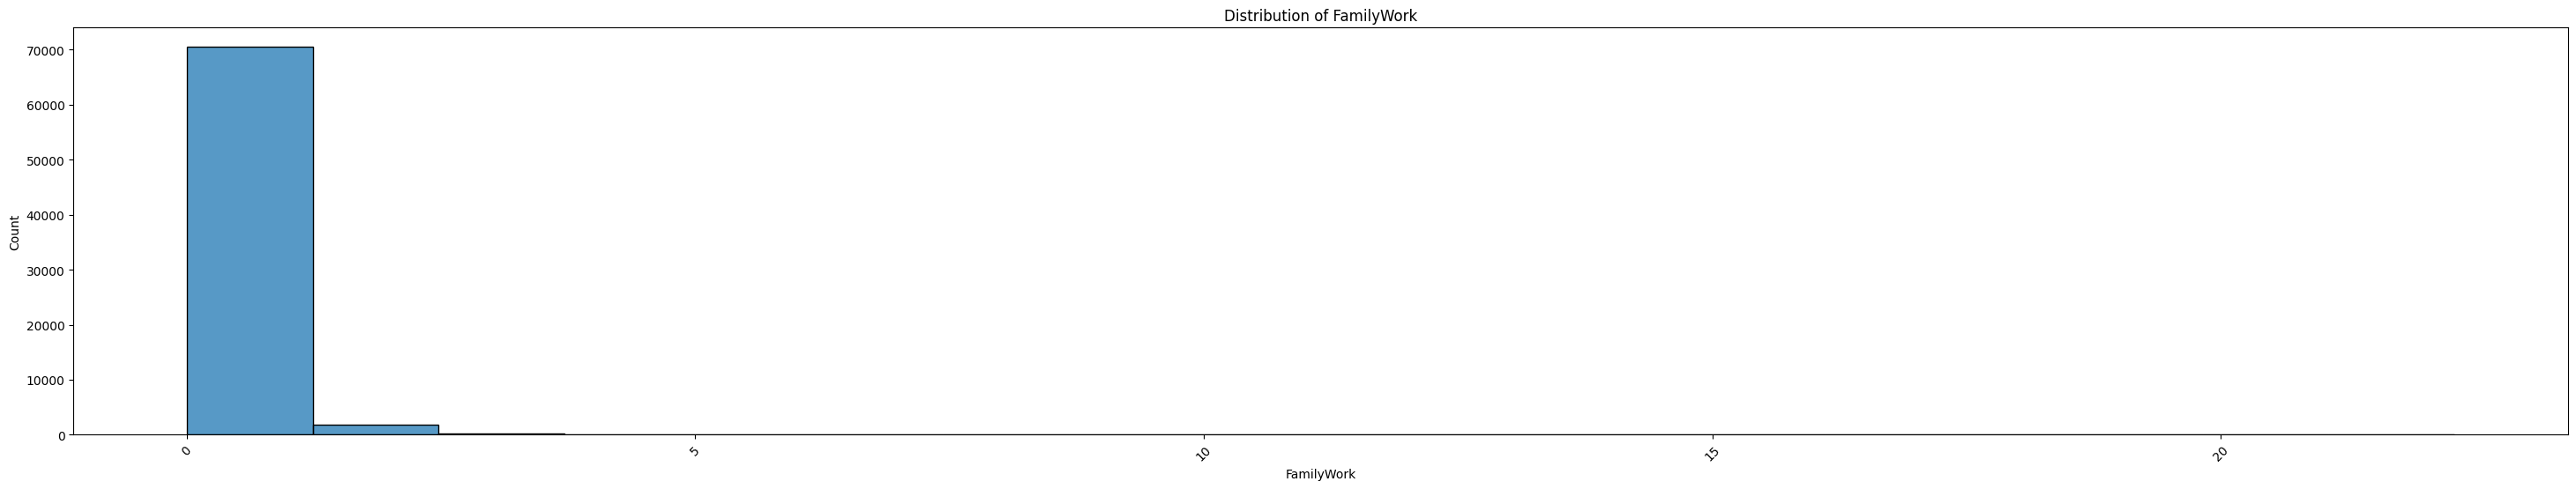

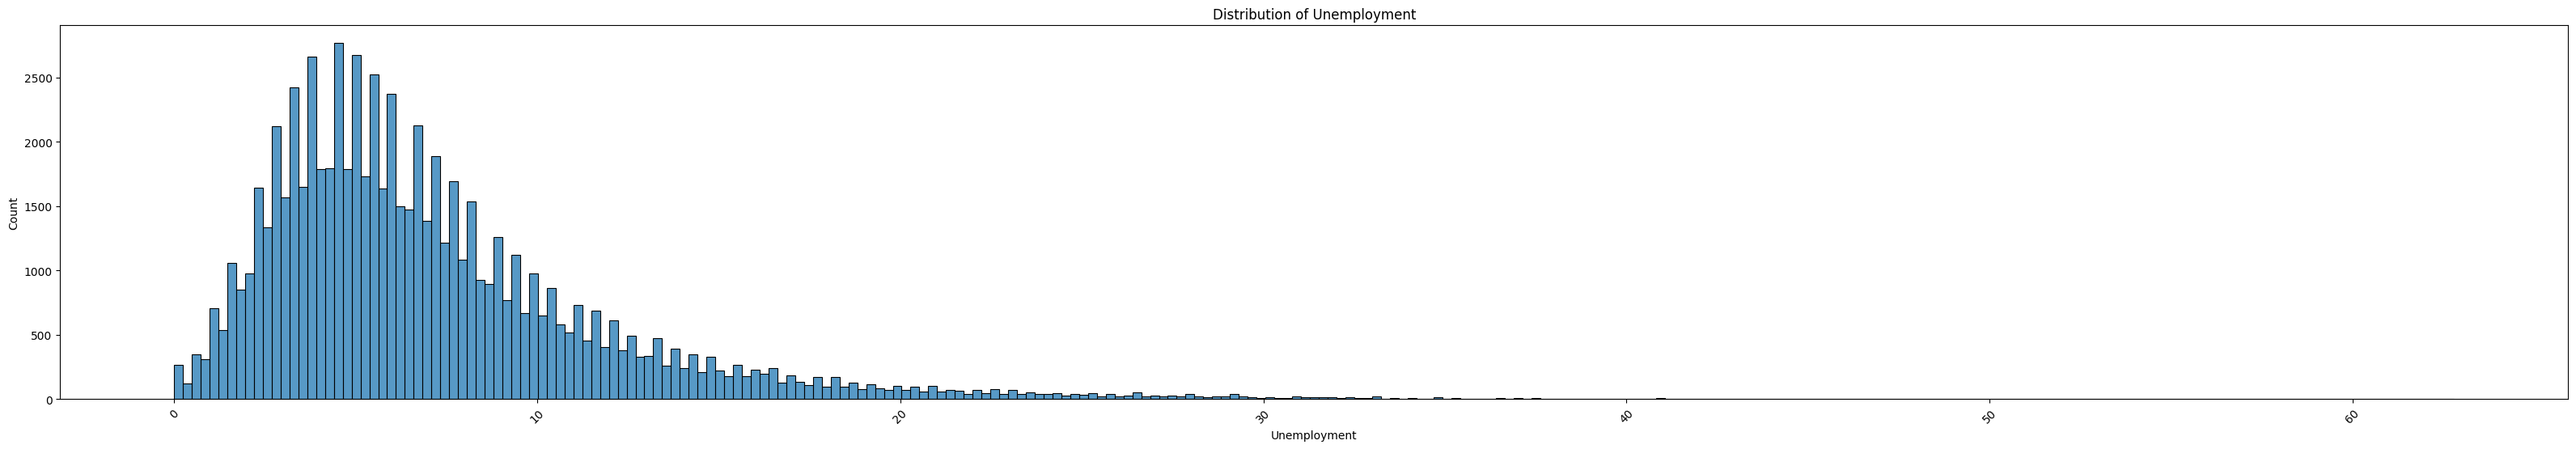

In [ ]:
for col in encoded_data_without_null.columns:
    unique_values = encoded_data_without_null[col].nunique()

    if unique_values == 0:
        continue
    fig_width = min(40, max(10, unique_values / 2))
    plt.figure(figsize=(fig_width, 6))

    sns.histplot(encoded_data_without_null[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Encoding the categorical features

In [ ]:
le = LabelEncoder()
encoded_data_mean['State'] = le.fit_transform(encoded_data_mean['State'])
encoded_data_mean['County'] = le.fit_transform(encoded_data_mean['County'])

In [ ]:
le = LabelEncoder()
encoded_data_without_null['State'] = le.fit_transform(encoded_data_without_null['State'])
encoded_data_without_null['County'] = le.fit_transform(encoded_data_without_null['County'])

In [ ]:
encoded_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             74001 non-null  int64  
 1   County            74001 non-null  int64  
 2   TotalPop          74001 non-null  int64  
 3   Men               74001 non-null  int64  
 4   Women             74001 non-null  int64  
 5   Hispanic          74001 non-null  float64
 6   Native            74001 non-null  float64
 7   Asian             74001 non-null  float64
 8   Pacific           74001 non-null  float64
 9   VotingAgeCitizen  74001 non-null  int64  
 10  Income            74001 non-null  float64
 11  IncomeErr         74001 non-null  float64
 12  IncomePerCap      74001 non-null  float64
 13  IncomePerCapErr   74001 non-null  float64
 14  Poverty           74001 non-null  float64
 15  ChildPoverty      74001 non-null  float64
 16  Professional      74001 n

In [ ]:
encoded_data_mean.head()

State  County  TotalPop   Men  Women  Hispanic  Native  Asian  \
TractId                                                                     
1001020100      0      89      1845   899    946       2.4     0.0    1.2   
1001020200      0      89      2172  1167   1005       1.1     0.0    1.0   
1001020300      0      89      3385  1533   1852       8.0     0.6    0.7   
1001020400      0      89      4267  2001   2266       9.6     0.5    0.2   
1001020500      0      89      9965  5054   4911       0.9     0.0    3.1   

            Pacific  VotingAgeCitizen  ...  Walk  OtherTransp  WorkAtHome  \
TractId                                ...                                  
1001020100      0.0              1407  ...   0.5          0.0         2.1   
1001020200      0.0              1652  ...   0.0          0.5         0.0   
1001020300      0.4              2480  ...   1.0          0.8         1.5   
1001020400      0.0              3257  ...   1.5          2.9         2.1   
1001020500      0.0              7229  ...   0.8          0.3         0.7   

            MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
TractId                                                                    
1001020100         24.5       881         74.2        21.2           4.5   
1001020200         22.2       852         75.9        15.0           9.0   
1001020300         23.1      1482         73.3        21.1           4.8   
1001020400         25.9      1849         75.8        19.7           4.5   
1001020500         21.0      4787         71.4        24.1           4.5   

            FamilyWork  Unemployment  
TractId                               
1001020100         0.0           4.6  
1001020200         0.0           3.4  
1001020300         0.7           4.7  
1001020400         0.0           6.1  
1001020500         0.0           2.3  

[5 rows x 34 columns]

In [ ]:
encoded_data_mean['State'] .value_counts().sort_values(ascending=False).head(30)

4     8057
44    5265
32    4918
9     4245
38    3218
13    3123
35    2952
22    2813
33    2195
30    2010
10    1969
47    1907
2     1526
14    1511
43    1497
21    1478
48    1458
50    1409
20    1406
25    1393
23    1338
5     1249
0     1181
18    1148
17    1115
41    1103
36    1046
39     945
37     834
6      833
Name: State, dtype: int64

In [ ]:
encoded_data_mean['County'] .value_counts().sort_values(ascending=False).head(30)

1046    2346
420     1326
1301     939
1090     916
1190     833
878      800
769      791
943      788
1861     768
368      694
1439     669
1538     628
470      565
1851     551
1157     535
1686     527
1156     519
628      491
1094     457
1487     453
464      447
871      430
979      427
802      407
32       402
937      399
585      392
1185     390
1371     384
1560     372
Name: County, dtype: int64

In [ ]:
count_distinct_states = encoded_data_mean['State'].nunique()
print(f"Number of distinct values in column State: {count_distinct_states}")

Number of distinct values in column State: 52


In [ ]:
count_distinct_counties = encoded_data_mean['County'].nunique()
print(f"Number of distinct values in column County: {count_distinct_counties}")

Number of distinct values in column County: 1955


In [ ]:
encoded_data_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 1001020100 to 72153750602
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   County            72718 non-null  int64  
 2   TotalPop          72718 non-null  int64  
 3   Men               72718 non-null  int64  
 4   Women             72718 non-null  int64  
 5   Hispanic          72718 non-null  float64
 6   Native            72718 non-null  float64
 7   Asian             72718 non-null  float64
 8   Pacific           72718 non-null  float64
 9   VotingAgeCitizen  72718 non-null  int64  
 10  Income            72718 non-null  float64
 11  IncomeErr         72718 non-null  float64
 12  IncomePerCap      72718 non-null  float64
 13  IncomePerCapErr   72718 non-null  float64
 14  Poverty           72718 non-null  float64
 15  ChildPoverty      72718 non-null  float64
 16  Professional      72718 n

In [ ]:
encoded_data_without_null.head()

State  County  TotalPop   Men  Women  Hispanic  Native  Asian  \
TractId                                                                     
1001020100      0      89      1845   899    946       2.4     0.0    1.2   
1001020200      0      89      2172  1167   1005       1.1     0.0    1.0   
1001020300      0      89      3385  1533   1852       8.0     0.6    0.7   
1001020400      0      89      4267  2001   2266       9.6     0.5    0.2   
1001020500      0      89      9965  5054   4911       0.9     0.0    3.1   

            Pacific  VotingAgeCitizen  ...  Walk  OtherTransp  WorkAtHome  \
TractId                                ...                                  
1001020100      0.0              1407  ...   0.5          0.0         2.1   
1001020200      0.0              1652  ...   0.0          0.5         0.0   
1001020300      0.4              2480  ...   1.0          0.8         1.5   
1001020400      0.0              3257  ...   1.5          2.9         2.1   
1001020500      0.0              7229  ...   0.8          0.3         0.7   

            MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
TractId                                                                    
1001020100         24.5       881         74.2        21.2           4.5   
1001020200         22.2       852         75.9        15.0           9.0   
1001020300         23.1      1482         73.3        21.1           4.8   
1001020400         25.9      1849         75.8        19.7           4.5   
1001020500         21.0      4787         71.4        24.1           4.5   

            FamilyWork  Unemployment  
TractId                               
1001020100         0.0           4.6  
1001020200         0.0           3.4  
1001020300         0.7           4.7  
1001020400         0.0           6.1  
1001020500         0.0           2.3  

[5 rows x 34 columns]

In [ ]:
encoded_data_without_null.describe()

State        County      TotalPop           Men         Women  \
count  72718.000000  72718.000000  72718.000000  72718.000000  72718.000000   
mean      24.340370    998.356941   4443.485121   2184.362647   2259.122473   
std       15.102552    530.254496   2190.183318   1099.954423   1124.604806   
min        0.000000      0.000000     58.000000     26.000000     27.000000   
25%       10.000000    545.000000   2958.000000   1440.000000   1494.000000   
50%       24.000000   1045.000000   4137.000000   2024.000000   2102.000000   
75%       38.000000   1433.750000   5532.750000   2719.000000   2817.000000   
max       51.000000   1953.000000  65528.000000  32266.000000  33262.000000   

           Hispanic        Native         Asian       Pacific  \
count  72718.000000  72718.000000  72718.000000  72718.000000   
mean      17.282951      0.727776      4.752459      0.146082   
std       23.084428      4.505791      8.995573      1.015198   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.600000      0.000000      0.200000      0.000000   
50%        7.400000      0.000000      1.500000      0.000000   
75%       21.100000      0.400000      5.000000      0.000000   
max      100.000000     99.400000     91.400000     71.900000   

       VotingAgeCitizen  ...          Walk   OtherTransp    WorkAtHome  \
count      72718.000000  ...  72718.000000  72718.000000  72718.000000   
mean        3141.161982  ...      2.925778      1.886076      4.612646   
std         1512.610257  ...      5.260623      2.485812      3.770733   
min           40.000000  ...      0.000000      0.000000      0.000000   
25%         2096.000000  ...      0.400000      0.400000      2.000000   
50%         2926.000000  ...      1.400000      1.200000      3.800000   
75%         3923.000000  ...      3.300000      2.500000      6.300000   
max        39389.000000  ...     77.700000     53.400000     82.800000   

        MeanCommute      Employed   PrivateWork    PublicWork  SelfEmployed  \
count  72718.000000  72718.000000  72718.000000  72718.000000  72718.000000   
mean      26.080334   2081.309139     79.511827     14.149495      6.167661   
std        7.095680   1120.109805      7.957350      7.164790      3.798703   
min        4.200000     20.000000     17.500000      0.000000      0.000000   
25%       21.100000   1306.000000     75.300000      9.300000      3.500000   
50%       25.400000   1915.000000     80.600000     13.000000      5.500000   
75%       30.300000   2651.000000     85.000000     17.600000      8.000000   
max       73.900000  28945.000000    100.000000     80.700000     47.400000   

         FamilyWork  Unemployment  
count  72718.000000  72718.000000  
mean       0.171231      7.224917  
std        0.451630      5.099419  
min        0.000000      0.000000  
25%        0.000000      3.900000  
50%        0.000000      6.000000  
75%        0.000000      9.000000  
max       22.300000     62.800000  

[8 rows x 34 columns]

### The loss percentage

In [ ]:
print(f"The data size before dropping the null values: {len(encoded_data_mean)}")

The data size before dropping the null values: 74001


In [ ]:
print(f"The data size after dropping the null values: {len(encoded_data_without_null)}")

The data size after dropping the null values: 72718


In [ ]:
print(f"After dropping the rows that contain the null values, the percentage of data loss is: {round(abs((len(encoded_data_without_null) - len(encoded_data_mean)) / len(encoded_data_mean)) * 100, 1)} %")

After dropping the rows that contain the null values, the percentage of data loss is: 1.7 %


### Data Distribution After Encoding Categorical values

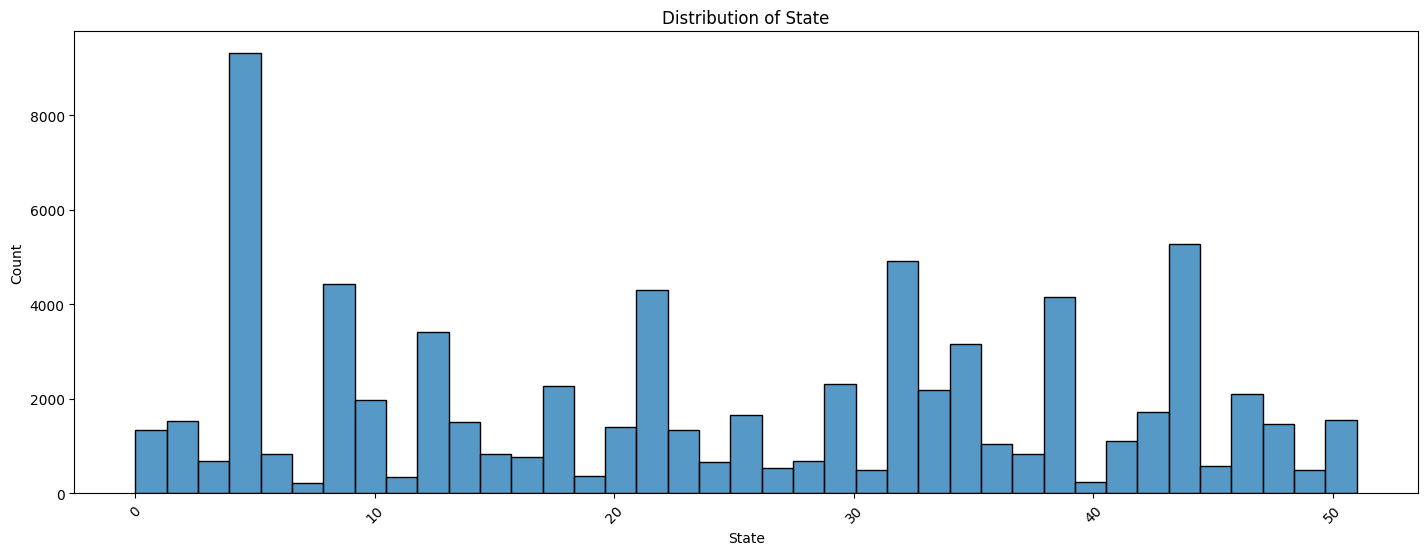

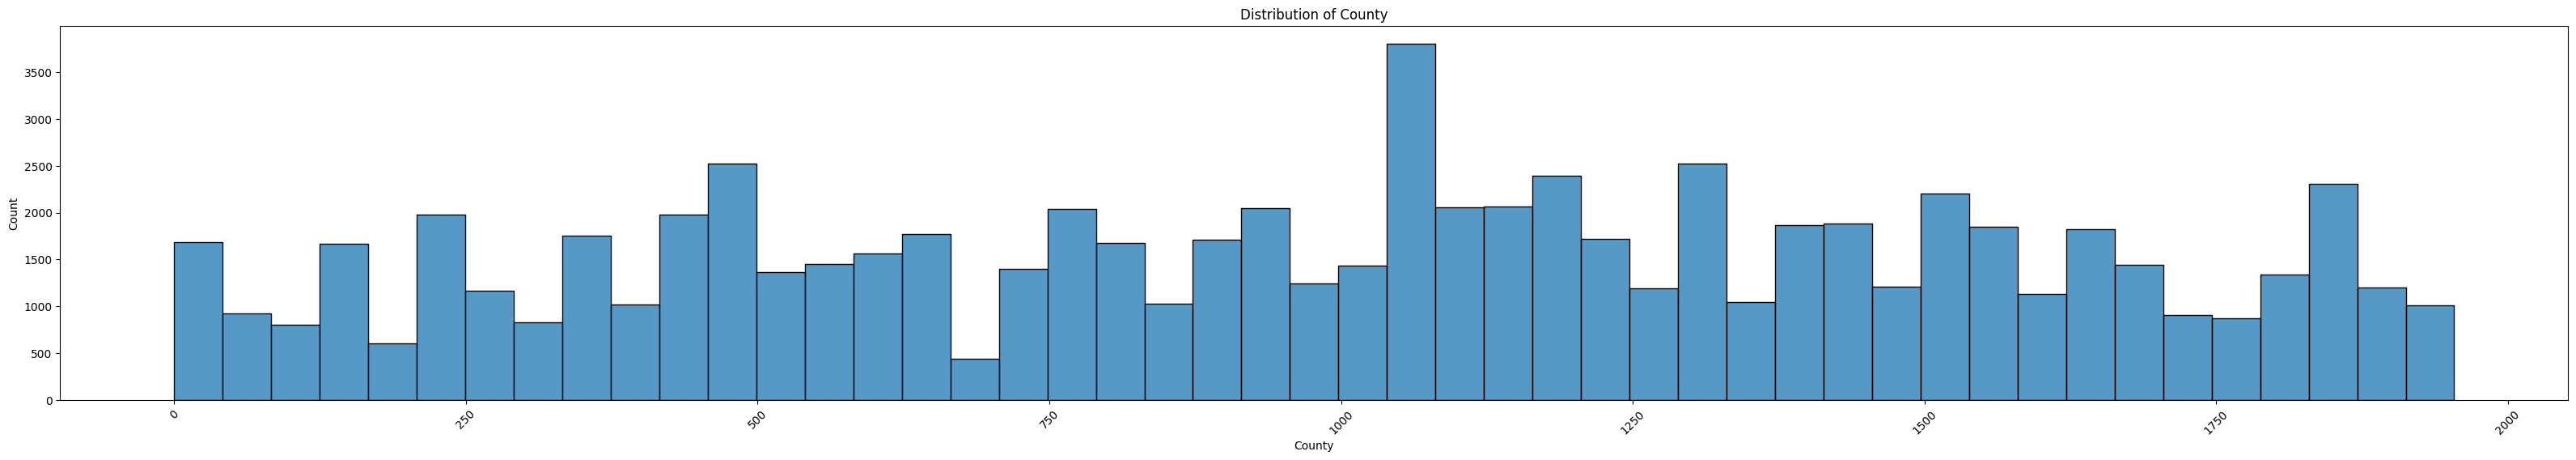

In [ ]:
cols_of_interest = ["State", "County"]

for col_of_interest in cols_of_interest:
    if col_of_interest in encoded_data_mean.columns:
        unique_values = encoded_data_mean[col_of_interest].nunique()
        if unique_values == 0:
            print(f"Skipping {col_of_interest} as it has zero unique values.")
        else:
            fig_width = min(40, max(10, unique_values / 3))
            plt.figure(figsize=(fig_width, 6))

            sns.histplot(encoded_data_mean[col_of_interest], kde=False)
            plt.title(f'Distribution of {col_of_interest}')
            plt.xticks(rotation=45)
            plt.show()

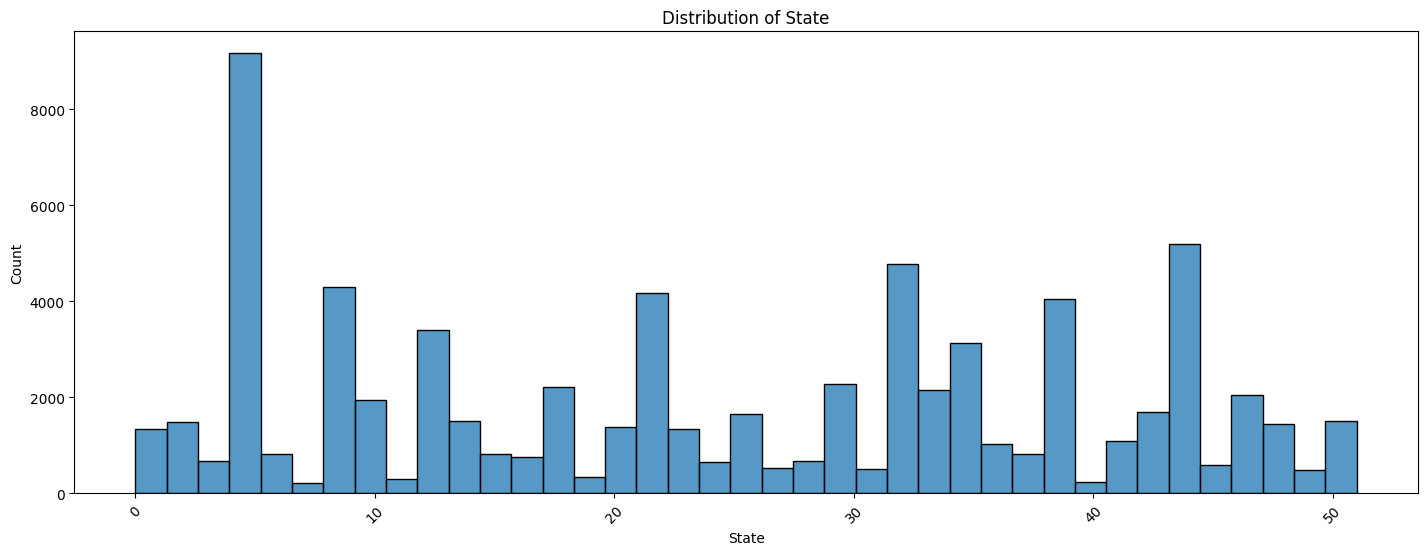

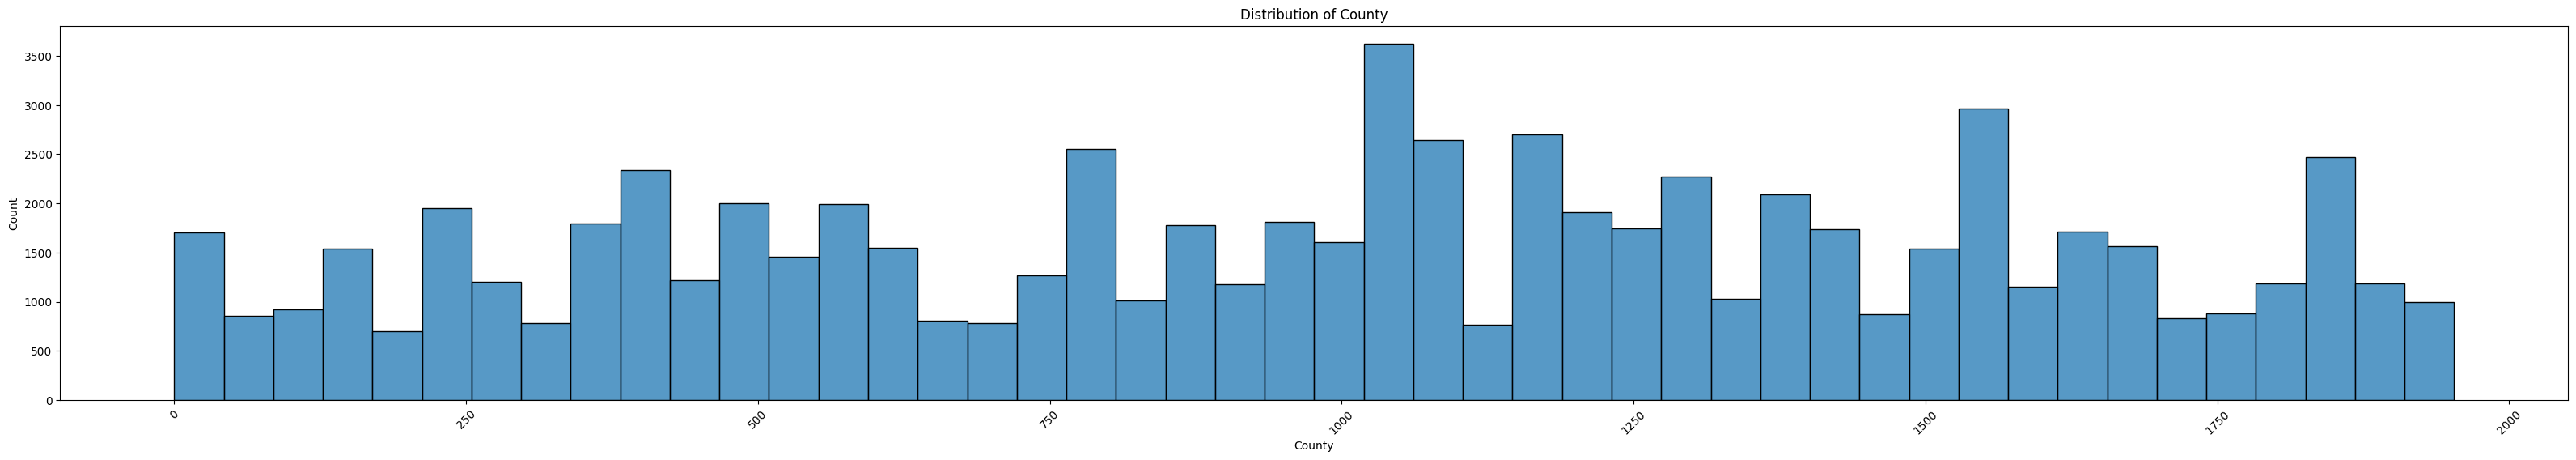

In [ ]:
cols_of_interest = ["State", "County"]

for col_of_interest in cols_of_interest:
    if col_of_interest in encoded_data_without_null.columns:
        unique_values = encoded_data_without_null[col_of_interest].nunique()
        if unique_values == 0:
            print(f"Skipping {col_of_interest} as it has zero unique values.")
        else:
            fig_width = min(40, max(10, unique_values / 3))
            plt.figure(figsize=(fig_width, 6))

            sns.histplot(encoded_data_without_null[col_of_interest], kde=False)
            plt.title(f'Distribution of {col_of_interest}')
            plt.xticks(rotation=45)
            plt.show()

## CLUSTERING

### Finding the number *K* of Clusters using the Elbow method

In [ ]:
def get_kmean_model(k, init, max_iter):
  model = KMeans(n_clusters=k, init=init, max_iter=max_iter)
  return model

In [ ]:
def find_k_mean(dataset, n):
  means = []
  inertias = []
  for k in range(1, n):
    km = get_kmean_model(k, 'k-means++', 1000)
    km.fit(dataset)
    means.append(k)
    inertias.append(km.inertia_)
  return means, inertias

In [ ]:
def plot(x, y, x_label, y_label, label):
  sns.pointplot(x=x, y=y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(label)
  plt.show()


In [ ]:
means_1, inertias_1 = find_k_mean(encoded_data_mean[['IncomePerCap','Poverty']], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
means_2, inertias_2 = find_k_mean(encoded_data_without_null[['IncomePerCap','Poverty']], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

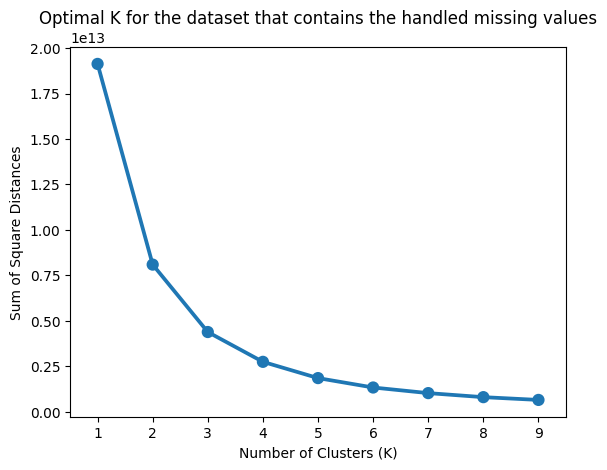

In [ ]:
plot(means_1, inertias_1, 'Number of Clusters (K)', 'Sum of Square Distances', 'Optimal K for the dataset that contains the handled missing values')

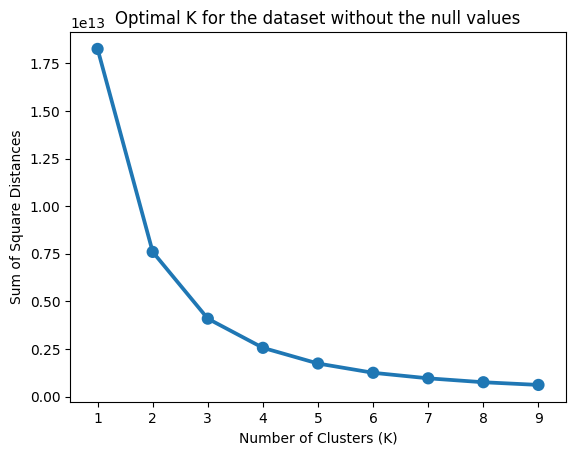

In [ ]:
plot(means_2, inertias_2, 'Number of Clusters (K)', 'Sum of Square Distances', 'Optimal K for the dataset without the null values')

### K Means

In [ ]:
model_mean = get_kmean_model(3, 'k-means++', 1000)
model_mean.fit(encoded_data_mean[['IncomePerCap','Poverty']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3)

In [ ]:
model_no_null = get_kmean_model(3, 'k-means++', 1000)
model_no_null.fit(encoded_data_without_null[['IncomePerCap','Poverty']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3)

In [ ]:
print('Labels', model_mean.cluster_centers_)

Labels [[3.97859707e+04 7.89995809e+00]
 [2.14884509e+04 2.15831288e+01]
 [7.76419641e+04 5.40117442e+00]]


In [ ]:
print('Labels', model_no_null.cluster_centers_)

Labels [[3.96540482e+04 7.86166224e+00]
 [2.15606174e+04 2.14759453e+01]
 [7.60084138e+04 5.43967221e+00]]


In [ ]:
centroids_mean = model_mean.cluster_centers_

In [ ]:
centroids_no_null = model_no_null.cluster_centers_

In [ ]:
df_mean_temp = encoded_data_mean.copy()
df_mean_temp['Cluster'] = model_mean.labels_

In [ ]:
df_no_null_temp = encoded_data_without_null.copy()
df_no_null_temp['Cluster'] = model_no_null.labels_

In [ ]:
df_mean_temp

State  County  TotalPop   Men  Women  Hispanic  Native  Asian  \
TractId                                                                      
1001020100       0      89      1845   899    946       2.4     0.0    1.2   
1001020200       0      89      2172  1167   1005       1.1     0.0    1.0   
1001020300       0      89      3385  1533   1852       8.0     0.6    0.7   
1001020400       0      89      4267  2001   2266       9.6     0.5    0.2   
1001020500       0      89      9965  5054   4911       0.9     0.0    3.1   
...            ...     ...       ...   ...    ...       ...     ...    ...   
72153750501     39    1939      6011  3035   2976      99.7     0.0    0.0   
72153750502     39    1939      2342   959   1383      99.1     0.0    0.0   
72153750503     39    1939      2218  1001   1217      99.5     0.0    0.2   
72153750601     39    1939      4380  1964   2416     100.0     0.0    0.0   
72153750602     39    1939      3001  1343   1658      99.2     0.0    0.0   

             Pacific  VotingAgeCitizen  ...  OtherTransp  WorkAtHome  \
TractId                                 ...                            
1001020100       0.0              1407  ...          0.0         2.1   
1001020200       0.0              1652  ...          0.5         0.0   
1001020300       0.4              2480  ...          0.8         1.5   
1001020400       0.0              3257  ...          2.9         2.1   
1001020500       0.0              7229  ...          0.3         0.7   
...              ...               ...  ...          ...         ...   
72153750501      0.0              4329  ...          0.0         3.6   
72153750502      0.0              1716  ...          0.0         1.3   
72153750503      0.0              1616  ...          0.0         3.4   
72153750601      0.0              3346  ...          0.0         0.0   
72153750602      0.0              2641  ...          0.0         8.9   

             MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
TractId                                                                     
1001020100          24.5       881         74.2        21.2           4.5   
1001020200          22.2       852         75.9        15.0           9.0   
1001020300          23.1      1482         73.3        21.1           4.8   
1001020400          25.9      1849         75.8        19.7           4.5   
1001020500          21.0      4787         71.4        24.1           4.5   
...                  ...       ...          ...         ...           ...   
72153750501         26.9      1576         59.2        33.8           7.0   
72153750502         25.3       666         58.4        35.4           6.2   
72153750503         23.5       560         57.5        34.5           8.0   
72153750601         24.1      1062         67.7        30.4           1.9   
72153750602         21.6       759         75.9        19.1           5.0   

             FamilyWork  Unemployment  Cluster  
TractId                                         
1001020100          0.0           4.6        0  
1001020200          0.0           3.4        1  
1001020300          0.7           4.7        1  
1001020400          0.0           6.1        1  
1001020500          0.0           2.3        0  
...                 ...           ...      ...  
72153750501         0.0          20.8        1  
72153750502         0.0          26.3        1  
72153750503         0.0          23.0        1  
72153750601         0.0          29.5        1  
72153750602         0.0          17.9        1  

[74001 rows x 35 columns]

In [ ]:
df_no_null_temp

State  County  TotalPop   Men  Women  Hispanic  Native  Asian  \
TractId                                                                      
1001020100       0      89      1845   899    946       2.4     0.0    1.2   
1001020200       0      89      2172  1167   1005       1.1     0.0    1.0   
1001020300       0      89      3385  1533   1852       8.0     0.6    0.7   
1001020400       0      89      4267  2001   2266       9.6     0.5    0.2   
1001020500       0      89      9965  5054   4911       0.9     0.0    3.1   
...            ...     ...       ...   ...    ...       ...     ...    ...   
72153750501     39    1938      6011  3035   2976      99.7     0.0    0.0   
72153750502     39    1938      2342   959   1383      99.1     0.0    0.0   
72153750503     39    1938      2218  1001   1217      99.5     0.0    0.2   
72153750601     39    1938      4380  1964   2416     100.0     0.0    0.0   
72153750602     39    1938      3001  1343   1658      99.2     0.0    0.0   

             Pacific  VotingAgeCitizen  ...  OtherTransp  WorkAtHome  \
TractId                                 ...                            
1001020100       0.0              1407  ...          0.0         2.1   
1001020200       0.0              1652  ...          0.5         0.0   
1001020300       0.4              2480  ...          0.8         1.5   
1001020400       0.0              3257  ...          2.9         2.1   
1001020500       0.0              7229  ...          0.3         0.7   
...              ...               ...  ...          ...         ...   
72153750501      0.0              4329  ...          0.0         3.6   
72153750502      0.0              1716  ...          0.0         1.3   
72153750503      0.0              1616  ...          0.0         3.4   
72153750601      0.0              3346  ...          0.0         0.0   
72153750602      0.0              2641  ...          0.0         8.9   

             MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
TractId                                                                     
1001020100          24.5       881         74.2        21.2           4.5   
1001020200          22.2       852         75.9        15.0           9.0   
1001020300          23.1      1482         73.3        21.1           4.8   
1001020400          25.9      1849         75.8        19.7           4.5   
1001020500          21.0      4787         71.4        24.1           4.5   
...                  ...       ...          ...         ...           ...   
72153750501         26.9      1576         59.2        33.8           7.0   
72153750502         25.3       666         58.4        35.4           6.2   
72153750503         23.5       560         57.5        34.5           8.0   
72153750601         24.1      1062         67.7        30.4           1.9   
72153750602         21.6       759         75.9        19.1           5.0   

             FamilyWork  Unemployment  Cluster  
TractId                                         
1001020100          0.0           4.6        0  
1001020200          0.0           3.4        1  
1001020300          0.7           4.7        1  
1001020400          0.0           6.1        1  
1001020500          0.0           2.3        0  
...                 ...           ...      ...  
72153750501         0.0          20.8        1  
72153750502         0.0          26.3        1  
72153750503         0.0          23.0        1  
72153750601         0.0          29.5        1  
72153750602         0.0          17.9        1  

[72718 rows x 35 columns]

### Visualizing Clusters

In [ ]:
def plot_clusters(df, column_1, column_2, centroids):
  colors = ['navy', 'blue', 'gold', 'red', 'black']
  df['Color'] = df['Cluster'].map(lambda x:colors[x])
  plt.figure(figsize=(40, 20))
  plt.scatter(df[column_1], df[column_2], c=df['Color'])
  plt.scatter(centroids[: , 0], centroids[: , 1], c='green', s=250)
  plt.show()

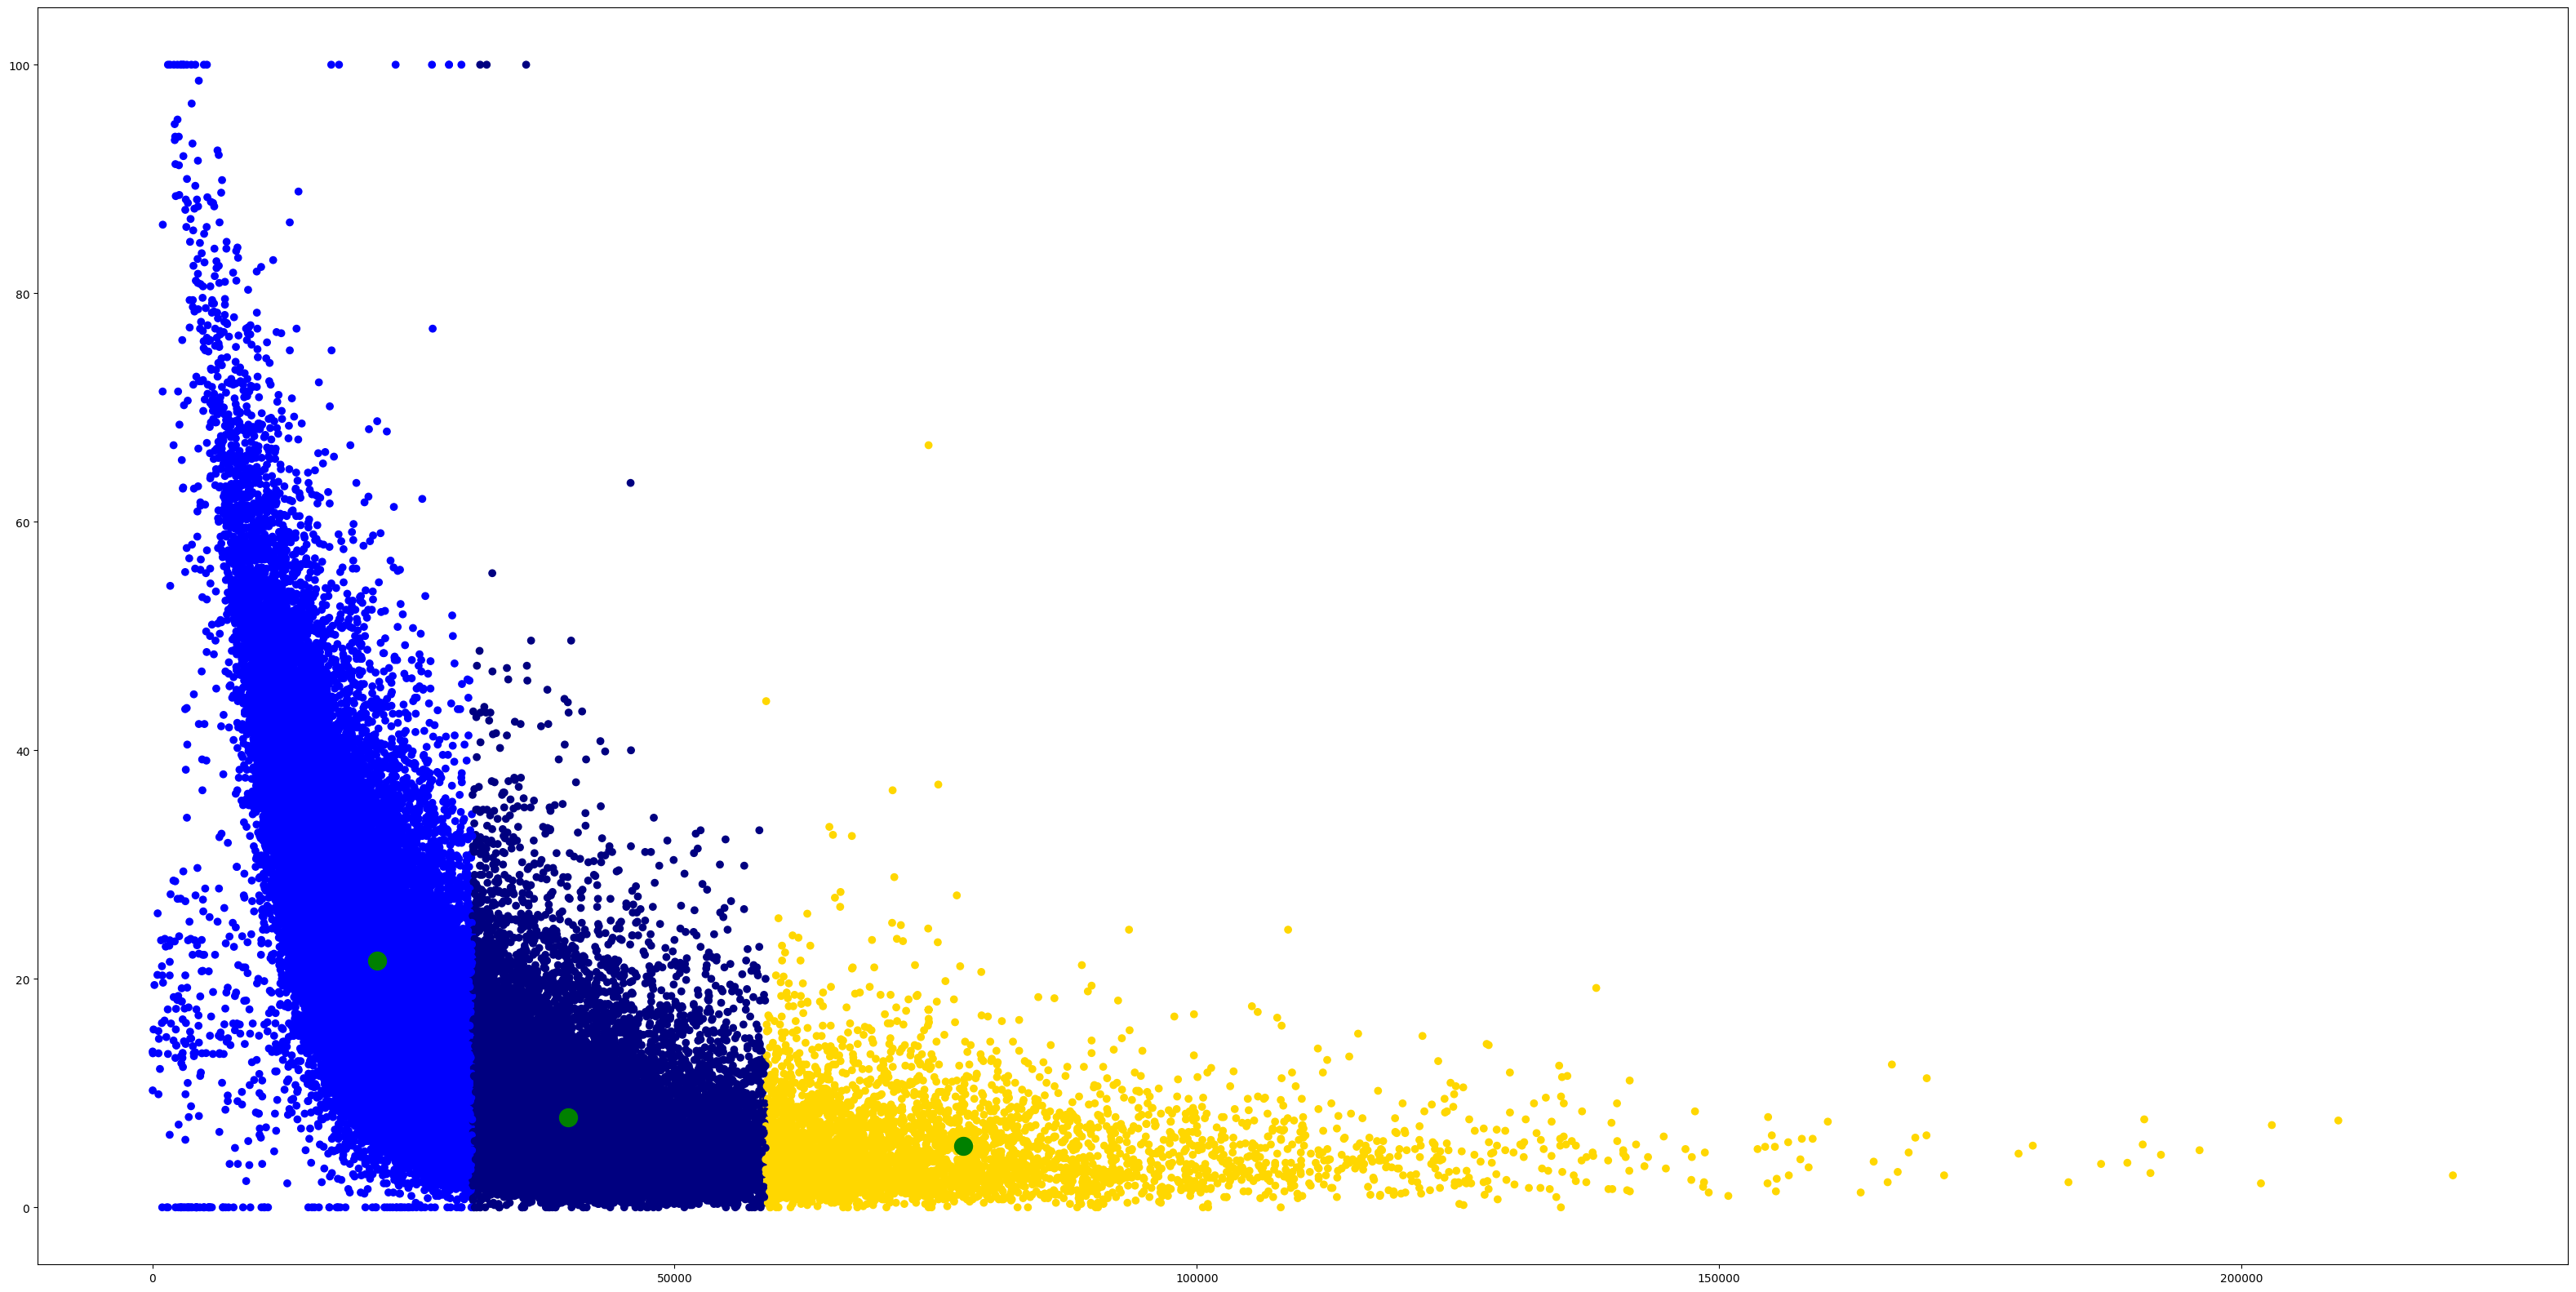

In [ ]:
plot_clusters(df_mean_temp[['IncomePerCap','Poverty', 'Cluster']].copy(), 'IncomePerCap','Poverty', centroids_mean)

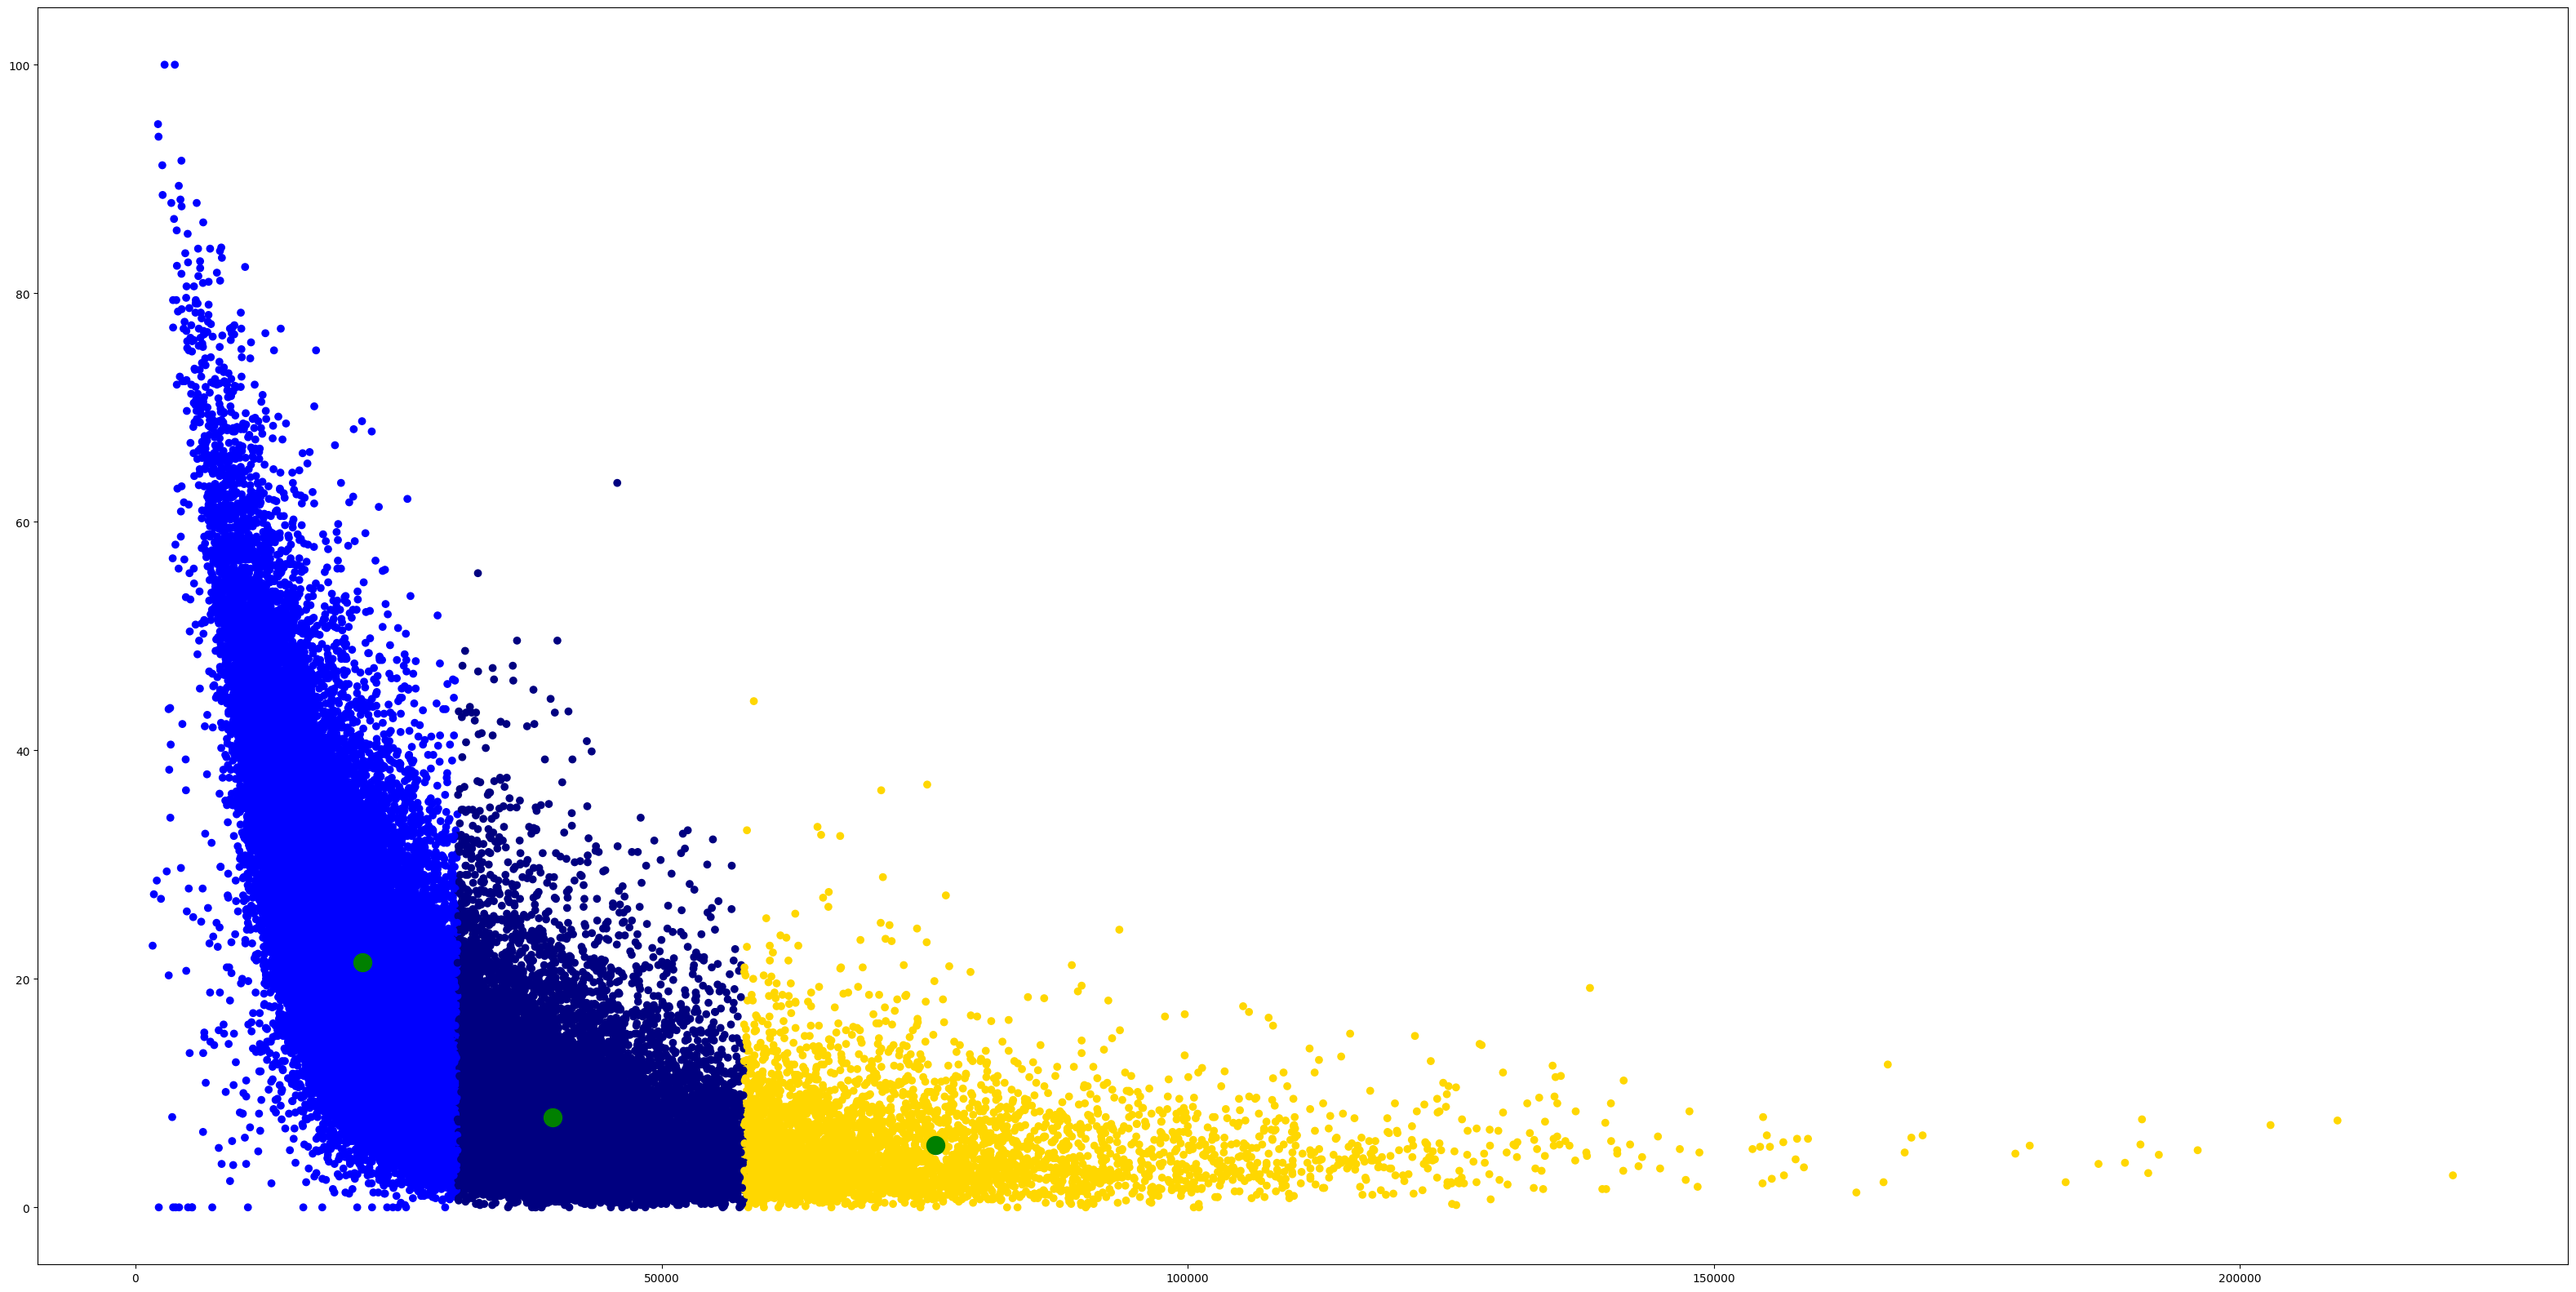

In [ ]:
plot_clusters(df_no_null_temp[['IncomePerCap','Poverty', 'Cluster']].copy(), 'IncomePerCap','Poverty', centroids_no_null)

### Alternative Clusters

### Total driving people and income per cap

In [ ]:
#calculate number of driving people
encoded_data_without_null["TotalDrive"] = (encoded_data_without_null.Drive * encoded_data_without_null.TotalPop)/100

encoded_data_without_null[["TotalDrive", "TotalPop", "Drive"]]

In [ ]:
#normalize the data
encoded_data_without_null["IncomePerCap"] = encoded_data_without_null["IncomePerCap"] / encoded_data_without_null["IncomePerCap"].abs().max()
encoded_data_without_null["TotalDrive"] = encoded_data_without_null["TotalDrive"] / encoded_data_without_null["TotalDrive"].abs().max()

In [ ]:
means_1, inertias_1 = find_k_mean(encoded_data_without_null[['TotalDrive', 'IncomePerCap']], 10)

In [ ]:
plot(means_1, inertias_1, 'Number of Clusters (K)', 'Sum of Square Distances', 'Optimal K for the dataset without null values')

In [ ]:
model_mean = get_kmean_model(3, 'k-means++', 1000)
model_mean.fit(encoded_data_without_null[['TotalDrive','IncomePerCap']])

In [ ]:
centroids_mean = model_mean.cluster_centers_

In [ ]:
df_mean_temp = encoded_data_without_null.copy()
df_mean_temp['Cluster'] = model_mean.labels_

df_mean_temp

In [ ]:
plot_clusters(df_mean_temp[['TotalDrive','IncomePerCap','Cluster']].copy(),'TotalDrive','IncomePerCap',centroids_mean)

### Voting age citizen and total pop

In [ ]:
means_1, inertias_1 = find_k_mean(encoded_data_without_null[['VotingAgeCitizen', 'TotalPop']], 10)

In [ ]:
plot(means_1, inertias_1, 'Number of Clusters (K)', 'Sum of Square Distances', 'Optimal K for the dataset without null values')

In [ ]:
model_mean = get_kmean_model(3, 'k-means++', 1000)
model_mean.fit(dataset[['VotingAgeCitizen','TotalPop']])

In [ ]:
centroids_mean = model_mean.cluster_centers_

In [ ]:
df_mean_temp = dataset.copy()
df_mean_temp['Cluster'] = model_mean.labels_

df_mean_temp

In [ ]:
plot_clusters(df_mean_temp[['VotingAgeCitizen','TotalPop','Cluster']].copy(),'VotingAgeCitizen','TotalPop',centroids_mean)

### Multiple Clusters

In [ ]:
def create_multiple_clusters(df, k):
  for k in range(1, 6):
    model = get_kmean_model(k, 'k-means++', 1000)
    model.fit(df)
    df[f'KMeans_{k}'] = model.labels_
  return df

In [ ]:
df_multiple_clusters_1 = create_multiple_clusters(df_mean_temp[['IncomePerCap','Poverty']].copy(), 6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df_multiple_clusters_2 = create_multiple_clusters(df_no_null_temp[['IncomePerCap','Poverty']].copy(), 6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df_multiple_clusters_1

IncomePerCap  Poverty  KMeans_1  KMeans_2  KMeans_3  KMeans_4  \
TractId                                                                      
1001020100        33018.0     10.7         0         0         2         0   
1001020200        18996.0     22.4         0         0         0         2   
1001020300        21236.0     14.7         0         0         0         2   
1001020400        28068.0      2.3         0         0         0         0   
1001020500        36905.0     12.2         0         0         2         0   
...                   ...      ...       ...       ...       ...       ...   
72153750501        8643.0     39.4         0         0         0         2   
72153750502       11109.0     35.5         0         0         0         2   
72153750503        9603.0     52.8         0         0         0         2   
72153750601        8331.0     50.1         0         0         0         2   
72153750602        6251.0     69.4         0         0         0         2   

             KMeans_5  
TractId                
1001020100          3  
1001020200          0  
1001020300          0  
1001020400          3  
1001020500          4  
...               ...  
72153750501         0  
72153750502         0  
72153750503         0  
72153750601         0  
72153750602         0  

[74001 rows x 7 columns]

In [ ]:
df_multiple_clusters_2

IncomePerCap  Poverty  KMeans_1  KMeans_2  KMeans_3  KMeans_4  \
TractId                                                                      
1001020100        33018.0     10.7         0         0         0         0   
1001020200        18996.0     22.4         0         0         1         3   
1001020300        21236.0     14.7         0         0         1         3   
1001020400        28068.0      2.3         0         0         1         0   
1001020500        36905.0     12.2         0         0         0         0   
...                   ...      ...       ...       ...       ...       ...   
72153750501        8643.0     39.4         0         0         1         3   
72153750502       11109.0     35.5         0         0         1         3   
72153750503        9603.0     52.8         0         0         1         3   
72153750601        8331.0     50.1         0         0         1         3   
72153750602        6251.0     69.4         0         0         1         3   

             KMeans_5  
TractId                
1001020100          3  
1001020200          0  
1001020300          0  
1001020400          3  
1001020500          1  
...               ...  
72153750501         0  
72153750502         0  
72153750503         0  
72153750601         0  
72153750602         0  

[72718 rows x 7 columns]

In [ ]:
def plot_mutiple_clusters(df, x, y, label_c, k):
  fig, axs = plt.subplots(nrows=1, ncols=k-1, figsize=(20,5))
  for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=x, y=y, c=df[label_c + str(i)])
    ax.set_title(f'N Clusters: {i}')


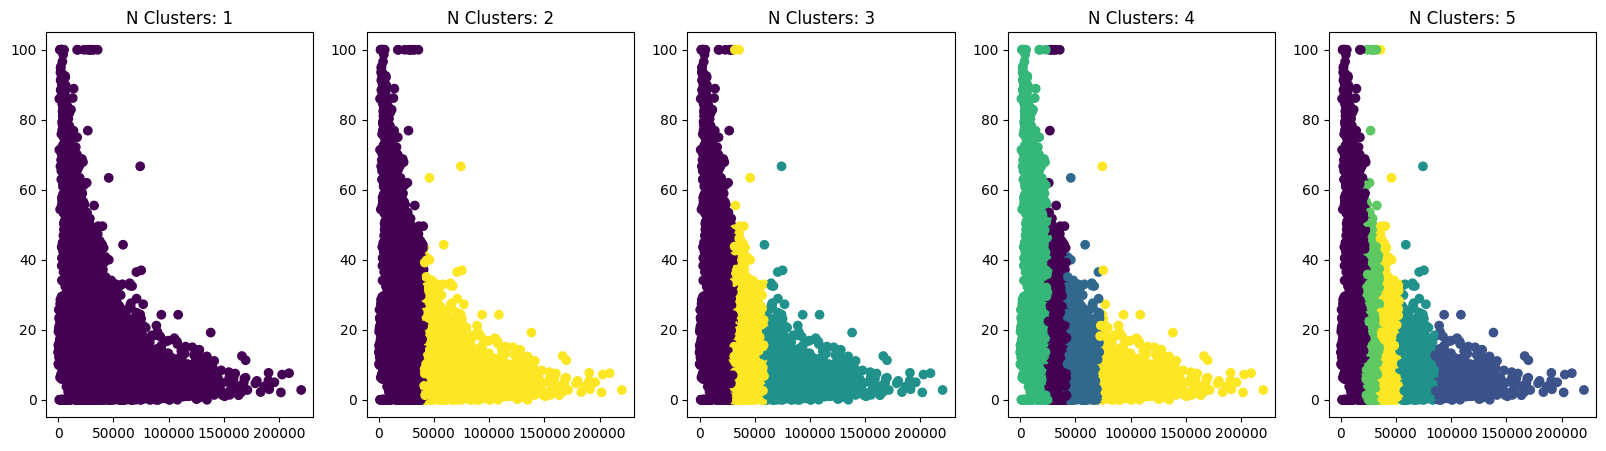

In [ ]:
plot_mutiple_clusters( df_multiple_clusters_1, df_multiple_clusters_1[['IncomePerCap']], df_multiple_clusters_1[['Poverty']], 'KMeans_', 6)

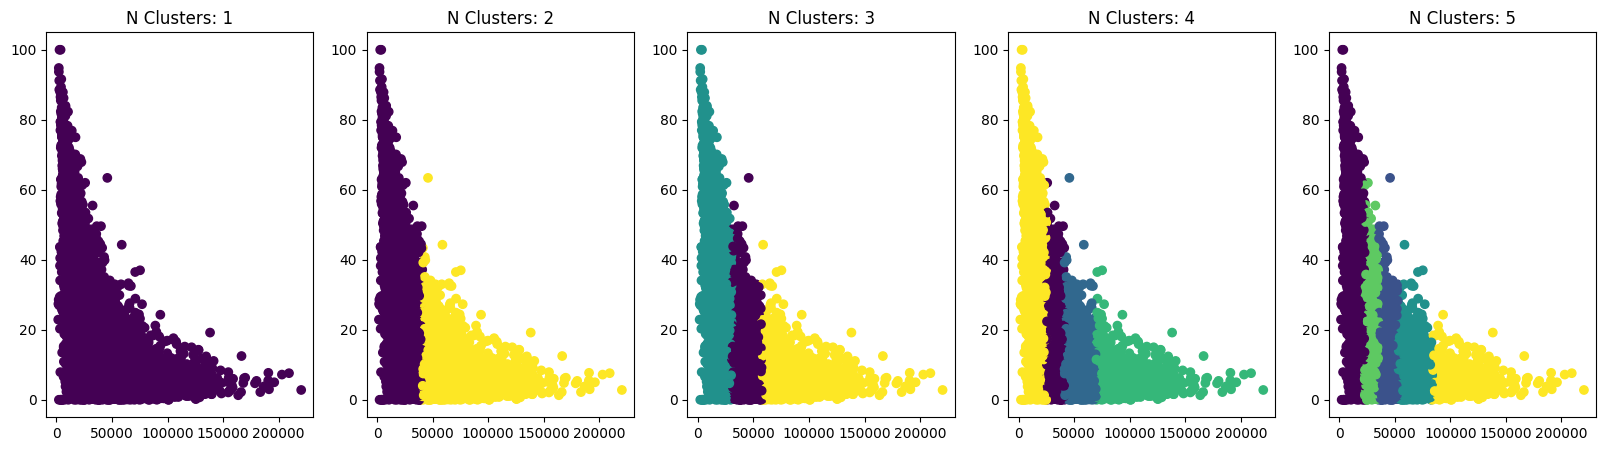

In [ ]:
plot_mutiple_clusters(df_multiple_clusters_2, df_multiple_clusters_2[['IncomePerCap']], df_multiple_clusters_2[['Poverty']], 'KMeans_', 6)

### Clustering all features

In [ ]:
means_1, inertias_1 = find_k_mean(encoded_data_mean.copy(), 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
means_2, inertias_2 = find_k_mean(encoded_data_without_null.copy(), 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

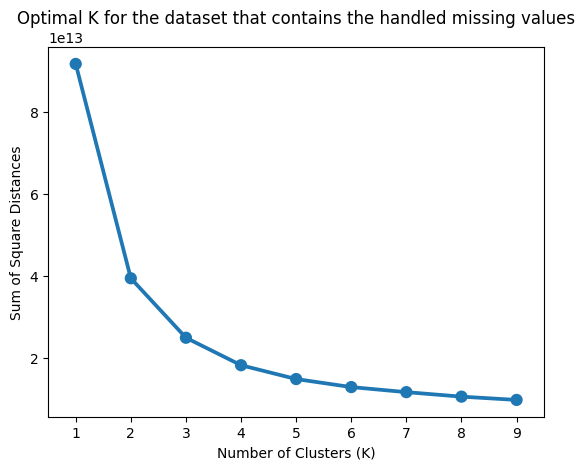

In [ ]:
plot(means_1, inertias_1, 'Number of Clusters (K)', 'Sum of Square Distances', 'Optimal K for the dataset that contains the handled missing values')

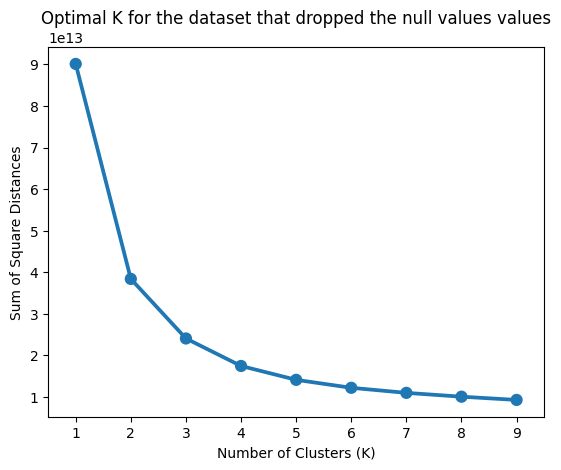

In [ ]:
plot(means_2, inertias_2, 'Number of Clusters (K)', 'Sum of Square Distances', 'Optimal K for the dataset that dropped the null values values')

### Scaling and Transforming the data into PCA

In [ ]:
def scale(data):
  scaler = StandardScaler()
  return scaler.fit_transform(data)

In [ ]:
def reduce_d(scaled_data):
  pca = PCA(n_components=2)
  reduced_data = pca.fit_transform(scaled_data)
  reduced_data_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
  return reduced_data_df

In [ ]:
df_temp_1 = encoded_data_mean.copy()
scaled_data_1 = scale(df_temp_1)
reduced_data_1 = reduce_d(scaled_data_1)
model_mean = get_kmean_model(3, 'k-means++', 1000)
reduced_data_1['Cluster'] = model_mean.fit_predict(reduced_data_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_temp_2 = encoded_data_without_null.copy()
scaled_data_2 = scale(df_temp_2)
reduced_data_2 = reduce_d(scaled_data_2)
model_mean_2 = get_kmean_model(3, 'k-means++', 1000)
reduced_data_2['Cluster'] = model_mean_2.fit_predict(reduced_data_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Labels', model_mean.cluster_centers_)

Labels [[ 1.28232975  2.16909543]
 [ 2.50353313 -1.84085118]
 [-2.07802999 -0.27523175]]


In [ ]:
print('Labels', model_mean_2.cluster_centers_)

Labels [[-2.09049825 -0.2452199 ]
 [ 2.46824387 -1.81019844]
 [ 1.34100225  2.27165722]]


In [ ]:
centroids_mean = model_mean.cluster_centers_

In [ ]:
centroids_no_null = model_mean_2.cluster_centers_

In [ ]:
reduced_data_1

PCA1      PCA2  Cluster
0      0.033218 -2.309065        1
1     -2.169219 -1.065034        2
2     -0.857523 -0.244646        2
3     -0.125558  0.437672        2
4      3.862385  4.096699        0
...         ...       ...      ...
73996 -2.989994  2.137337        2
73997 -3.981663 -0.651240        2
73998 -4.963746 -0.645118        2
73999 -4.246574  1.550008        2
74000 -5.984233  0.658329        2

[74001 rows x 3 columns]

In [ ]:
reduced_data_2

PCA1      PCA2  Cluster
0      0.041553 -2.411501        1
1     -2.218424 -1.192651        0
2     -0.898009 -0.307745        0
3     -0.175175  0.384249        0
4      3.824031  4.182115        2
...         ...       ...      ...
72713 -3.054869  2.068959        0
72714 -4.030208 -0.786738        0
72715 -4.992012 -0.801178        0
72716 -4.335019  1.458631        0
72717 -6.038738  0.465921        0

[72718 rows x 3 columns]

##DETECT ANOMALIES / OUTLIERS


### Detect outliers

In [ ]:
def plot_all(data):
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="Set2")
  plt.title('K-means Clustering with 2 dimensions')
  plt.show()

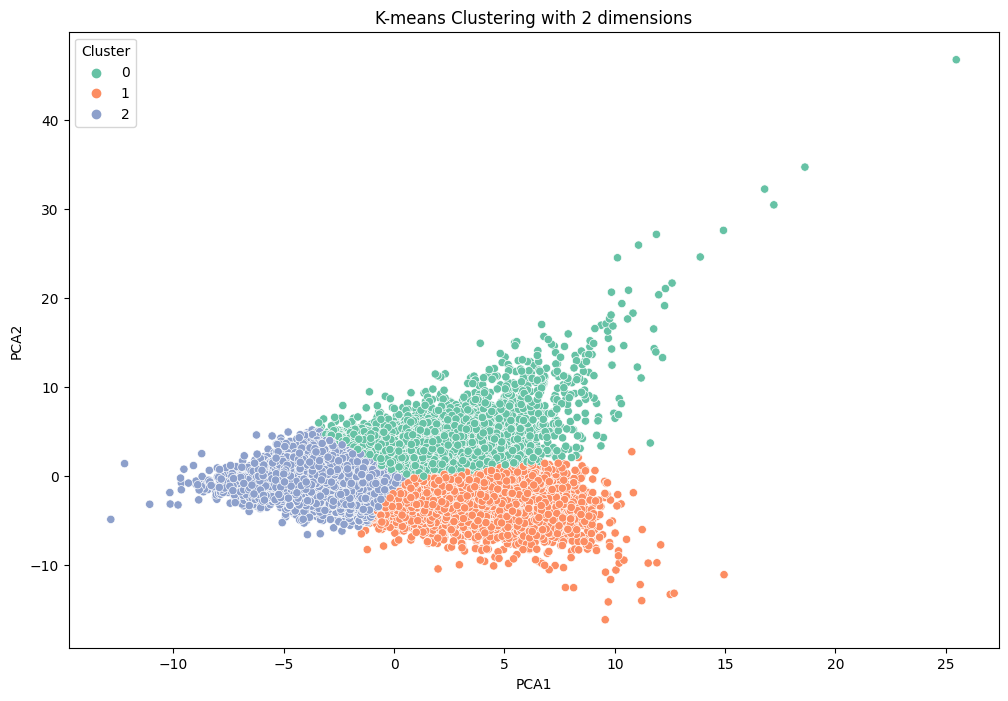

In [ ]:
plot_all(reduced_data_1)

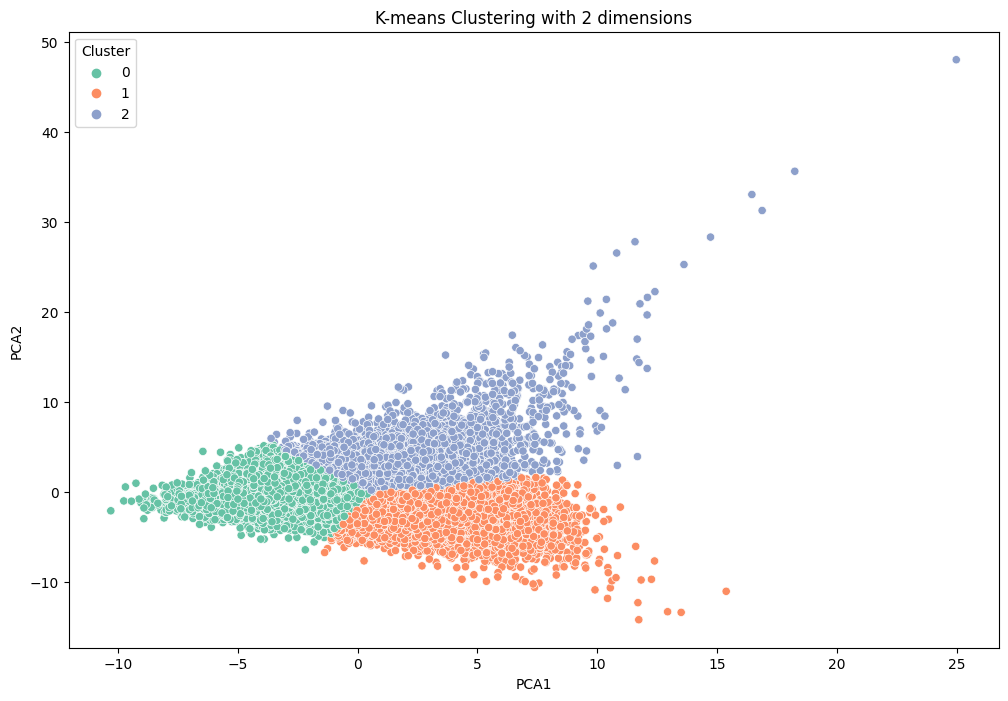

In [ ]:
plot_all(reduced_data_2)

##ADDITIONAL CLUSTERING TECHNIQUES

In [ ]:
# ADDITIONAL CLUSTERING TECHNIQUES AND COMPARISON

#WE PERFORM CLUSTERING USING 3 DIFFERENT ALGORITHMS: K-MEANS, AGGLOMERATIVE CLUSTERING AND DBSCAN.

# K-MEANS CLUSTERING
kmeans = KMeans(n_cluster=3, random state=42)
dataset['KMeans_Cluster'] = kmeans.fit_predict(features)

#AGGLOMERATIVE HIERARCHICAL CLUSTERING

features = dataset [['IncomePerCap','Poverty']]

agg_cluster = AgglomerativeClustering(n_cluster=3)
dataset['Agg_Cluster']= agg_cluster.fit_predict(features)

#DBSCAN CLUSTERING

dbscan = DBSCAN(eps=0.5, min_samples=5)
dataset['DBSCAN_Cluster'] = dbscan.fit_predict(features)




###Results Comparison

###Compare Clustering Results using Silhouette Scores



The silhouette score measures how similar an object is to its cluster (cohesion) compared to other clusters (separation).

Higher silhouette scores indicate better defined clusters.

In [ ]:
#SILHOUETTE SCORE FOR K-MEANS
silhouette_kmeans = silhouette_score(features, dataset['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

#SILHOUETTE SCORE FOR AGGLOMERATIVE CLUSTERING

silhouette_agg = silhouette_score(features, dataset['Agg_Cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg}')


#SILHOUETTE SCORE FOR DBSCAN
silhouette_dbscan = silhouette_score(features, dataset['DBSCAN_Cluster'])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

###Compare results with and without dimensionality reduction

In [ ]:
# COMPARE RESULTS WITH AND WITHOUT DIMENSIONALITY REDUCTION

#PERFORM K-MEANS CLUSTERING WITHOUT PCA
kmeans_no_pca = KMeans(n_cluster=3, random_state=42)
dataset['KMeans_Cluster_No_PCA']= kmeans_no_pca.fit_predict(features)

#WITH PCA
#APPLY PCA FOR DIMENSIONALITY REDUCTION, WE CAN CHOOSE DIFFERENT NUMBERS OF COMPONENTS TO TEST WITH.
pca=PCA(n_components=2)
dataset_pca = pca.fit_transform(features)
dataset['PCA1'] = dataset_pca[:,0]
dataset['PCA2'] = dataset_pca[:,1]

#PERFORM K-MEANS CLUSTERING WITH PCA
kmeans_pca = KMeans(n_cluster=3, random_state=42)
dataset['KMeans:cluster_PCA']= kmeans_pca.fit_predict(dataset_pca)


In [ ]:
reduced_data_1

In [ ]:
cd=reduced_data_1[["PCA1", "PCA2"]]
cd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

data1 = np.random.normal(loc = 0, scale = 1, size = 1000)
data2 = np.random.normal(loc = 5, scale = 1, size = 1000)

labels = ['PCA1', 'PCA2']
bp = plt.boxplot(cd, labels=labels)
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
new = reduced_data_1.drop(reduced_data_1[(reduced_data_1['PCA1'] > 6.721508) | (reduced_data_1['PCA1'] < -6.779436)].index)
new = new.drop(new[(new['PCA2'] > 4.887004) | (new['PCA2'] < -4.964733)].index)
new

In [ ]:
plot_all(new)